In [1]:
import pandas as pd
from nltk.stem import SnowballStemmer
snb_stemmer_ru = SnowballStemmer('russian')
from razdel import sentenize
from razdel import tokenize
import re
import pymorphy2
from nltk.corpus import stopwords
morph = pymorphy2.MorphAnalyzer()
ru_stop_words = stopwords.words('russian')

In [2]:
import re
import nltk

import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
lst_text_economical = ['Курс рубля на этой неделе обновил годовые минимумы и 7 апреля перешагнул отметку в 83 за доллар. С начала года американская валюта по отношению к российской подорожала более чем на 15%, а экономисты склоняются к мнению, что постепенное ослабление рубля будет продолжаться. Как защитить свои сбережения в этих условиях?', 'В жизни бизнесмена возникают периоды, когда необходима поддержка, которая не только удержит на плаву, но и кратно увеличит прибыль и обороты. Именно такую помощь в виде займа, гранта или консультации может предоставить государство. Расскажем вам о зарекомендовавших себя методах поддержки по национальному проекту «Малое и среднее предпринимательство».', 'Оборот грузовых вагонов на железнодорожной сети замедлился на полтора дня, заявил РБК глава «ТрансКонтейнера» Виталий Евдокименко. На фоне санкций объем грузоперевозок на Восток впервые в истории превысил перевозки на Запад.', 'МОСКВА, 10 апр — РИА Новости. Мировой экономический кризис, в течение которого реализуются проблемы в банках, произойдет сдувание «пузырей» в различных активах, коррекция фондовых рынков и подавление инфляции, продлится до 2024 года включительно, заявил в интервью РИА Новости экономист, бывший министр финансов России Михаил Задорнов.', 'В ближайшие 10−15 лет темпы роста российской экономики могут закрепиться уровне около 1% в год, считают эксперты РАН. По их мнению, возможности бюджетной политики сегодня ограничены, однако развивать внутренний рынок необходимо.', 'Пенсии, пособия на детей, льготы инвалидам и малоимущим семьям теперь будут перечислять по-другому. Кого затронут изменения и кому сделают прибавку?', 'Дальнейший рост параллельного импорта в Россию, объем которого превысил $20 млрд, может осложнить нехватка складской инфраструктуры в транзитных странах, включая Белоруссию, Казахстан, Киргизию. Спрос на такие площади со стороны российских логистов и ритейлеров вырос вдвое, найти подходящие объекты уже сложно. Профессиональных девелоперов, специализирующихся на развитии логопарков, в странах СНГ немного. Ситуацию мог бы исправить выход на эти рынки российских застройщиков. Но эксперты говорят также о нехватке там готовых для застройки площадок.', 'В ряде крупных банков в марте подешевели потребительские кредиты, несмотря на сохранение ключевой ставки на уровне 7,5%, рассказали «Известиям» в маркетплейсах. В частности, в топ-20 банков по размеру розничного портфеля проценты на такие займы упали на 1 п.п. За счет небольшого снижения кредитные организации пытаются стимулировать объем выдач и привлечь клиентов, считают эксперты. Однако, по их оценкам, уже к середине лета ставки могут вновь пойти вверх.', 'Куда теперь обращаться пользователям за ремонтом гаджетов.', 'Мосбиржа запускает новую внебиржевую площадку, где сделки будут заключаться не напрямую между продавцом и покупателем, а через НКЦ. Пока на ней появятся бумаги семи компаний, но в будущем она может стать базовой для pre-IPO.', 'МОСКВА, 9 апр — РИА Новости. Продолжительный период бесплатных денег и накачивание ими экономик, пандемия, торговые войны и геополитическое обострение стали главными причинами наступающего мирового кризиса, заявил в интервью РИА Новости экономист, бывший министр финансов России Михаил Задорнов.', 'Спрос на семейную ипотеку за прошедший месяц в сегменте загородной недвижимости в 10 раз превысил среднемесячное значение 2022-го и оказался почти в 17 раз выше, чем в марте прошлого года. Об этом «Известиям» рассказали в федеральной компании «Этажи».', 'МОСКВА, 9 апр — РИА Новости. Россия с годовой инфляцией в 10,99% в феврале заняла 50-е место по уровню роста цен среди всех стран мира, при этом самые высокие значения были в Ливане и Аргентине, следует из расчетов РИА Новости.', 'Чем вызван рост спроса на такие вложения в начале этого года.', 'МОСКВА, 8 апр — РИА Новости. Каждый десятый россиянин в настоящее время имеет карту зарубежного банка, при этом самыми популярными странами стали Казахстан и Турция, говорится в исследовании Anderida Financial Group, которое есть в распоряжении РИА Новости.', 'БУДАПЕШТ, 8 апреля. /ТАСС/. Венгрия решила ужесточить контроль за транзитными перевозками по своей территории зерна с Украины, чтобы убедиться, что оно действительно попадает в страны назначения, а не остается на рынках Центральной Европы. Об этом сообщил в субботу министр сельского хозяйства Венгрии Иштван Надь, предложивший также восстановить в Евросоюзе таможенные пошлины и количественные ограничения на украинское зерно.', 'Министр энергетики и природных ресурсов Турции Фатих Донмез в интервью CNN Turk сообщил, что турецкое правительство приняло первые законодательные решения, упрощающие работу нефтегазовых компаний в рамках газового хаба.', 'Рубль передумал слабеть. Российская валюта отыграла все падение 7 апреля. Доллар дорожал всю неделю и утром в пятницу рост продолжился. Американская валюта преодолела отметку в 83 ₽. Однако затем график развернулся: на фоне повышенных объемов курс упал до 80 ₽. Что произошло?', 'В 2022 году инфляция в разных странах мира била рекорды. Эксперты называли основными драйверами рост цен на энергоносители и продовольствие. И если стоимость первых снизилась с пиковых значений, то вторые продолжили дорожать и в 2023 году. Как выросли цены на еду — в материале «Ъ».', 'Уязвимость глобальной экономики растет на фоне попыток центробанков стран мира сдержать высокую инфляцию, хрупкость этой системы грозит финансовой нестабильностью и замедлением экономического роста, заявила директор-распорядитель МВФ Кристалина Георгиева.', 'Владельцем компании, которая отправила в Россию полупроводники, серверы и другое оборудование, сначала значилась девушка, занимающаяся IT и танцами на шесте, а позже дорожный рабочий с Украины, пишет FT.', 'Член наблюдательного совета Porsche Зигфрид Вольф в январе написал письмо президенту России Владимиру Путину с предложением восстановить российскую автомобильную промышленность, сообщил Der Spiegel. Как передает издание, Вольф предложил производить в России 270 тыс. автомобилей в год. На эти цели ему потребуется 60 млрд руб. (€800 млн). Вольф хочет использовать два завода в России, в том числе в Калуге, который принадлежит концерну Volkswagen (VW), ушедшему из России.', 'Банки в Армении ужесточают требования к клиентам из России. Кредитные организации вынуждены изменить условия из-за контроля за соблюдением санкций в отношении РФ, заявил финансовый регулятор страны. Теперь граждане и предприятия могут получить отказ в переводах, если они будут признаны рискованными. Насколько усложнились проверки? И как обстоят дела в других странах СНГ? Выясняла Дарья Фоменко.', 'В ходе торгов на Мосбирже в пятницу, 7 апреля, доллар и евро достигли рекордных значений за год. Американская валюта подорожала до 83,4 рубля, европейская — до 91,2 рубля.', 'Курс рубля отыграл часть утренних потерь к доллару США и евро на дневных торгах, следует из данных Московской биржи.', 'Раз правительству невыгоден переоцененный рубль, то его действия в целом будут направлены на то, чтобы его немного ослабить, отметил Владимир Климанов.', 'МОСКВА, 6 апр — РИА Новости. Банк России не обсуждает вопрос об «окрашивании» цифровых рублей для отслеживания операций с ними, подобные расчеты и так оставляют цифровой след, заявила первый зампред ЦБ Ольга Скоробогатова.', 'Все российские банки, входящие в первую десятку по величине активов, на этой неделе отчитались о финансовых результатах за 2022 год.', 'Лидером остаются США, однако неопределенность в регулировании криптовалют там может запустить новый передел рынка. Впрочем, в России вообще до сих пор не разработана правовая база для майнеров, подчеркивают эксперты. Кроме того, растут санкционные риски как в отношении российских игроков, так и их контрагентов за рубежом.', 'Французский производитель молочной продукции Danone намерен отказаться от своих глобальных брендов в РФ. Речь идет о таких именах, как Activia, Alpro, Actimel и непосредственно Danone. Об этом «Известиям» рассказал источник на рынке, который знаком с планами иностранного предприятия.', 'Многие россияне уверены, что переводы на карту не являются доходом, а значит, налоги платить не надо. Налоговики считают по-другому. В каких случаях грозит налог за полученный перевод.', 'МОСКВА, 7 апреля. /ТАСС/. Банк России выявил новую мошенническую практику социальной инженерии с применением QR-кода, при которой злоумышленники похищают деньги, не имея данных карты. Это следует из информации на сайте регулятора.', 'В ходе начала торгов на Мосбирже курс доллара вновь вырос и достиг отметки в 82 рубля. В последний раз на таком уровне он был 14 апреля 2022 года.', 'Курс евро остался прежним: 89,15 рубля.', 'Рост мировой экономики в ближайшие пять лет составит около 3% в год, заявила директор-распорядитель Международного валютного фонда (МВФ) Кристалина Георгиева. По ее словам, это самый низкий прогноз роста глобального ВВП на среднесрочную перспективу с 1990 года. Он заметно ниже среднего значения за последние 20 лет 3,8%.', 'Стремление вложить средства в активы за рубежом и снижение популярности Турции привели к резкому росту спроса россиян на покупку недвижимости в Таиланде и Индонезии. За год их активность в этих странах увеличилась в полтора-два раза. С возобновлением после пандемии турпотока из Китая доходность от вложений на рынках Таиланда и Индонезии может оказаться выше, чем в Европе, но инвестиции будут рискованными, предупреждают аналитики.', 'Это произошло вслед за ростом цен на Brent. Эталонная марка сейчас стоит чуть меньше 85 долларов. С одной стороны, подорожание Urals — позитивная новость для российских экспортеров, с другой, это усложняет транспортировку грузов из-за потолка цен.', 'МОСКВА, 6 апреля. /ТАСС/. Арзамасский машиностроительный завод в Нижегородской области увеличил выпуск бронетранспортеров и бронеавтомобилей «Тигр», сообщили в четверг в Минобороны РФ.', 'МОСКВА, 6 апр — РИА Новости. В России создали двойную броню для техники, выдерживающую взрыв мощностью до двух килограммов тротила, сообщило Минобороны в своем Telegram-канале. О разработке доложили главе ведомства Сергею Шойгу во время рабочей поездки на Арзамасский машиностроительный завод в Нижегородской области.', 'Рубль пойдет на укрепление за счет возросших цен на энергоносители и увеличения притока валюты в Россию, заявил министр финансов Антон Силуанов в комментарии журналисту ВГТРК Павлу Зарубину.', 'Аналитики не видят позитивных факторов, которые могли бы остановить ослабление российской валюты.', 'Курс евро на Мосбирже превысил 88 ₽ впервые с 14 апреля 2022 г., следует из данных торгов.', 'Альфа-банк по итогам 2022 года получил чистый убыток по РСБУ в 117,1 млрд руб. против 136,6 млрд руб. прибыли годом ранее. В последний раз финорганизация сообщала об убытках по итогам года 14 лет назад.', 'Swed House откроется в ТЦ «Щелковский».', 'Спустя 19 лет после основания сеть «Карусель» прекратила существование. Ее владелец — российский ретейлер X5 Group — закрыл последний магазин в феврале 2023 года. Отказ от сети связан с изменением покупательского поведения.', 'Налогообложение сделок на финансовом рынке всегда было непростой задачей, но в этом году подать налоговую декларацию, чтобы избежать претензий налоговых органов, оказывается еще труднее. Усугубляет дело турбулентная ситуация на валютном рынке прошлой весной, заморозка активов россиян за рубежом и смена статуса налогового резидента многими инвесторами.', 'Ослабление рубля вызвано несколькими факторами, среди которых проблемы американских и европейских банков и низкие цены на нефть в начале года. Однако речь не о долгосрочной тенденции, а об очередном проявлении возросшей волатильности российского валютного рынка, полагает главный экономист «Эксперт РА» Антон Табах.', 'Курс доллара на Московской бирже превысил 80 рублей впервые с апреля 2022 года. Рубль продолжает слабеть к мировым валютам, несмотря на дорожающую нефть. Высокая волатильность национальной валюты — результат «жесткой геополитики, сложного процесса трансформации экономики и адаптации бизнеса», отмечают эксперты.', 'Зарубежные розничные потребительские бренды, свернувшие или временно приостановившие бизнес в России из-за военных действий на Украине, по оценкам консультантов, могли потерять в общей сложности до $2 млрд. В целом на глобальный бизнес сетей это всерьез не повлияло, так как продажи в РФ обеспечивали всего 3−5% общей выручки. При этом формально санкции сегмент почти не затронули, кроме предметов роскоши. Большинство брендов ушли по собственной воле или из-за сложностей с организацией бизнеса.', 'Что это значит для отрасли и как отразится на покупателях.', 'Россия планирует отправить еще две партии удобрений на безвозмездной основе нуждающимся странам, заявил замглавы МИД РФ Сергей Вершинин в интервью RT Arabic.', 'Если он продолжится, рубль будет слабеть к китайской валюте.', 'МОСКВА, 5 апреля. /ТАСС/. Производитель сетевого оборудования и программных продуктов Cisco Systems в январе этого года «физически уничтожил» свои материально-производственные запасы в России на сумму 1,86 млрд рублей из-за прекращения продаж. В основном это запчасти, однако уничтожению подлежит и другое имущество, в том числе само IT-оборудование, говорится в бухгалтерской отчетности одного из юрлиц Cisco в РФ — «Сиско системс».', 'Так и не справившись с финансовыми сложностями, крупный игрок рынка доставки PickPoint принял решение о прекращении работы в России. По данным источников «Ъ», компания сообщила своим партнерам, что доставит все ранее принятые отправления, а невостребованные грузы вернутся клиентам до конца апреля. В свою очередь, эксперты отмечают общее снижение популярности у покупателей использования услуг логистических компаний, что вынуждает последних сокращать свои инвестиционные программы.', 'Сделка по продаже российских активов испанской группы Inditex получила одобрение правкомиссии. Покупатель — компания Fashion And More Management из свободной зоны ОАЭ — перезапустит магазины Zara под новыми брендами в апреле—мае.', 'Что делать, если пришло уведомление посетить налоговую и дать пояснение по своим расходам.', 'Реальные зарплаты в феврале 2023 года росли в годовом выражении на 0,6% на фоне падения экономики на 3,2%, по оценке Минэкономики. Макроэкономисты фиксируют продолжающееся отставание производительности от роста зарплат в рыночных секторах на фоне рекордного сокращения безработицы и перетока рабочей силы в госсектор. Это угрожает не только росту цен и снижению капвложений, но и сжатию потенциальных темпов роста ВВП в будущем.', 'ВАРШАВА, 4 апр — РИА Новости. Польский энергетический концерн Orlen разорвал последний контракт на поставку нефти из России, сообщил глава компании Даниель Обайтек в эфире телеканала Polsat.', 'Юань два месяца подряд был стал самой торгуемой валютой на Мосбирже; переход произошел после новых западных санкций против российских банков.', 'Насколько изменится оплата коммунальных после установки инновационных приборов.', 'Курс евро на Мосбирже превысил 87 рублей впервые с апреля 2022 года. Эксперты отмечают, что рубль пока не реагирует на рост нефтяных цен на мировом рынке на фоне решения стран ОПЕК+ сократить добычу.', 'Китай использует торговые преимущества для продвижения своей валюты в двусторонних расчетах с целью бросить вызов доминированию доллара в международной валютной системе. Об этом сообщает South China Morning Post.', 'Немецкие компании Allianz и Munich Re возобновили страхование поврежденного из-за взрыва на газопроводе «Северный поток», сообщает Reuters со ссылкой на пять осведомленных источников.', 'МОСКВА, 4 апр — РИА Новости. Компания британского бизнесмена Ричарда Бренсона Virgin Orbit, занимающаяся космическими полетами, подала заявление о банкротстве, сообщается в пресс-релизе компании.', 'Министр финансов США Джанет Йеллен не видит причин для изменения уровня потолка цен на российскую нефть после того, как восемь стран, включая РФ, решили сократить добычу нефти. По ее мнению, это не окажет существенного влияния на ценовой предел.', 'Основной причиной снижения числа кредитных организаций в 2023 году станет добровольный уход зарубежных игроков, рассказал «Известиям» глава рейтингового агентства АКРА и экс-зампред ЦБ Михаил Сухов. По его оценке, российский рынок в этом году могут покинуть 25−30 банков.', 'Рубль на торгах 3 апреля без видимых причин упал ниже 78 за доллар, чего не было с апреля 2022 года. Причинами ослабления стали окончание налогового периода и дисбаланс спроса на валюту из-за снижения экспорта при росте импорта, говорят эксперты.', 'МОСКВА, 3 апр — РИА Новости. Минсельхоз РФ получил уведомление от российской «дочки» одного из крупнейших мировых поставщиков сельхозпродукции Louis Dreyfus Company (LDC) о прекращении экспорта зерна из России с 1 июля 2023 года, на объемы и динамику отечественного экспорта продовольствия этот уход не повлияет, сообщили РИА Новости в пресс-службе министерства.', 'Министр финансов России Антон Силуанов рассказал, что планов распространять право на налоговый вычет на самозанятых у правительства пока нет.', 'Рубль в ходе торгов на Московской бирже опустился до минимума почти за год: доллар впервые с 20 апреля 2022-го поднялся выше 78 рублей, евро превысил 85 рублей. Российская валюта слабеет на фоне подорожания нефти после решения экспортеров из ОПЕК+ сократить добычу в мае, оказавшегося сюрпризом для рынка.', 'Неожиданное решение экспортеров из ОПЕК+ сократить добычу нефти вынудило аналитиков скорректировать свои прогнозы — теперь они считают более вероятным рост стоимости нефти до $100 за баррель. Эксперты отмечают, что ОПЕК+ решила вновь стать «центральным банкиром» на нефтяном рынке, так как не опасается ответного роста добычи сланцевой нефти в США.', 'Власти Китая предупредили банки, что масштабная проверка сектора далеко не закончена, а контроль над банками будет только усиливаться.', 'Цены на нефть подскочила на 8%, после того как несколько стран ОПЕК+ объявили о сокращении добычи, передает Bloomberg. В ночь на 3 апреля фьючерс на нефть марки WTI с поставкой в мае превысил $81 за баррель. Стоимость июньского фьючерса Brent на лондонской бирже превысила $85 за баррель.', 'Саудовская Аравия добровольно сократит добычу нефти на 500 тыс. баррелей в сутки с мая до конца текущего года. Об этом в воскресенье, 2 апреля, сообщило Саудовское информационное агентство.', 'Российский бюджет на конец марта получил 2,5 триллиона рублей в виде дополнительных доходов. Об этом заявил глава Минфина России Антон Силуанов. Его слова прозвучали в программе «Москва. Кремль. Путин», фрагмент которой опубликован в телеграм-канале журналиста Павла Зарубина.', 'Как провести такой платеж и есть ли дополнительная комиссия.', 'РИМ, 1 апреля. /ТАСС/. Экспорт итальянского вина в Россию вырос в 2022 году на 16%, достигнув €172 млн. Как отмечает в субботу ассоциация итальянских сельхозпроизводителей Coldiretti, это исторический рекорд на фоне общего роста экспорта этой продукции на 70% за последние 10 лет, который не прекратился на фоне санкций и продуктового эмбарго.', 'Президент Украины Владимир Зеленский подписал указ о введении санкции против российских граждан и предприятий. Под ограничительные меры в том числе попал бывший глава завода «Мотор Сич» Вячеслав Богуслаев. СБУ задержала его в октябре прошлого года и обвинила в коллаборационистской деятельности, а также «пособничестве государству-агрессору» и госизмене. Он находится под арестом.', 'На фоне восстановления рынков стран Азии и появления новых нефтеперерабатывающих комплексов в мире наблюдается бум строительства нефтяных танкеров. Об этом сообщает Bloomberg со ссылкой на опрошенных судовых брокеров и аналитиков.', 'МОСКВА, 1 апреля. /ТАСС/. Российская валюта во втором квартале может немного укрепиться, считают опрошенные ТАСС эксперты. При этом доллар до конца года, скорее всего, перейдет в диапазон, превышающий 80 рублей, однако значений марта 2022 года в силу различных обстоятельств больше достичь не сможет.', 'Болгария, Венгрия, Польша, Румыния и Словакия обратились к властям Евросоюза из-за проблем со скопившимся украинским зерном. Они призвали изучить возможность его закупки Брюсселем «на гуманитарные нужды», а также предоставить финансовую поддержку на ускорение развития транспортной инфраструктуры, передает The Associated Press.', 'С 1 апреля в России производится индексация ряда социальных выплат для особых категорий граждан. Эта мера призвана скорректировать размер материальной помощи в соответствии с текущим уровнем инфляции. Какие выплаты будут повышены и на сколько — читайте в материале «Известий».', 'ВАШИНГТОН, 31 марта. /ТАСС/. Международный валютный фонд (МВФ) подтвердил одобрение кредитной программы для Украины на сумму $15,6 млрд на четыре года. Соответствующее заявление ведомство опубликовало в пятницу на своем сайте.', 'Россияне и резиденты из дружественных стран по-прежнему могут переводить на счета в иностранных банках не более $1 млн.', 'Продажи смартфонов, планшетов, носимой электроники и других гаджетов в РФ замедлились во второй половине марта, рассказали «Известиям» источник, знакомый с менеджерами нескольких розничных сетей, и сотрудник одного из дистрибьюторов.', 'По мнению президента США, последствия этих решений привели к банкротству Silicon Valley Bank и Signature Bank.', 'Компания, на долю которой приходилось до 7,9% от общего объема экспорта, рассматривает возможность передачи российских активов новым собственникам.', 'Евразийская экономическая комиссия (ЕЭК) до 1 октября продлила действие порога беспошлинного ввоза товаров для физлиц из-за границы на территорию Евразийского экономического союза (ЕАЭС) на уровне €1 тыс. и 31 кг. Об этом ТАСС сообщила представитель ЕЭК Ия Малкина.', 'Брокер БКС предупредил клиентов о полной блокировке счетов с остатками более €100 тыс. Ранее блокировалась только часть денег, превышающая этот лимит. Нововведение связано с уточнением трактовки санкций ЕС, говорит источник РБК.', 'Курс евро на Мосбирже превысил 84 рубля впервые с 20 апреля 2022 года. Эксперты объяснили слабость рубля ростом спроса на валюту со стороны импортеров и увеличением объемов оттока капитала.', 'В Москве суды и управляющие компании стали требовать от жильцов убирать в подъездах двери, перегораживающие часть общественного коридора. В каких случаях это требование законно?', 'Глава Международного валютного фонда (МВФ) Кристалина Георгиева заявила, что, по прогнозам МВФ, 2023 год станет сложным для мировой экономики. По ее словам, из-за последствий украинского конфликта темпы роста ВВП глобальной экономики будут ниже 3%. Об этом госпожа Георгиева сообщила в ходе Боаоского азиатского форума.', 'ВАШИНГТОН, 29 мар — РИА новости. Соединенные Штаты Америки стали крупнейшим экспортером сжиженного природного газа (СПГ) в мире, однако рост поставок ограничен внутренними мощностями, заявила помощница руководителя по энергетическому анализу Управления энергетической информации (EIA) США при Минэнерго страны Анджелина Ларос.', 'Россияне, проживающие за рубежом, смогут получить пенсии, иные выплаты и обеспечение по обязательному соцстрахованию на счета в российских банках или рублевые счета в банках, расположенных не в России, следует из постановления правительства.', 'Банк России в 2022 году получил убыток в размере 721,7 млрд руб. — в 27 раз больше убытка за 2021 год (26,3 млрд руб.). Это следует из годового отчета регулятора. Как указывает ЦБ, такой показатель сложился за счет чистых расходов по операциям с ценными бумагами.', 'Федеральное агентство по техническому регулированию и метрологии (Росстандарт) может разработать ГОСТ на мед в России. Об этом говорится в сообщении Министерства промышленности и торговли РФ, пишет ТАСС.', 'МОСКВА, 29 мар — РИА Новости. Интерес со стороны граждан РФ к финансовым вложениям изменился — он снижается, отметил министр финансов Антон Силуанов в ходе совещания президента Владимира Путина с правительством.', 'ОАО «Тамбовский хлебокомбинат» начало производство квадрокоптеров для нужд специальной военной операции (СВО). Как сообщили на предприятии, развернутые мощности позволяют собирать в месяц до 200 простейших дронов для наблюдения, первая партия из 16 штук до конца месяца отправится в зону СВО.', 'Новый логотип вдохновлен дизайном второй половины прошлого века, в котором увеличили насыщенность цветов для придания «большей энергии». В компании указали, что товарный знак должен символизировать «беззастенчивое удовольствие».', 'По данным «Ъ», ФСИН снова пытается устроить осужденных на работу в «Ростех», предлагая свою продукцию и услуги. Источники «Ъ» в госкорпорации отмечают, что речь о привлечении заключенных к сборке ракет или самолетов не идет, но возможности сотрудничества «прорабатываются по многим направлениям». Собеседники «Ъ» в промышленности отмечают, что наиболее востребован может быть женский труд: для кропотливой работы на сборке плат и электронных блоков. Но во многих отраслях заключенных вряд ли смогут допустить на заводы по требованиям безопасности.', 'Один из крупнейших мировых поставщиков сельхозпродукции — американская Cargill — прекратит экспорт зерна из России. Компания входит в топ-10 экспортеров российского зерна. В Минсельхозе заверяют, что на экспорте это не отразится.', 'Снизятся ли цены на авиабилеты и по каким направлениям будут перевозки.', 'Главный аналитик Совкомбанка Михаил Васильев спрогнозировал россиянам, каким станет курс рубля в апреле. Об этом он сообщил в беседе с агентством «Прайм».', 'Как это отразится на доходах клиентов негосударственных фондов и вырастет ли их число.', 'В ответ на упрек журналиста в том, что самолеты Air India продолжают летать над Россией и «пополнять российский бюджет», глава авиакомпании заявил, что такой маршрут наиболее экономичный, в том числе из-за того, как дуют ветры.', 'Коэффициент государственного софинансирования накоплений будет различаться в зависимости от доходов граждан, но объем поддержки не превысит 36 тыс. руб. в год. На эти цели направят резервы Соцфонда и средства ФНБ.', 'Крупнейшая российская грузовая авиакомпания AirBridgeCargo возобновит полеты, используя самолеты Ил-96. Год назад она прекратила летать из-за закрытия привычных международных рынков и наличия только иностранных самолетов в парке.', 'ВАШИНГТОН, 28 мар — РИА Новости. США ввели санкции против двух российских компаний, связанных с авиапромышленностью, сообщает Министерство торговли.', 'Россия увеличила поставки газа в Венгрию по просьбе этой страны, сообщается по итогам разговора вице-премьера РФ Александра Новака с главой МИД Венгрии Петером Сийярто. Поставки природного газа в Венгрию в ближайший период останутся бесперебойными, сообщила по итогам беседы венгерская сторона.', 'В Ульяновской области будет создано производство отечественных лопастей для ветроэлектростанций (ВЭС). Об этом сообщил 28 марта гендиректор госкорпорации «Росатом» Алексей Лихачев в Москве на форуме «Композиты без границ». «Мы с [губернатором Ульяновской области] Алексеем Юрьевичем [Русских] объявляем, что создаем в Ульяновской области новое совместное производство ветролопастей», — сказал Лихачев.', 'Российские нефтекомпании переориентировали весь «выпавший» после введения антироссийских санкций объем нефти и нефтепродуктов на новые рынки. Об этом заявил 28 марта 2023 г. министр энергетики Николай Шульгинов в ходе итогового заседания коллегии Минэнерго.', 'Французские банки Societe Generale, BNP Paribas и его «дочка» Exane, а также HSBC, Natixis и BNP будут оштрафованы в общей сложности на €1 млрд в рамках расследования налогового мошенничества и отмывания денег, связанных с выплатой дивидендов. Сегодня, 28 марта, в этих банках прошли обыски. Об этом сообщил Bloomberg.', 'Около двух тысяч заявок на уход иностранных компаний из России ожидают одобрения от российской правительственной комиссии по иностранным инвестициям. Об этом пишет газета Financial Times со ссылкой на источник.', 'Американский финансовый регулятор подал иск против Binance. Комиссия по торговле товарными фьючерсами США утверждает, что крупнейшая криптобиржа нарушала правила финансового рынка. Подробнее — в обзоре иностранной прессы на «Ъ FM».', 'МОСКВА, 28 мар — РИА Новости. Стоимость жилья в РФ выросла сильнее, чем доходы населения, доступность снизилась: если в конце 2019 года в среднем на новую квартиру надо было копить 6 лет, то сейчас это уже 8 лет — при условии, что откладываться будет вся зарплата, сообщил директор департамента банковского регулирования и аналитики ЦБ РФ Александр Данилов в ходе XXI всероссийской конференции «Ипотечное кредитование в России».', 'В парижских отделениях банков Societe Generale, BNP Paribas и его дочки Exane, HSBC и BPCE прошли обыски в рамках французско-немецкого расследования об уклонении от уплаты налогов, пишет Reuters.', 'Китай предоставляет помощь небогатым странам мира, в результате чего те сталкиваются с еще большими проблемами из-за растущих долгов, предупредили аналитики. Ученые считают, что Пекин не пытается решить их проблемы.', 'Оптимальная и безопасная стратегия сохранения накоплений предполагает разделение средств на три корзины: оперативную в рублях, стабилизационную в юанях и «парусную» в акциях российских компаний. В первую и вторую корзины рекомендуется положить по 40% сбережений, в третью — до 20%, советует руководитель службы пассивов и комиссионных продуктов Почта Банка Геннадий Чаусов. Об этом он рассказал «Известиям» 27 марта.', 'Российские банки с конца сентября предоставили кредитные каникулы по 180 000 договоров военнослужащих — участников спецоперации на Украине и членов их семей, следует из данных Банка России.', 'МОСКВА, 28 марта. /ТАСС/. Большинство поставок российских энергоресурсов в 2022 году было переориентировано на рынки дружественных стран, сообщил вице-премьер РФ Александр Новак в ходе итогового заседания коллегии Минэнерго России. В частности, экспорт нефти в Индию вырос в 22 раза, поставки нефти в Китай увеличились на 8%.', 'Многие россияне до сих пор не пользуются своими законными правами сэкономить на оплате жилищно-коммунальных услуг за счёт госпомощи, но сделать это стало ещё проще.', 'Правительства стран ЕС могут получить право временно запрещать российским экспортерам заранее бронировать мощности инфраструктуры, необходимые для поставок СПГ, пишет агентство.', 'Поможет ли мера в борьбе с дефицитом сотрудников в этой сфере и во сколько обойдется бюджету.', 'На рассмотрение в Госдуму внесен проект, обязывающий кредиторов уведомлять граждан через портал «Госуслуги» о том, что на их имя оформлен договор кредита или займа. Инициатива направлена на борьбу с мошенничеством, но недоработана, считают эксперты. По их мнению, мера будет более эффективной при информировании после одобрения, но до выдачи ссуды. В ЦБ же считают, что для защиты граждан достаточно самозапрета на кредиты и займы в кредитной истории (КИ).', '«Добровольный» взнос в бюджет со сделок по продаже активов «недружественными» иностранцами составит от 5% рыночной стоимости бизнеса, уточнила подкомиссия Минфина. Ранее предполагалась уплата 10% от суммы сделки.', 'В обнародованном докладе Всемирного банка (ВБ) перечисляются правильные меры для увеличения потенциала роста мировой экономики, однако не говорится о реальных проблемах, которые негативно влияют на потенциал роста мировой экономики и создают повышенные торговые, логистические, финансовые и инвестиционные барьеры, считает руководитель отдела макроэкономического анализа ФГ «Финам» Ольга Беленькая. Об этом она рассказала «Известиям» 27 марта.', 'Маркетплейс Wildberries решил протестировать дифференцированные тарифы для новых пунктов выдачи заказов (ПВЗ), сообщила пресс-служба онлайн-ритейлера.', 'Банковский холдинг First Citizens Bank & Trust Company купит все активы обанкротившегося Silicon Valley Bank. Об этом сообщается на сайте Федеральной корпорации страхования депозитов (FDIC) США.', 'Американская Citigroup не может продать свой российский бизнес из-за невозможности передачи покупателям набора IT-систем, обслуживающих Ситибанк в нашей стране, рассказали «Известиям» менеджер консалтинговой компании, специализирующейся в сфере высоких технологий, а также высокопоставленный источник в банковском секторе.', 'Как и предполагал «Ъ», по итогам жесткого конфликта Wildberries с контрагентами возобновилось обсуждение вопроса ужесточения контроля за маркетплейсами. Пока речь идет в первую очередь об отмене действующих для онлайн-торговли послаблений. В частности, члены отраслевой комиссии Минпромторга предложили Минцифры вывести маркетплейсы из-под ограничений на антимонопольные проверки. В Федеральной антимонопольной службе (ФАС) готовы обсудить расширение контроля, но министерство и участники онлайн-торговли продолжают защищать концепцию саморегулирования.', 'В России просят обязать банки блокировать списания за онлайн-сервисы по требованию клиента. Такое обращение «Общественная потребительская инициатива» (ОПИ) направила в Центробанк.', 'Неопределенность в мировой экономике остается «исключительно высокой», а глобальный экономический рост, как ожидается, замедлится до уровня ниже 3% в этом году, заявила глава МВФ Кристалина Георгиева. В то же время она похвалила регуляторы за предоставление банкам необходимой ликвидности.', 'ПЕКИН, 26 мар — РИА Новости. Около трети мирового экономического роста в 2023 году придется на долю Китая, заявила в воскресенье директор-распорядитель Международного валютного фонда (МВФ) Кристалина Георгиева, выступая на Форуме развития Китая в Пекине.', 'МОСКВА, 25 мар — РИА Новости. Специальный представитель Украины по Ближнему Востоку и Африке Максим Субх заявил, что Оман предлагает Украине открыть на своей территории зерновой хаб.', 'С 1 апреля социальные пенсии вырастут на 3,3 процента. Это затронет почти четыре миллиона россиян. Ассистент кафедры трудового и социального права СПбГУ Фатима Ногайлиева в интервью агентству «Прайм» разъяснила порядок выплаты повышенной пенсии.', 'Украина второй раз с начала года, на этот раз сразу вдвое, хочет повысить стоимость транзита российской нефти, которая идет по ее территории по нефтепроводу «Дружба» в направлении Словакии, Венгрии и Чехии. Даже несмотря на рост затрат, сырье из РФ остается более выгодным для потребителей Восточной Европы, чем альтернативные закупки внутри Евросоюза, полагают эксперты.', 'Федеральная служба по военно-техническому сотрудничеству России сообщила, что заявление властей Словакии о передаче Украине истребителей МиГ-29 — это недружественный акт против России и грубое нарушение обязательств по реэкспорту. 23 марта министра обороны Словакии Ярослав Надь заявил о передаче Украине четырех МиГ-29. Поставка еще девяти истребителей ожидается в ближайшие недели.', 'В ходе торгов в пятницу, 24 марта, на бирже XETRA акции Deutsche Bank — крупнейшего банка Германии — упали более чем на 13 процентов. В нижней точке стоимость ценной бумаги опускалась до 7,9 евро за штуку, побив рекорд последних пяти месяцев, свидетельствуют данные площадки.', 'Французская группа ADEO, владелец строительной и DIY сети Leroy Merlin, намерена передать управление российской компанией локальному менеджменту. Об этом РБК сообщил представитель компании. Он подчеркнул, что изменение не повлияет на бизнес компании ни во взаимоотношениях с партнерами и клиентами, ни в работе сотрудников — все рабочие места будут сохранены, а компания продолжит работу в обычном режиме.', 'Национальная система платежных карт (НСПК) установила лимит в 3 тыс. руб. на оплату покупок с помощью стикера без ввода PIN-кода, сообщила ТАСС пресс-служба НСПК.', 'Ведущий юрист Европейской юридической службы Србуи Иващенко рассказала «Известиям», сколько стоит хранить квитанцию ЖКХ.', 'Европейский центральный банк (ЕЦБ) потребовал от австрийской банковской группы Raiffeisen Bank закрыть свой бизнес в России. Об этом сообщил Reuters со ссылкой на источники.', 'Доходы России по двусторонним госкредитам в 2022 году оказались значительно ниже запланированных, узнал РБК. Вместо ожидаемых 48,7 млрд руб. удалось получить 11 млрд. Основная причина — санкции.', 'С 1 апреля изменится механизм демпфера, от которого зависят цены на топливо. Кроме того, на бензин и дизель растёт сезонный спрос. Сколько теперь будет стоить топливо на АЗС?', 'В России годовая инфляции составит 5,8%, следует из консенсус-прогноза «Известий». О том, что темпы роста цен по итогам года не превысят 6%, сказали пять из десяти опрошенных экспертов из рейтинговых агентств, банков и других финансовых организаций. Остальные считают, что инфляция будет выше этого значения.', 'Центробанк России продлил ограничения на переводы за рубеж средств нерезидентов из недружественных стран со счетов брокеров и доверительных управляющих. Об этом говорится в пресс-релизе регулятора.', 'В прошлом году частные инвесторы купили рекордный за девять лет объем золотых монет.', 'МОСКВА, 23 марта. /ТАСС/. Россия будет и далее повышать благосостояние своих граждан, в том числе через увеличение минимального размера оплаты труда (МРОТ) — со следующего года он вырастет еще на 18,5%. Об этом в четверг заявил премьер-министр РФ Михаил Мишустин, выступая с ежегодным отчетом в Госдуме.', 'Россия стала крупнейшим иранским инвестором в финансовом году, который завершился на этой неделе, сообщил министр экономики и финансов Ирана Эхсан Хандузи. По его словам, Россия вложила за год $2,76 млрд, при общих инвестициях в страну в размере $4,18 млрд.', 'По данным «Ъ», российские нефтекомпании, несмотря на эмбарго ЕС на поставки нефтепродуктов из РФ и потолок цен на них, стараются поддерживать высокие уровни переработки. За первую половину марта среднесуточная переработка снизилась лишь на 1% на фоне начала весенних ремонтов на НПЗ, а также из-за внепланового ремонта на Астраханском ГПЗ «Газпрома». Сохранять высокую загрузку НПЗ стимулируют выплаты по демпферу, но уже с апреля они сократятся за счет изменения методики его расчета.', 'В январе—феврале 2023 года Россия увеличила поставки платины в КНР в 279 раз, до 1,67 т, палладия — в 8,5 раза (до 2,72 т). Глава «Норникеля» Владимир Потанин говорил, что компания вынуждена переориентировать часть поставок в Азию.', 'Законопроект, который разрешит физлицам добывать золото, подготовило Минвостокразвития. Предполагается, что в первые три года механизм будет работать на Дальнем Востоке и в Арктике, а затем — в других регионах.', 'Госдума в первом чтении приняла поправки, которые убирают из закона формулировку о том, что ввоз в Россию незарегистрированных лекарств, одобренных ВОЗ, не будет считаться уголовным или административным преступлением.', 'Власти США обвинили восемь знаменитостей, в том числе актрису Линдси Лохан, а также рэперов Akon и Soulja Boy, в незаконном рекламировании криптоактивов. Об этом говорится в заявлении комиссии по ценным бумагам и биржам США (SEC).', 'ВАШИНГТОН, 22 марта. /ТАСС/. Федеральная резервная система (ФРС) США имела опасения по поводу поглощения швейцарского банка Credit Suisse банком конфедерации UBS, но результат, «похоже, позитивный». Об этом заявил в среду на пресс-конференции председатель ФРС, выполняющей функции центрального банка страны, Джером Пауэлл.', 'МОСКВА, 22 мар — РИА Новости. Банковская система США надежна и устойчива, однако последние события могут оказать давление на экономическую активность, сообщается в пресс-релизе Федеральной резервной системы (ФРС).', 'Курс евро на Мосбирже впервые с конца апреля 2022 года превысил 83 рубля. Стоимость доллара при этом поднималась выше 77 рублей, а юаня — почти до 11,2 рубля. Как объясняют эксперты, давление на российскую валюту оказало резкое снижение мировых цен на нефть.', 'Прогноз бывшего вице-президента финансовой корпорации Lehman Brothers Лоуренса Макдональда по возможному банкротству еще 50 банков в США может реализоваться, считает партнер Capital Lab Евгений Шатов. Об этом он рассказал «Известиям» 22 марта.', 'ВАШИНГТОН, 22 мар — РИА Новости. Еще 50 банков в США могут обанкротиться до того, как власти решат структурную проблему, заявил РИА Новости бывший вице-президент финансовой корпорации Lehman Brothers Лоуренс Макдональд.', 'Банк «Хоум кредит» исключен из списка значимых организаций на рынке платежных услуг, следует из обновленного реестра Банка России. Теперь в списке насчитывается 22 организации.', 'Курс евро в ходе торгов на Московской бирже превысил отметку 83 ₽ впервые с 21 апреля 2022 года. По состоянию на 11:33 евро растет в цене на 0,43%, до 82,9 ₽. Доллар дорожает на 0,4%, до 76,9 ₽ Курс юаня колеблется в районе 11,1 ₽', 'Правительство России расширило список объектов, для которых не нужно оформлять право собственности на участок, сообщили в пресс-службе кабинета министров. В перечень таких объектов попали веранды для обустройства уличных кафе и площадки для размещения строительной техники и материалов при капитальном или текущем ремонте зданий.', 'Начавшийся в разгар пандемии переход фитнес-тренеров к онлайн-занятиям привел к дефициту профессиональных инструкторов в офлайн-клубах. На подобные вакансии сейчас претендуют в 2,5 раза меньше соискателей, чем в среднем по другим сферам. Клубы вынуждены переходить к модели самостоятельного обучения персонала, что замедляет открытие новых площадок. В результате часть компаний фитнес-индустрии начинает предлагать сотрудникам более выгодные условия работы, хотя в среднем их доходы остаются невысокими.', 'Откуда налоговики берут информацию о незаконной сдаче квартир и какую сумму за выявленные нарушения могут потребовать уплатить в текущем году.', 'Во второй половине 2022 года прибыль крупных и средних российских компаний рухнула на 45,4 процента в годовом выражении. Падение стало рекордным с первого полугодия 2020 года, когда из-за пандемии коронавируса предприятия были закрыты на локдаун.', 'В Нью-Йорке продали квартиру, где в 2008 году был обнаружен мертвым актер Хит Леджер. Имя покупателя места смерти знаменитости осталось неизвестно, сообщает New York Post.', 'Международный валютный фонд (МВФ) подтвердил информацию о достижении на рабочем уровне договоренностей с Украиной по возможной кредитной программе на сумму в 15,6 миллиарда долларов на четыре года. Об этом говорится на сайте МВФ.', 'Вице-премьер Александр Новак заявил, что Россия продлила до июня 2023 года принятое в феврале решение о сокращении добычи нефти на 500 тыс. баррелей в сутки. Соответствующее письменное заявление вице-премьера опубликовано на сайте правительства.', 'Президент России Владимир Путин заявил, что страна готова перейти на юани в торговле с другими странами. Расчеты в китайской национальной валюте, по словам главы государства, могут производиться со странами Азии, Африки и Латинской Америки.', 'Завод «Москвич» не проводит кампанию по отзыву своих автомобилей, сообщили в пресс-службе предприятия российским агентствам. Там отметили, что отзывная кампания предполагает публикацию данных на сайте Росстандарта, а также предупреждение клиентов о необходимости предоставить автомобили на диагностику и ремонт.', 'Сложности с урожаем риса в Краснодарском крае из-за аварии на Федоровском гидроузле в 2022 году могут привести к росту цен на 10−30%. Об этом производители уже уведомили сети. Ритейлеры не спешат принимать повышение цен из-за рисков для спроса, а эксперты и регулятор указывают на достаточность урожая риса для внутреннего рынка.', 'МОСКВА, 21 мар — РИА Новости. Валютные сбережения россиян выросли в начале года на 1,4% — до рекордных 226,6 миллиарда долларов, следует из расчетов РИА Новости на основе данных ЦБ.', 'Продажи литературы на иностранном языке в России в феврале снизились на 15−30% в натуральном выражении год к году, говорят участники рынка. Они связывают падение с уходом Penguin Random House, Macmillan Publishers, Simon & Schuster, международного оптового продавца книг Gardners, а также снижением числа иностранцев в РФ. Издательства и маркетплейсы распродают складские запасы со скидками. Они убеждены, что сокращение поставок литературы на иностранном языке не окажет существенного влияния на рынок, поскольку этот сегмент всегда был востребован очень узкой аудиторией.', 'Турция частично возобновила транзит в Россию санкционных товаров. Однако проблемы сохраняются. Так, схема не работает в отношении продукции из США и Канады. Некоторые коды ТНВЭД невозможно оформить вне зависимости от страны происхождения. Участники рынка полагают, что в конечном итоге транзит если и восстановится, то с ограничениями. В первую очередь, согласно новым требованиям ЕС, трудности будут с транзитом товаров двойного назначения.', 'Какая продукция может исчезнуть с прилавков.', 'Молдавия в марте возобновила потребление российского газа, сообщил руководитель газораспределительной компании «Молдовагаз» Вадим Чебан. Он объяснил это снижением потребления в Приднестровье из-за потепления.', 'ЦБ принял решение отключить SWIFT от переводов внутри России, решение начнет действовать с октября. По словам участников рынка, после отключения от системы передачи финансовой информации крупнейших российских банков, на которые приходилось около 80% внутренних переводов, ее роль заметно снизилась. Эксперты считают, что такой шаг ЦБ позволит нивелировать возможное отключение новых российских банков со стороны SWIFT. Но в ряде случаев тарифы SWIFT были более выгодными, а банкам теперь придется перенастраивать системы передачи информации.', 'Российские инвесторы могли приобретать бумаги Credit Suisse через некоторых локальных брокеров и зарубежные компании. Хотя эти активы не пользовались популярностью у клиентов, часть из них могли потерять средства из-за санкций.', 'Инвесторы со скепсисом восприняли сделку швейцарский банков. Распродажи на рынках продолжились. Проблемный Credit Suisse на открытии торгов в моменте терял 60% стоимости, потащив за собой и своего покупателя. UBS тоже подешевел примерно на 15%. Швейцарский регулятор утверждал, что продажа должна укрепить финансовую стабильность. Однако рынок в этом, кажется, сомневается: помимо непосредственных участников сделки, подешевели бумаги и других крупных европейских банков, например, Societe Generale и Deutsche Bank. Индекс, который отражает положение дел в секторе на территории Европы, падает на 3%.', 'МОСКВА, 19 мар — РИА Новости. В прошлом году мировые инвестиции в проекты по разработке искусственного интеллекта снизились на 34 процента, до 45,8 миллиарда долларов, пишет аналитическая компания CB Insights.', 'Держатели рискованных облигаций швейцарского банка Credit Suisse понесли убыток в 16 миллиардов франков (17,3 миллиарда долларов), сообщил национальный финансовый регулятор FINMA.', 'При негативном сценарии курс российской нацвалюты до конца марта может приблизиться к отметке в 79 рублей за $1, однако основной диапазон торгов в этом месяце прогнозируется в 76−79 рублей за $1, рассказала «Известиям» руководитель инвестиционной стратегии и аналитики Экспобанка Полина Хвойницкая.', 'Европейские и азиатские фондовые рынки открылись падением на фоне новости о поглощении швейцарским финансовым холдингом UBS оказавшегося на грани краха банка Credit Suisse.', 'На минувшей неделе международные инвесторы рекордными темпами с пандемийного 2020 года скупали акции фондов денежного рынка. По данным Emerging Portfolio Fund Research (EPFR), нерезиденты инвестировали в такие фонды $113 млрд, что почти в пять раз выше показателя предыдущей недели. Инвесторы наращивают вложения и в американские казначейские облигации, а также золото на фоне банковского кризиса в США и Европе, который может привести к рецессии мировой экономики и падению прибылей компаний.', 'Во время торгов на бирже Comex стоимость золота превысила $2 тыс. за тройскую унцию впервые с 18 апреля 2022 года, следует из данных биржи. По состоянию на 11:39 мск золото растет в цене на 1,83%, до $2009,5 за унцию.', 'В ходе торгов 20 марта цены на нефть эталонной марки Brent опустились ниже 71 доллара за баррель, установив антирекорд с 20 декабря 2021 года, свидетельствуют данные биржи ICE. WTI падала ниже 65 долларов за баррель впервые с 2 декабря 2021-го.', 'Курс биткоина впервые с 12 июня 2022 г. превысил $28 000, следует из данных CoinGecko.', 'Западным странам придется «идти на поклон к китайцам» на фоне банковского кризиса в США. Об этом заявил российский предприниматель Олег Дерипаска в своем Telegram-канале, назвав неразумной экономическую политику западных государств и обратив внимание на излишне высокие ставки в США и других странах.', 'В январе поставки российского природного газа в Китай составили 2,7 млрд куб. м, и по этому показателю Россия вышла на первое место, сообщает «Интерфакс» со ссылкой на таможню КНР. РФ обошла других крупных поставщиков — Туркменистан и Катар (по 2,2 млрд куб. м), а также Австралию (1,9 млрд куб. м).', 'Премьер-министр германской федеральной земли Саксония Михаэль Кречмер назвал одним из способов восстановить экономические отношения Германии с Россией запуск «Северного потока». По его мнению, «важно иметь возможность выбора источников энергии».', 'В Госдуме предложили ввести регулирование и цифровой учет оборота газовых баллонов в России, такое предложение вице-премьеру Александру Новаку направил председатель комитета по энергетике парламента Павел Завальный.', 'New York Community Bank приобретет большую часть активов Signature Bank, который был закрыт регуляторами после банкротства Silicon Valley Bank. Об этом сообщила Федеральная корпорация страхования вкладов США.', 'МОСКВА, 20 мар — РИА Новости. Лидирующей отраслью по размеру зарплат в российских регионах по-прежнему является добывающая промышленность, также высокая заработная плата отмечается в сферах интеллектуального труда и финансовых услуг, свидетельствует исследование РИА Новости.', 'UBS поглотил испытывающий проблемы Credit Suisse, оба получат от Нацбанка Швейцарии гарантию ликвидности в размере $108 млрд в дополнение к кредиту в размере $54 млрд. UBS предложил за Credit Suisse $3,24 млрд.', 'МОСКВА, 19 мар — РИА Новости. По итогам прошлого года Россия заняла десятое место среди крупнейших экспортеров мира, следует из расчетов РИА Новости на основе данных национальных статистических служб.', 'Финансовый аналитик BitRiver Владислав Антонов в беседе с агентством «Прайм» назвал влияющие на курс рубля факторы.', 'МОСКВА, 18 марта. /ТАСС/. Платежная система «Мир» может быть запущена в Иране в скором времени. Об этом заявил в интервью ТАСС заместитель министра туризма, культурного наследия и ремесел Ирана Али Асгар Шалбафиян.', 'Россияне хранят в наличной валюте $105,4 млрд по состоянию на 1 февраля 2023 года. Такие данные опубликовала пресс-служба Банка России на своем сайте.', 'Исполнительный совет Международного валютного фонда утвердил изменения во внутренних правилах, чтобы у МВФ появилась возможность выдавать кредиты странам, столкнувшимся с «исключительно высокой неопределенностью», передает Reuters.', 'Глава Сбербанка Герман Греф сообщил, что наблюдательный совет банка рекомендовал акционерам выплатить рекордные дивиденды в размере 565 млрд руб. Дата фиксации лиц, имеющих право на получение дивидендов, — 11 мая. Акции Сбербанка растут уже более чем на 7%.', 'Банк России оставил ключевую ставку на уровне 7,5% по итогам планового заседания совета директоров. Центробанк сохраняет ставку на этом уровне в четвертый раз. Ключевую ставку снижали в последний раз в сентябре 2022 года.', 'Из магазина приложений Google Play удалены приложения нескольких российских банков, попавших под санкции. Недоступными для скачивания стали приложения банков «Санкт-Петербург», «Левобережный», «Приморье» и «Уралсиб», убедился корреспондент РБК. Первым на это обратило внимание агентство ТАСС после того, как об удалении своего приложения сообщил банк «Санкт-Петербург».', 'Для Superjet не хватает новых американских свечей зажигания, поставки которых прекратились из-за санкций. В перспективе эта проблема может сказаться на интенсивности полетов. Но «Ростех» обещает российские свечи уже в 2023 году.', 'Почему цены на продукты в России пошли вверх и долго ли будет это продолжаться?', 'Предыдущий рекордный показатель зафиксировали во время финансового кризиса 2008 года, он составил $111 млрд.', 'В следующем месяце изменятся начисления пенсионерам, семьям с детьми, безработным и определённым категориям льготников. Как будут проводить начисления и сколько они составят.', 'Компания Wildberries не будет выписывать новые штрафы за подмену дорогостоящих товаров, пока система контроля находится в стадии доработки. Об этом сообщается в официальном телеграм-канале Минцифры России.', 'МОСКВА, 16 марта. /ТАСС/. Зерновая сделка продлена на 60 дней, в очередной раз подтвердила официальный представитель МИД РФ Мария Захарова в четверг на брифинге.', 'Евгений Коган — кандидат экономических наук, профессор ВШЭ. В настоящее время является президентом инвестиционной группы «Московские партнеры».', 'Государственный долг является главным тревожным фактором экономики США. В случае если он продолжит расти, а экономике не придадут достаточного импульса для развития, существует вероятность дефолта, который потенциально может затронуть многие страны. Об этом в разговоре с «Лентой.ру» заявил экономист Михаил Беляев.', 'Российская экономика начинает развиваться по новой модели, и сейчас особенно востребована «созидательная позиция» бизнеса. Об этом заявил в четверг президент Владимир Путин, выступая на съезде Российского союза промышленников и предпринимателей (РСПП) в Московском международном доме музыки.', 'Делистинг акций и депозитарных программ с NASDAQ для российских компаний ничего не изменит, в данном случае это скорее юридическая формальность, считает руководитель аналитического управления по глобальным рынкам инвестиционной компании Fontvielle Артур Мейнхард. Об этом он рассказал «Известиям» 16 марта.', 'Из-за низкой ликвидности рубль чувствителен к крупным сделкам на валютном рынке.', 'Совет управляющих Европейского центрального банка (ЕЦБ) принял решение поднять базовую процентную ставку на 50 б. п., до 3,5%. Об этом сообщается на сайте регулятора.', 'Введение штрафов, которое привело к забастовкам некоторых пунктов выдачи, в компании связали со случаями подмены товаров. Списания средств приостановят, чтобы разобраться во всех спорных ситуациях, сообщили в Wildberries.', 'Wildberries должна выполнять нормы трудового законодательства, заявил журналистам министр труда России Антон Котяков, передает «РИА Новости».', 'Швейцарский банк Credit Suisse принял решение занять у Национального банка Швейцарии до 50 млрд швейцарских франков (почти $53,7 млрд) для «упреждающего укрепления» своей ликвидности. Об этом сообщается на сайте кредитной организации.', 'Цена на нефть марки Brent упала до уровней 2021 года. 15 марта стоимость майских фьючерсов на эталонный сорт в Лондоне опускалась ниже $72 за баррель. В последний раз такие значения фиксировали в декабре позапрошлого года. За день Brent потерял больше 7%. Аналитики отмечают, что биржевой тренд связан с банковским кризисом в США и Европе после банкротства SVB. 15 марта о проблемах заявил еще и швейцарский Credit Suisse. Помимо этого нефтяные котировки отражают настроения инвесторов, которые по-прежнему опасаются мировой рецессии и, соответственно, снижения спроса на углеводороды.', 'Народный фронт нашел примеры неэффективного исполнения госпрограммы создания комфортной городской среды.', 'Цифровой рубль — третья форма национальной валюты. Кроме того, это принципиально новое платёжное средство. Что ждёт покупателей и бизнес с 1 апреля.', 'МОСКВА, 16 мар — РИА Новости. Посол России в Индии Денис Алипов назвал вбросами сообщения СМИ, что Индия якобы согласилась соблюдать потолок цен на российскую нефть.', 'Зимой некоторые россияне заметили, что радиаторы в их квартирах были чуть тёплыми, но тем не менее в марте им пришли платёжки с повышенными начислениями. Как вернуть деньги за некачественную услугу?', 'Какой товар может вырасти в цене и насколько.', 'Страны G7 намерены сохранить установленный потолок цен на российскую нефть на уровне $60 за баррель. Об этом 15 марта сообщила газета The Wall Street Journal со ссылкой на источники, знакомые с вопросом.', '15 марта поздно вечером российские компании, расписки которых обращаются на американских биржах NASDAQ и NYSE, получили уведомление, что площадки проведут принудительный делистинг их бумаг. Речь идет о расписках «Яндекса», Ozon, HeadHunter, Циан и Qiwi. Соответствующее решение биржи опубликовали на сайтах, об этом также сообщается на сайте Московской биржи.', 'В чем выгоды и риски китайской валюты.', 'Правительство выделило субсидии на поддержку российской авиаотрасли.', 'Международный валютный фонд (МВФ) готовится объявить о четырехлетней кредитной программе для Украины на $15,6 млрд. Об этом в среду, 15 марта, сообщает газета The Financial Times со ссылкой на осведомленный источник. «МВФ завершает разработку четырехлетней программы кредитования Украины на $15,6 млрд, объявление об этом последует в ближайшие дни», — пишет издание.', 'Испанский ретейлер одежды, обуви и аксессуаров Inditex, который владеет брендами Zara, Pull&Bear, Massimo Dutti, Bershka, Stradivarius и Oysho, заявил о желании вернуться в Россию при изменении ситуации в стране. Об этом сообщает издание Financial Times.', 'Россия ежегодно теряет до пяти триллионов рублей из-за договоров о двойном налогообложении. Как работает эта система и почему Москва хочет отменить действие таких соглашений с «недружественными странами», в беседе с «Лентой.ру» объяснил первый заместитель председателя комитета Госдумы по экономической политике Николай Арефьев.', 'Капитал обеспеченных клиентов в российских финансовых структурах за 2022 год упал больше чем на 20%, показало исследование Frank RG. Часть денег они переводят в золото, часть — за рубеж, в том числе в недвижимость в ОАЭ и Турции.', 'Председатель Госдумы Вячеслав Володин в ходе правительственного часа с министром энергетики Николаем Шульгиновым иронично отметил, что банковский кризис в США начался после отъезда из России бывшего гендиректора компании «Роснано» Анатолия Чубайса.', 'Обанкротившиеся в США банки Silicon Valley Bank и Signature Bank не были ключевыми для американской финансовой системы. Но их закрытие может незначительно ослабить доллар, считает доктор экономических наук, и.о. заведующего кафедрой мировой экономики и международных экономических отношений ГУУ Евгений Смирнов.', 'Главный экономист Moody’s Analytics Марк Занди (Mark Zandi) в интервью CNBC оценил последствия недавнего банковского краха для американской экономики. Он заявил, что Федеральная резервная система США (ФРС) вряд ли повысит процентные ставки на своем следующем заседании 22 марта из-за полной неопределенности после недавних банкротств банков.', 'Пункты выдачи заказов (ПВЗ) маркетплейса Wildberries «продолжают работать в обычном режиме», заявили в пресс-службе компании РБК. «Информация о “забастовке” не соответствует действительности. Заказы можно получать без ограничений», — сказали в пресс-службе.', 'Один из крупнейших швейцарских банков Credit Suisse выявил «существенные недостатки» в своей финансовой отчетности за 2021−2022 годы. Об этом говорится в годовом отчете организации. На фоне краха трех крупных американских банков и собственных проблем Credit Suisse швейцарскому банку уже предсказали банкротство.', 'Президент России Владимир Путин выступил на расширенном заседании коллегии Генпрокуратуры России. В своей речи он заявил, что власти должны расширить экономические свободы и снизить административные барьеры в ответ на санкции других стран.', 'Единоразовый сбор в бюджет в формате windfall tax заплатит весь бизнес, кроме нефтегазовых и угольных компаний, малых и средних предприятий, а также компаний с доналоговой прибылью за 2021−2022 годы менее миллиарда рублей, пишет ТАСС со ссылкой на замминистра финансов Алексея Сазанова.', 'Парк самолетов, которые эксплуатируют российские авиакомпании, можно поддерживать в рабочем состоянии еще около десяти лет, заявил глава Минтранса. При этом он заверил, что техника получает запчасти без каннибализации.', 'ВАШИНГТОН, 15 мар — РИА Новости. Дальнейшее повышение Федеральной резервной системой США процентной ставки грозит дальнейшим крушением американских банков, считают опрошенные РИА Новости эксперты.', 'Международное рейтинговое агентство Moody’s снизило рейтинг всей банковской системы США со стабильного до негативного, следует из доклада организации. Основное содержание документа приводит CNBC.', 'Какие претензии маркетплейсу выдвинули некоторые владельцы пунктов выдачи.', 'В 2022 г. россияне купили более 75 т инвестиционного золота в слитках, что в 15 раз больше показателя за 2021 г. Об этом сообщает агентство «РИА Новости» со ссылкой на пресс-службу Минфина.', 'США рискуют лишиться привилегии бесконтрольно печатать национальную валюту из-за падения спроса на доллар. Об этом в среду, 15 марта, рассказал агентству «Прайм» ведущий аналитик отдела глобальных исследований «Открытие Инвестиции» Олег Сыроваткин.', 'Работодатели обязаны доплачивать своим сотрудникам в ряде случаев.', 'В банках можно столкнуться с требованиями заранее заказывать наличные, даже если деньги в отделении есть. В какой срок клиенту обязаны вернуть его средства и что делать, чтобы быстрее их получить?', 'До 1 апреля жильцам должны прийти новые платёжные квитанции за коммунальные услуги. За что сделают перерасчёт и как теперь передавать показания по счётчикам?', 'Германский энергетический концерн E.ON полностью списал долю 15,5% в компании Nord Stream AG, операторе газопровода «Северный поток». После диверсии осенью 2022 года поставки по газопроводу прекратились.', 'Промышленный индекс Dow Jones поднялся до 32 155,4 пункта, а индекс Nasdaq — до 11 428,15 пункта.', 'Летний туристический сезон стремительно надвигается — и перед многими туристами встает вопрос: можно ли купить в России наличную валюту стран назначения? Понятно, что можно «прогнать» необходимые суммы через привычные по старым временам доллары США и евро… Но ведь напрямую выгоднее! Какие валюты и насколько свободно можно купить в Москве — выяснил «МК».', 'Министерство финансов России опровергло данные о планах выпустить «патриотические» облигации.', 'Минфин предложил ввести «патриотические» гособлигации для финансирования определенных проектов. Подобные займы были в СССР после войны, когда деньги собирались на восстановление народного хозяйства, сказал РБК федеральный чиновник.', 'ВАШИНГТОН, 14 марта. /ТАСС/. Пенсионные фонды в США и других странах мира лишились миллионов долларов из-за инвестиций в обанкротившиеся банки Silicon Valley Bank (SVB) и Signature Bank. Об этом в понедельник сообщил журнал Newsweek.', 'России удалось сохранить за рубежом около трети доходов, полученных в прошлом году от экспорта сырьевых товаров, пишет Bloomberg. По оценке экспертов, всего около $80 млрд вложено в недвижимость или проинвестировано в иностранные компании.', 'Цена золота на российском биржевом рынке впервые с апреля прошлого года поднялась выше уровня 4,6 тыс. руб./г. Этому способствовало повышение стоимости металла на мировом рынке выше уровня $1,9 тыс. за 1 тройскую унцию, максимума за последние четыре недели. На стоимость золота повлияли банкротства ряда американских банков, что ухудшает перспективы крупнейшей мировой экономики и повышает вероятность смягчения денежно-кредитной политики ФРС.', 'Турбулентность на банковском рынке США, вызванная банкротством ряда кредитных организаций, вернула интерес инвесторов к криптовалютам. После скоротечного падения в начале марта котировки биткойна вновь превысили $24 тыс. Аналогичную динамику продемонстрировали котировки эфириума. Восстановил позиции и стейблкойн USDC, часть обеспечения которого находилась в обанкротившемся Silicon Valley Bank. Впрочем, по мнению экспертов, давление регуляторов, новые банкротства и признание криптовалют ценными бумагами могут затормозить дальнейший рост рынка.', 'Американский миллиардер, основатель Citadel счел, что правительству США не нужно предпринимать решительные действия по поддержке вкладчиков обанкротившегося SVB.', 'МОСКВА, 14 мар — РИА Новости. «Зерновая сделка» продлена на 60 дней, подтвержден ее пакетный характер с условием, чтобы все обещания, данные российской стороне, были выполнены, заявил замглавы МИД Александр Грушко.', 'Вкладчики уже с будущего года смогут дистанционно получать возмещения по депозитам в случае отзыва лицензии и банкротства их кредитной организации, рассказали «Известиям» в Агентстве по страхованию вкладов (АСВ).', 'Казахстан намерен в апреле направить еще 20 тыс. тонн нефти по трубопроводу «Дружба» в Германию. Об этом сообщил министр энергетики республики Болат Акчулаков.', 'Некоторые банки Кубы начали принимать карты российской платежной системы «Мир». Внедряется возможность оплаты товаров и услуг.', 'Кандидат экономических наук Михаил Беляев прокомментировал падение курса доллара до 75 рублей. Это произошло впервые с 1 марта 2023 года, сообщает RT.', 'Автор бестселлера «Богатый папа, бедный папа», американский инвестор Роберт Кийосаки призвал покупать биткоин в ожидании «вторжения фальшивых денег». Об этом он написал на своей странице в социальной сети Twitter.', 'Россия не почувствует возможный банковский кризис в США из-за многочисленных санкций, убежден кандидат экономических наук, финансовый эксперт Владимир Григорьев. В разговоре с «Лентой.ру» он оценил зависимость российской экономики от острой ситуации в банковском секторе Соединенных Штатов.', 'Банкротства кредитных организаций в США с малой долей вероятности перерастут в серьезный финансовый кризис, ведь власти страны предприняли решительные шаги по его предотвращению. В свою очередь, эта ситуация не окажет значимого влияния на российскую финансовую систему, считают опрошенные «Российской газетой» эксперты.', 'Silicon Valley Bank является примером стратегии по размещению активов, которая еще недавно казалась весьма удачной, а теперь создала для банка проблемы, которые могут встряхнуть всю глобальную финансовую систему.', 'Повышение ставки Федрезерва США несет высокие риски дефолта для ряда стран. Об этом заявил 13 марта ведущий аналитик «Открытие Инвестиции» Андрей Кочетков.', 'В ходе торгов на Московской бирже в понедельник, 13 марта, американская валюта торговалась ниже 75 рублей, свидетельствуют данные площадки. Доллар начал падать по отношению к другим валютам на фоне обострившегося банковского кризиса в США.', 'Налоговые органы России стали применять прогрессивную шкалу не только к сверхбогатым, но и к обычным гражданам. Кто теперь будет платить больше?', 'МОСКВА, 13 марта. /ТАСС/. Сбербанк фиксирует рост случаев мошенничества, при которых злоумышленники представляются сотрудниками полиции или ФСБ и обвиняют жертву якобы в измене Родине. Об этом сообщили в пресс-службе кредитной организации.', 'В США вслед за Silicon Valley Bank закрылся банк-аналог Signature Bank, базировавшийся в Нью-Йорке. Такое решение было принято из-за системных рисков. Все вкладчики банка получат полный доступ к своим вкладам.', 'IKEA, а также американские производители игрушек Hasbro и Mattel, включены в перечень товаров параллельного импорта. С соответствующим приказом Минпромторга ознакомились «Известия».', 'Замедление текущего темпа роста цен и ожидание инфляции вблизи 4% весной позволит сохранить ключевую ставку неизменной, считают эксперты. ЦБ будет рассматривать и вариант с повышением, но он, по их мнению, не станет основным.', 'МОСКВА, 13 мар — РИА Новости. Республика Калмыкия вновь оказалась самым закредитованным регионом РФ, самая низкая закредитованность отмечена в Ингушетии, при этом зафиксирована девятикратная разница между их показателями, свидетельствует исследование РИА Новости*.', 'Доцент кафедры Торгово-промышленной палаты «Управление человеческими ресурсами» РЭУ имени Г. В. Плеханова Людмила Иванова-Швец в интервью агентству «Прайм» напомнила о грядущем повышении социальных пенсий. Индексация выплат состоится с 1 апреля и будет повторяться в этом месяце каждый год.', 'Истребители «технически одобрены» Тегераном, сообщили в иранской миссии при ООН. Страна должна получить партию самолетов в конце марта, сообщали ранее в парламенте.', 'МОСКВА, 11 мар — РИА Новости. Американские банки могут столкнуться с проблемами после банкротства Silicon Valley Bank (SVB), пишет газета New York Times.', 'Армения предложила Индии предоставить торговый коридор через Черное море, чтобы сделать путь индийских товаров в Россию и Европу более быстрым. Предложение было сделано во время визита министра иностранных дел Армении Арарата Мирзояна в Индию. Об этом сообщает газета The Economic Times.', 'МОСКВА, 11 мар — РИА Новости. Россия впервые в истории заняла место в пятерке крупнейших торговых партнеров Индии, следует из анализа РИА Новости данных индийского Министерства торговли и промышленности.', 'Калифорнийский регулятор объявил банкротом Silicon Valley Bank (SVB) — 16-й по величине банк США. Кредитная организация была ориентирована на стартапы. На конец 2022 года не были застрахованы 89% депозитов — около $175 млрд. Банкротство SVB стало крупнейшим со времен кризиса 2008 года, банк стал вторым по величине банкротом в истории США после Washington Mutual Bank, передает The Associated Press.', 'По словам премьер-министра еврейского государства, это необходимо, чтобы «увеличить возможности по экспорту Израилем газа в Италию и из Италии — в Европу».', 'Отвечая на вопрос о будущем российской экономики, чат-бот ChatGPT обратил внимание на болевые точки, но сделал неправильный вывод относительно того, с чем может быть связан ее дальнейший успех, полагает кандидат экономических наук, финансовый аналитик Михаил Беляев. Прогноз нейросети он оценил в беседе с «Лентой.ру».', 'Она не потребует одобрения регуляторов.', 'Опрос «Ъ» показал, что российские брокерские компании, не попавшие под санкции, расширяют базу за счет привлечения инвесторов из дружественных стран. Речь идет о сотнях клиентов в месяц. На российский рынок их привлекают в первую очередь долговые бумаги, в том числе привязанные к курсам доллара или евро. Вместе с тем темпы притока могут снизиться из-за ужесточения регулирования в РФ.', 'Если в России в среднесрочной перспективе ухудшится экономическая ситуация, государству придется потратить средства из бюджета на поддержку некоторых системообразующих компаний и системно значимых банков.', 'Алкогольные напитки российского производства будут предоставляться в неограниченном количестве в отелях, работающих по системе «все включено» и «ультра все включено». Об этом сообщил ТАСС со ссылкой на правила размещения, утвержденные Росстандартом.', 'Каждый второй житель планеты (47 процентов) ожидает, что в ближайшие 25 лет доллар перестанет быть ведущей валютой мира. О том, что американская валюта не потеряет лидерство, заявила треть жителей мира, оставшиеся затруднились в прогнозе.', 'Общественный совет при Роспотребнадзоре обсуждает новые требования к маркетплейсам. Речь идет об обязательстве проверять торговцев и продукцию, которые поступают на онлайн-площадки. Для этого следует использовать, например, систему маркировки. Она содержит важную для проверок информацию: о продавцах, которые прошли обязательную регистрацию в системе и о товарах с маркировкой.', 'Цены на часы от таких брендов, как Rolex, Patek Philippe и Audemars Piguet, с середины 2018 года росли в среднем на 20% в год. Такие данные сегодня, 9 марта, представили консалтинговая компания Boston Consulting Group (BCG) и WatchBox — платформа по перепродаже часов класса люкс. При этом среднегодовая доходность индекса S&P 500 в этот период составляла 8%.', 'Ускорит ли Федрезерв темп повышения ставки, будет зависеть от макроэкономических данных за февраль.', 'Крупнейшая в мире криптобиржа Binance закрыла для россиян и проживающих в России физлиц возможность покупки и продажи долларов и евро через свой P2P-сервис. Binance объяснила это решение ограничениями в рамках десятого пакета санкций Евросоюза. Об этом Forbes сообщил представитель биржи.', 'Евросоюз включил Украину в платформу совместных закупок газа, которая, как надеются организаторы, позволит европейским странам избежать нового взрывного роста цен на топливо.', 'По оценке главы Сбербанка Германа Грефа, инфляция будет расти в пределах 5−6%', 'Минстрой предложил доставлять платёжные документы за коммунальные услуги только в электронном виде. Чем грозит россиянам переход на цифровую платёжку?', 'Почему с изъятой у осужденных за взятки чиновников недвижимостью решили поступать именно так и куда пойдут деньги.', 'Как и когда заработает новая мера поддержки.', 'Немецкий производитель автомобильных шин Continental будет стремиться к контролируемому уходу с рынка России, заявил на ежегодной пресс-конференции генеральный директор компании Николай Сетцер.', 'Нидерландская Gasunie объявила о списании своей доли в проекте «Северный поток» (Nord Stream), которая составляла 9%. Об этом компания сообщила в пресс-релизе на своем сайте.', 'Санкции США против России начали подрывать многолетнее господство доллара в международной торговле нефтью, поскольку большинство сделок с Индией — основным рынком сбыта нефти для России морским путем — заключается в других валютах. Об этом сообщает агентство Reuters.', 'Число карт в России по итогам 2022 года составило 389,6 млн, за год показатель вырос на рекордные 18%. Россияне открывали новые карты «Мир» и UnionPay после ухода Visa и Masterсard, а также заводили карты в неподсанкционных банках.', 'ОТТАВА, 8 марта. /ТАСС/. Счета европейцев за газ и электричество летом прошлого года выросли на 300% из-за сокращения Россией поставок. Об этом заявила во вторник глава Еврокомиссии (ЕК) Урсула фон дер Ляйен.', 'Поставки нефти из Казахстана в Европу резко сократились после аварий на производстве, компании срочно ищут дополнительные объемы для экспорта и с подозрением относятся к российскому трубопроводу «Дружба», пишет агентство.', 'Несмотря на 10 пакетов санкций, в прошлом году РФ заработала €203,4 млрд.', 'Динамика российского ВВП в 2023 г. может оказаться лучше предполагаемой в базовом сценарии Банка России, если не произойдут новые значимые события. Об этом говорится в бюллетене «О чем говорят тренды» департамента исследований и прогнозирования ЦБ.', 'В Сети появляется все больше сервисов, которые предлагают россиянам удаленно открыть карту иностранного банка. «Ъ FM» рассказывал об одном из таких игроков, который для этого даже организовал офлайн-точку в Москве. Оформить счета в Беларуси, Казахстане и Киргизии предлагается без личной поездки за границу, а выпустить зарубежную карту можно за сумму от 20 тыс. руб. до 70 тыс. руб. с доставкой. На других сайтах, например, утверждается, что можно по доверенности открыть Visa и Masterсard в турецких кредитных организациях. При этом пластик привязывается к российской сим-карте, куда приходит код для входа в приложение банка.', 'МОСКВА, 7 мар — РИА Новости. Блогерам проще всего платить налоги как самозанятым, может подойти и режим индивидуального предпринимателя, а чтобы обезопасить себя от уголовного дела достаточно просто соблюдать налоговое законодательство, прокомментировал РИА Новости юрист публичного права Key Consulting Group Вячеслав Радов.', 'В Евросоюзе в следующем месяце будет создана платформа, на которой предприятия и правительства смогут объединиться в «картель покупателей» для закупок газа у глобальных поставщиков, исключая Россию. Об этом в интервью Bloomberg рассказал вице-президент Еврокомиссии Марош Шефчович.', 'Президент Владимир Путин провел рабочую встречу с президентом Сбербанка Германом Грефом, они обсудили деятельность банка. Путин в начале встречи заявил, что, несмотря на «известные немалые трудности и проблемы, которые возникли в результате известных событий», все сложности в различных сферах, в том числе в финансовой, «в целом удалось преодолеть».', 'Россия не признает никакого потолка цен на нефть, установленного странами G7 и Евросоюзом, и работает так, чтобы существующая система ограничений не угрожала государственным интересам. Об этом заявил пресс-секретарь президента России Дмитрий Песков, пишет РИА Новости.', 'Февраль 2023 года оказался рекордным для этого периода года на российском рынке внутренних заимствований. Корпоративные заемщики завершили размещения бондов на 327 млрд руб., причем активно размещают бумаги не только компании реального сектора экономики, но и банки. Компании спешат привлечь финансирование на фоне ужесточения риторики ЦБ, что сулит возможным удорожанием заимствований.', 'Экономист Нуриэль Рубини, который предсказал финансовый кризис 2008 года, пророчит в беседе с Business Insider трехлетний экономический кризис с рецессией, инфляцией, кризисом долгов. Финансовый аналитик TeleTrade Владимир Ковалев в беседе с «Известиями» 6 марта пояснил принцип, по которому некоторые пророчества Рубини сбываются.', 'Экономист Нуриэль Рубини, который предсказал мировой кризис в 2008 году, заявил о том, что в 2023 году финансовые рынки ждет идеальный шторм в виде сочетания рецессии, долгового кризиса и неконтролируемой инфляции. Об этом пишет Business Insider, ссылаясь на мнение эксперта.', 'Профессор РЭУ имени Г. В. Плеханова Ибрагим Рамазанов в беседе с агентством «Прайм» сообщил, что мировые цены на продовольствие падают, однако еда в магазинах продолжает дорожать.', 'Российская экономика по итогам 2023 года снизится на 1,15%, следует из консенсус-прогноза «Известий» на основе оценок аналитиков банков, финансовых институтов и рейтинговых агентств.', 'Некоторые банки разрешили сделки с ипотечными квартирами, при этом покупатель может не гасить кредит, а продолжать выплачивать долг. Для кого выгодна эта схема?', 'Объем поставляемого «Газпромом» через Украину газа на сегодня, 7 марта, составил 42,37 млн куб. м, говорится на сайте Оператора ГТС Украины. Это на 2,1 млн куб. м больше, чем накануне (41,5 млн куб. м), и является максимальным технически возможным объемом на данном направлении.', 'Товарооборот России и Евросоюза по итогам 2022 года достиг максимума за восемь лет, подсчитало «РИА Новости» на основе данных Евростата.', 'Производители и поставщики бытовой техники говорят о существенном профиците этой продукции на российском рынке как следствие ажиотажного спроса на нее в 2022 году. Тогда дистрибуторы начали массовые закупки, а отечественные производители наращивали объемы контрактного производства, опасаясь отказа китайских фабрик от сотрудничества. Но проблемы с логистикой привели к тому, что заказанные весной и летом партии прибыли в РФ только сейчас.', 'Счетная палата (СП) России оценила неисполнение федерального бюджета почти в 800 миллиардов рублей, следует из доклада ведомства о работе в прошлом году. Об этом во вторник, 7 марта, пишут «Ведомости» со ссылкой на документ.', 'Банк России продлил ограничение на снятие наличной валюты для физлиц еще на полгода — до 9 сентября 2023 года, сообщила пресс-служба регулятора 6 марта.', 'Министр иностранных дел Эстонии Урмас Рейнсалу призвал страны Европейского союза (ЕС) до конца марта принять решение о снижении потолка цен на российскую нефть до 30 долларов за баррель. Его слова приводят Bloomberg.', 'ЦБ продлил еще на полгода — до 9 сентября 2023-го — ограничения на снятие иностранной валюты. Об этом 6 марта сообщила пресс-служба регулятора.', 'По предварительной оценке, дефицит федерального бюджета по итогам января—февраля составил 2,58 трлн руб. Об этом говорится в сообщении пресс-службы Минфина. Как следует из этих данных, в феврале дефицит сложился в размере около 820 млрд руб., что в два раза меньше январского показателя. Тогда расходы казны превысили доходы на 1,76 трлн руб., что стало рекордом для первого месяца года.', 'Указ вводит особый порядок для сделок с ценными бумагами, приобретенными после 1 марта 2022 года у лиц недружественных государств и зачисленными на счет в российском депозитарии. Действительно ли от трактовки этого указа будет зависеть курс и дальнейшие движения на российском рынке?', 'Как российский бизнес продвигает свою продукцию за рубежом под национальным брендом.', 'Банк России решил учредить оператора автоматизированной информационной системы (АИС) страхования. Центробанк зарегистрировал АО «Национальная страховая информационная система», в которой 100% будет принадлежать регулятору.', 'По итогам февраля в России впервые самой популярной биржевой валютой, торгуемой с поставкой «завтра», стал юань. Объем торгов с ним превысил 1,48 трлн руб., обогнав показатели по доллару (1,42 трлн руб.). Доля китайской валюты в общем обороте спот-рынка приблизилась к 40%. Этому способствуют рост товарооборота с Китаем и переход в расчетах на рубли и юани, а также увеличение предложения китайской валюты со стороны Минфина в рамках бюджетного правила.', 'Надвигающийся кризис показывает, что даже в настоящее время, когда мир осваивает более чистые источники энергии, «жажду нефти будет трудно утолить». В то время как сокращение предложения стало благом для производителей сырой нефти и их инвесторов, это бьет по потребителям и усложняет усилия центральных банков по сдерживанию инфляции, пишет Bloomberg.', 'С 9 марта ЦБ продлит ограничения на снятие валюты. При этом многие банки начали менять условия обслуживания, а также появляется больше магазинов, которые стали выдавать деньги с карт на кассе.', 'С момента изменения условий программы IT-ипотеки количество заявок начало активно расти, сообщили «Известиям» в Минцифры. С 7 февраля госпрограмма стала доступна для сотрудников аккредитованных компаний в возрасте до 50 лет включительно с уровнем дохода от 70 тыс. рублей и выше.', 'В России огурцы подорожали в полтора раза с начала года, а в Британии они совсем исчезли.', 'Розничные продажи крепкого спиртного — водки, коньяка и ликероводочной продукции крепче 25 градусов — увеличились в 2022 году на 7,5 процента, до 6,8 литра на человека в год. Об этом говорится в исследовании аудиторско-консалтинговой сети FinExpertiza. Копия материала есть в распоряжении «Ленты.ру».', 'МОСКВА, 6 мар — РИА Новости. Практическая польза от установки двух- или трехтарифных счетчиков электроэнергии выгодна российским домохозяйствам с «большими счетами» за электричество, для других экономия может быть незаметна, сообщил РИА Новости директор по развитию технологических стандартов «Платформы НТИ», член рабочей группы НТИ «Технет» Никита Уткин.', 'МОСКВА, 6 мар — РИА Новости. Россияне нынешней зимой гораздо активнее пользовались курьерскими услугами: общее число таких платежей по сравнению с зимним сезоном 2021−2022 годов выросло втрое, а средний чек подрос на 18%, до 2 913 рублей, рассказали РИА Новости в банке «Русский Стандарт».', 'МОСКВА, 6 мар — РИА Новости. Анкаре потребуются российские инвестиции для строительства газового хаба, заявил РИА Новости член Совета по безопасности и внешней политике при президенте Турции Чагры Эрхан.', 'Российский экологический оператор (РЭО) уверен: нужно постепенно отказаться от бумажных платежек ЖКУ, вместо них использовать электронные аналоги. Это предложение надо обсудить с Минстроем, сказано в письме гендиректора РЭО Дениса Буцаева в министерство (есть у «Известий»).', 'Председатель Еврокомиссии (ЕК) Урсула фон дер Ляйен заявила, что Европейский союз избавился от зависимости от поставок газа и нефти из России. Об этом сообщает ТАСС.', 'МОСКВА, 5 мар — РИА Новости. «Тинькофф банк» временно остановил переводы в Турцию, поскольку из-за санкций банком-корреспондентом могут быть заморожены SWIFT-переводы в эту страну, сообщил корреспонденту РИА Новости сотрудник колл-центра банка.', '«Тинькофф» проводит переводы в лирах на сумму от 10 тыс., SWIFT-переводы в долларах и евро недоступны, поскольку транзакции могут быть заморожены, пояснили в банке.', 'Запасы в подземных хранилищах газа (ПХГ) стран Евросоюза опустились до 59,57%, что на 0,44 п.п. ниже предыдущих газовых суток, свидетельствуют данные Gas Infrastructure Europe. По состоянию на 3 марта общий объем газа в ПХГ составлял около 65 млрд куб. м.', 'Большая разница в оценке масштаба ухода западных компаний с российского рынка вызвала ожесточенный спор между американскими учеными из Йельского университета и другой группой исследователей из двух университетов Швейцарии, пишет The Wall Street Journal.', 'В Европе признали возвращение уровня российского импорта к показателям 2020 года. Об этом сообщило агентство Bloomberg со ссылкой на высокопоставленный источник из дипломатических кругов ЕС.', 'Европейские банки могут использовать при транзакциях с российскими банками, которые отключены от SWIFT, но не находятся под блокирующими санкциями, факс или электронную почту, разъяснили в ЕС. Под такие критерии подходит РСХБ.', 'МОСКВА, 4 мар — РИА Новости. Объем валютных депозитов россиян в январе продолжил снижение — до 53,7 миллиарда долларов, обновив минимум с конца 2008 года, следует из расчетов РИА Новости на основе данных Банка России.', 'МОСКВА, 4 мар — РИА Новости. В России началась разработка противолодочного самолета на замену советским Ил-38, который, в частности, получит новейшее бортовое оборудование и больший ассортимент вооружений, сообщил РИА Новости информированный источник.', 'Росфинмониторинг предложил проект федерального закона, запрещающего физлицам переводить больше 100 тысяч рублей без открытия счёта. Соответствующая информация появилась на сайте ведомства.', 'Чтобы сбылся прогноз о курсе в 100 или 200 рублей за доллар в течение двух лет, российская экономика должна рухнуть по отношению к американской, отметил кандидат экономических наук, финансовый аналитик Михаил Беляев. Он оценил его правдоподобность в беседе с «Лентой.ру».', 'Глава европейской дипломатии Жозеп Боррель рассказал об отношении Евросоюза к экспорту российской нефти в Индию. Боррель заметил, что отказ от покупки нефти из России со стороны всех стран привел бы к разбалансировке нефтяного рынка.', 'Банк «Тинькофф» сообщил о приостановке валютных переводов в Грузию из-за проблем с банком-корреспондентом, сообщил ТАСС.', 'Райффайзенбанк приостановил открытие счетов новым юридическим лицам и дополнительных валютных счетов действующим корпоративным клиентам. Изначально такая информация появилась в Telegram-канале MarketOverview, затем ее подтвердили «Ъ» в пресс-службе банка. Ограничения распространяются и на индивидуальных предпринимателей.', 'Российские брокеры «Финам», «Атон», ITinvest, «Цифра брокер» и БКС установили минимальную сумму для вывода средств со счетов клиентов в долларах США на уровне $15 тыс. БКС также ввел минимальный лимит на вывод €5 тыс. Брокер «КИТ Финанс» полностью ограничил вывод денежных средств и пополнение счетов в долларах США и евро. На введенные ограничения обратило внимание издание Frank Media.', 'В феврале объем торгов акциями и депозитарными расписками на Московской бирже превысил 976 млрд руб., что стало вторым результатом за год военных действий на Украине. Была зафиксирована высокая доля торгов акциями второго и третьего эшелонов, но к концу месяца ситуация стала меняться в пользу «голубых фишек», от которых ждут выплат дивидендов и раскрытия финансовых итогов за прошлый год.', 'После отмены коронавирусных ограничений в Китае в конце 2022-го в начале этого года наблюдается «сильный старт» китайской экономики, рассказала «Известиям» руководитель отдела макроэкономического анализа ФГ «Финам» Ольга Беленькая 2 марта. Эксперт объяснила, каким образом экономике КНР удается восстанавливаться и как это повлияет на другие страны.', 'Аналитики «Ингосстрах-Инвестиций» прогнозируют доллар по 200 руб. Таких значений американская валюта может достичь в 2025-м, а в следующем году она перешагнет отметку в 140 руб., полагают они.', 'Общие убытки компаний, торгующихся на Фондовой бирже Хельсинки, связанные с последствиями конфликта на Украине и решением отказаться от российских активов, составили за 2022 год около €4 млрд. Об этом пишет газета Helsingin Sanomat.', 'В России начнут серийно выпускать воздушные беспилотники — правительство формирует госзаказ на них до 2030 года. Параметры госпрограммы планируется определить до 1 апреля, президент должен утвердить ее в мае. Об этом сообщил «Известиям» источник, знакомый с подготовкой документа.', 'Американские санкции против России, которые ввели в конце февраля, в ближайшие месяцы могут привести к дефициту некоторых моделей смартфонов среднего и премиум-класса, а также к росту их стоимости. Об этом «Известиям» сообщил источник на рынке потребительской электроники. Из-за запрета на поставки в нашу страну гаджетов дороже $300, часть посредников с Ближнего Востока, помогавших отечественным дистрибуторам и ритейлерам закупать устройства для параллельного импорта, уведомила партнеров об отказе, уточнил он.', 'Перед тем как начать заниматься инвестициями, стоит тщательно изучить финансовое состояние. Советник по инвестициям ИК Fontvielle Максим Федоров 2 марта рассказал «Известиям», на что нужно обратить внимание начинающим инвесторам.', 'Как отметил зампредседателя ЦБ РФ Сергей Белов, модернизация позволит обеспечить надежную защиту от подделки и повысить качество банкнот.', 'Все валютные ограничения, введенные в 2022 году, будут продлены в марте. Об этом 2 марта заявила глава Банка России Эльвира Набиуллина.', 'МОСКВА, 2 марта. /ТАСС/. Аналитики SberCIB Investment Research считают, что удешевление российской валюты в феврале — начале марта до 75−77 рублей за доллар связано с временным усилением геополитических рисков, а не с фундаментальными факторами.', 'БЕЛОКУРИХА /Алтайский край/, 2 марта. /ТАСС/. Цены на газ и нефть, как ожидается, вырастут в Европе во второй половине 2023 года. Об этом заявил в четверг на Зимней зерновой конференции, которая проходит в Алтайском крае, главный экономист ВЭБ. РФ Андрей Клепач.', 'МОСКВА, 2 мар — РИА Новости. Российская финансовая система хорошо показала себя в условиях санкций, накопленный запас прочности помог пережить оказываемое давление, заявила глава Центробанка Эльвира Набиуллина на встрече Ассоциации банков России.', 'Прокуратура Швейцарии передала в суд обвинение против менеджмента «дочки» Газпромбанка, сообщила Financial Times. Их подозревают в проведении «минимальной» проверки счета Сергея Ролдугина. В банке отвергают обвинения.', 'У российской нефти по-прежнему появляются новые покупатели по всему миру, несмотря на западные санкции. Но даже те, кто целыми днями отслеживает ее перемещение, не могут точно определить, кто перевозит сырье, пишет CNN.', 'Запущенные в Москве проекты комплексного развития территорий привели к росту числа судебных дел, инициированных мэрией для изъятия в бывших промзонах бесхозяйных объектов. Сейчас рассматривается более 400 таких заявлений. На некоторые оспариваемые властями объекты их собственники вовремя не перерегистрировали права собственности, однако юристы считают, что оспорить решение властей все же можно.', 'Тинькофф Банк в конце февраля попал под санкции ЕС. Также в App Store нельзя скачать приложения «Уралсиба», «Приморья», «Левобережного» и «Зенита», которые находятся под ограничениями США.', 'По его мнению, российской экономике нужно больше свободы от государственного аппарата.', 'МОСКВА, 2 мар — РИА Новости. Объем внешнего госдолга России в прошлом году уменьшился впервые за три года, составив 4,039 триллиона рублей, подсчитало РИА Новости на основе информации, полученной от Счетной палаты.', 'В городе Шумиха Курганской области большинство дольщиков не дождались обещанных квартир от застройщика и умерли. Внимание на ситуацию в российском регионе обратило издание URA.RU.', 'Богатейшие россияне заработали с начала года более $10 млрд, подсчитал Bloomberg. На прошлой неделе агентство оценило потери российских бизнесменов с начала спецоперации в $67 млрд.', 'С начала марта возможно ослабление рубля, однако, если не будет шоковых событий, динамика курса прогнозируется без сильных изменений в районе 71−78 рублей за доллар. Об этом рассказал «Известиям» аналитик TeleTrade Владимир Ковалев.', 'Средняя цена нефти российской марки Urals составила $49,56 за баррель в феврале этого года — это в 1,86 раз ниже, чем в феврале прошлого года, когда она стоила $92,15, сообщил Минфин России.', 'Прибыль ТЦ с иностранными арендаторами сократилась, но собственники площадей с российскими магазинами ощутили рост выручки, прибыльным был год и для владельцев гостиниц на российских курортах из-за проблем с иностранным туризмом.', 'Цена газа в Европе по итогам зимы упала в три раза, до 515 долларов за одну тысячу кубометров, следует из расчетов ТАСС.', 'Роскомнадзор сообщил, какие иностранные мессенджеры «могут быть отнесены» к сервисам, на использование которых с 1 марта распространяются ограничения. Речь идет о вступивших сегодня в силу поправках к федеральному закону «Об информации»: они запрещают банкам интегрировать платежные сервисы с такими мессенджерами, а структурам, выполняющим «государственное задание», — передавать через них платежную и персональную информацию.', 'В крупнейшие дружественные страны Россия может перенаправить $37 млрд своего экспорта, оценили эксперты РСМД. Кроме Китая с Индией и помимо нефти и металлов перспективно торговать морепродуктами с Египтом и бумагой с Мексикой.', 'Почему это происходит и как ускорить онлайн-доступ.', 'Почему онлайн-агрегаторы не согласны с выводами общественников.', 'Сеть ресторанов «Вкусно — и точка» откроет фабрику игрушек для детского набора «Кидз Комбо», заявил владелец сети. Первые игрушки появятся в наборах этим летом, а героями будут персонажи российских мультфильмов.', 'МОСКВА, 28 февраля. /ТАСС/. Граждане России, проживающие за рубежом, в 2023 году смогут и дальше получать пенсии на открытые в РФ банковские счета или за границей в рублях. Минтруд России подготовил соответствующий проект постановления, сообщили во вторник журналистам в пресс-службе министерства.', 'МОСКВА, 28 февраля. /ТАСС/. Минтруд РФ предлагает с 1 апреля повысить социальные пенсии на 3,3% в дополнение к проведенной в июне 2022 года индексации на 10%, таким образом, за год социальные пенсии увеличиваются на 13,6%. Соответствующий проект вынесен на общественное обсуждение, сообщили журналистам во вторник в пресс-службе ведомства.', 'В феврале на фоне окончания налогового периода отечественные экспортеры поддерживали курс рубля, не давая ему сильно просесть по сравнению с зарубежной валютой. Так они не давали рублю сильно упасть, несмотря на плохую динамику цен на энергоносители и влияние санкций. Но с начала марта национальная валюта может начать слабеть, рассказал агентству «Прайм» аналитик финансового супермаркета «Банки.ру» Богдан Зварич.', 'Как санкции ЕС отразились на брокере и его клиентах.', 'МОСКВА, 28 фев — РИА Новости. Спрос на «Виагру», использующуюся для повышения потенции, вырос в России на 50 процентов за три дня после объявления о прекращении поставок препарата в страну, рассказал РИА Новости оператор системы маркировки «Честный знак» — Центр развития перспективных технологий (ЦРПТ).', 'Райффайзенбанк вдвое увеличил минимальный размер трансграничных переводов. Сейчас отправить за рубеж через кредитную организацию можно $5 тыс. и более. С 6 марта нижняя планка составит $10 тыс. Такой же порог установлен для операций в евро, фунтах стерлингов и швейцарских франках. На этом фоне клиенты, привыкшие отправлять меньшие суммы, срочно подыскивают для себя альтернативы. Но есть ли они? Разбирался Иван Хорушевский.', 'Чаще всего россияне копят на черный день, отпуск и недвижимость. При этом женщины чаще задумываются о подушке безопасности, тогда как мужчины — об инвестициях в ценные бумаги.', 'Возникшие из-за серии землетрясений опасения снижают интерес россиян к недвижимости в Турции: за месяц их активность сократилась на 40−60%. Курортные рынки страны сейчас поддерживает локальный спрос со стороны жителей пострадавших регионов. В перспективе это может способствовать и росту активности российских инвесторов в недвижимость, но пока те переориентируются на Таиланд, Черногорию, Индонезию и ОАЭ.', 'По данным «Ъ», российская нефтедобыча в феврале впервые достигла досанкционного уровня и может превысить показатель февраля 2022 года. Так, относительно января добыча по итогам месяца может вырасти примерно на 2%, до более чем 1,5 млн тонн в сутки. Нефтяники наращивают производство, которое уже в марте им придется сократить на 500 тыс. баррелей в сутки от уровня января. Так правительство хочет добиться более высоких цен на нефть для решения проблем с доходами бюджета.', 'МОСКВА, 28 февраля. /ТАСС/. Россия не собирается отказываться от членства во Всемирной торговой организации (ВТО), подобный шаг мог бы привести к искусственной самоизоляции национальной экономики. Об этом заявил в интервью ТАСС замглавы МИД РФ Александр Панкин.', 'Министерство финансов Бельгии заблокировало российские активы на общую сумму €58 млрд. Также оказались заблокированы связанные с Россией транзакции на €191 млрд. Об этом сообщает The Brussels Times со ссылкой на министра финансов Бельгии Винсента Ван Петегема.', 'В министерстве утверждают, что снятие коронавирусных ограничений и безвизовые поездки тургрупп будут способствовать увеличению пассажирского авиасообщения с Китаем.', 'Почти все попавшие под санкции ЕС и США банки заявили, что прорабатывали этот сценарий и на жизни обычных клиентов введенные ограничения никак не скажутся. Действительно ли это так?', 'В Москве планируют открыться магазины белорусской компании Swed House, продукция которой сходна по ассортименту с товарами ушедшей из России ИКЕА.', 'Российская компания «Транснефть», один из операторов трубопровода «Дружба», сообщила, что остановила транспортировку нефти в направлении Польши. Компания должна была прокачать нефть на польские НПЗ в конце февраля, но маршрутные поручения не были оформлены и оплачены. Об этом ТАСС сообщил официальный представитель «Транснефти» Игорь Демин.', 'Спустя год с момента начала военных действий на Украине под санкции так или иначе попали все системно значимые банки РФ, кроме организаций с иностранным капиталом. Дольше всех продержался Тинькофф-банк, однако и он в результате оказался в черном списке ЕС. Несмотря на то что европейские регуляторы дали клиентам и партнерам подсанкционных банков время на урегулирование отношений, проблемы у них могут возникнуть, подчеркивают юристы.', 'Банки предлагают резко снизить бесплатный лимит переводов «самому себе» в 1,4 млн руб. в месяц, за который выступал ЦБ и который был одобрен Думой. Сейчас обсуждается диапазон этой планки в 300−600 тыс. руб., говорят источники РБК.', 'На открытии торгов на Московской бирже стоимость расписок TCS Group (материнская структура Тинькофф-банка) снижалась на 12,77%, до 2305 руб. за бумагу. По состоянию на 10:17 расписки дешевеют на 6,72%, до 2465 руб.', 'Перевозки в Китай могут упасть на 60−70% из-за проблем с регистрацией российских самолетов и рисков их ареста, полагают в Минтрансе. Для того чтобы нарастить трафик, «Опора России» предлагает передать рейсы китайским компаниям.', 'МОСКВА, 27 февраля. /ТАСС/. Подпавший под санкции США банк «Приморье» приостановил прием SWIFT-переводов по всем направлениям, сообщается в официальном Telegram-канале кредитной организации в понедельник.', 'Страны Северной Африки стали «ненасытными покупателями» дизельного топлива и остальных нефтепродуктов российского производства после сокращения закупок европейскими покупателями и санкциями, это вызывало обеспокоенность в ЕС возможным обходом ограничительных мер, пишет The Wall Street Journal.', 'В предыдущем году курс рубля укреплялся из-за положительного платёжного баланса России, однако позднее ситуация начала меняться. То есть от экспорта Россия получала много валюты, а потребность в ней для импорта сократилась. Такие пояснения дал главный научный сотрудник Института экономики РАН, доктор экономических наук Игорь Николаев.', 'В Польшу прекратила поступать нефть из России, сообщил в Twitter глава польской нефтеперерабатывающей компании Orlen Даниэль Обайтек. Польша получала 10% нефти из России, но благодаря диверсификации поставщиков сможет заместить не поступающее теперь топливо, отметил глава Orlen.', 'Страны Запада ввели потолок цен на нефть из России на уровне $60 за барр. в начале декабря. По данным Bloomberg, как минимум месяц после этого Москва продавала нефть примерно на четверть дороже установленного порога.', 'Две крупнейшие в мире криптобиржи не стали принимать никаких мер в отношении российских банков, подпавших под западные санкции. Они могли запретить использование своих платформ этими организациями, но этого делать не стали, пишет газета Politico.', 'Российская экономика демонстрирует определенную устойчивость к западным санкциям за счет предпринятых Москвой экстраординарных мер, заявил на брифинге координатор по стратегическим коммуникациям Белого дома Джон Кирби. Об этом пишет «РИА Новости».', 'Соединенные Штаты расширили санкции против России. Минторг США ужесточает экспортный контроль в отношении промышленного секторов и «предметов роскоши». Ограничение на экспорт, в частности, вводится против «Мегафона» и технопарка «Сколково».', 'Курс доллара в ходе торгов на Московской бирже поднялся выше 76 ₽/$ впервые с 22 апреля прошлого года. По состоянию на 13:54 мск доллар прибавлял 1,37%, поднимаясь до 76,03 ₽/$. Курс евро к 13:56 мск составлял 80,4 ₽/€, поднявшись на 1,31%. Это произошло на фоне объявления новых санкций Великобританией и анонса новых санкций со стороны США.', 'Соседям России «внезапно потребовались» многие товары с Запада одновременно с тем, как упал прямой экспорт западной продукции в эту страну, заявили в ЕС. В ЕБРР отмечали, что импорт резко вырос из Армении, Киргизии и Турции.', 'Санкции мешают вывести из России активы иностранных инвесторов, некоторые из компаний решили смириться «и забыть» о деньгах, часть из них согласны потерять часть средств при выводе основной суммы. ЦБ оценивал активы в ₽280 млрд.', 'МОСКВА, 23 фев — РИА Новости. Президент России Владимир Путин подписал закон, который ограничивает дисконт на российскую нефть марки Urals по отношению к цене Brent для расчета нефтяных налогов. Документ опубликован на официальном портале правовой информации.', 'Минэнерго Белоруссии и «Газпром» подписали протокол о формировании цен на поставки российского газа и уровне наценки на него. Согласно протоколу, стоимость газа привязана к рублю. Об этом сообщили в пресс-службе ведомства.', 'МОСКВА, 23 фев — РИА Новости. Сын экс-президента Украины Виктора Януковича Александр перевел свой бизнес под российскую юрисдикцию, обнаружил корреспондент РИА Новости.', 'Венгерский министр иностранных дел и внешнеэкономических связей Петер Сийярто напомнил, что консорциум Framatome SAS — Siemens AG получил заказ на изготовление и ввод в эксплуатацию автоматизированных систем управления технологическими процессами для двух новых энергоблоков АЭС «Пакш».', 'Стоимость новых социальных мер, озвученных Владимиром Путиным в послании к Федеральному собранию, составит 400−500 млрд руб., считают экономисты.', 'Bloomberg опросил инвесторов со всего мира о том, сколько денег им необходимо иметь на счету для комфортной старости. Большинство участников опроса назвали сумму от $3 млн до $5 млн.', 'МОСКВА, 22 фев — РИА Новости. Ростех нарастил производство передовых вооружений для российской армии, в том числе дронов-камикадзе «Куб» и «Ланцет», а также модернизированных реактивных систем залпового огня «Торнадо-С», заявили РИА Новости в пресс-службе госкорпорации.', 'Россия уходит от доллара и строит независимую от Запада финансовую систему, заявил президент РФ Владимир Путин в ходе ежегодного обращения к Федеральному собранию. Но термин «дедолларизация» все чаще звучит не только в Москве, но и во многих мировых столицах, об этой тенденции говорят политики, экономисты и эксперты. Пристальное внимание легко объяснимо — ведь это не просто переход на взаиморасчеты в национальных валютах между отдельными странами, это чревато коренным преобразованием мировой финансовой системы с опорой на новых игроков. Но стало ли это общемировой тенденцией и насколько она масштабна?', 'Налоговые льготы, индексация МРОТ, маткапитал в новых регионах и другие инициативы в послании президента.', 'Рубль укрепился к евро. Индекс Мосбиржи, снижавшийся перед посланием, тоже перешел к росту и отыгрывал потери последних дней.', 'Для клиентов российского сегмента рынка форекс с начала марта расширяется количество доступных валютных пар. Самыми востребованными могут оказаться пары с китайским юанем и турецкой лирой, которые уже пользуются успехом на торгах Московской биржи, есть перспективы и у индийской рупии, говорят эксперты. Вместе с тем рынок форекс остается высокорискованным и по большей части убыточным для клиентов, и новые валютные пары вряд ли серьезно изменят ситуацию.', 'МОСКВА, 21 февраля. /ТАСС/. Банк России установил на 22 февраля 2023 года официальный курс доллара на уровне 74,8596 рубля, что на 0,8164 рубля выше предыдущего показателя.', 'Больше всех росли акции девелоперов и технологических компаний.', 'Речи о повышении налогов сейчас не идет, средства, необходимые для финансирования новых регионов России, уже заложены в бюджете. Такое заявление сделал министр финансов РФ Антон Силуанов.', 'МОСКВА, 21 фев — РИА Новости. Владимир Путин в послании Федеральному собранию поручил установить страховое покрытие для добровольных пенсионных накоплений на уровне 2,8 миллиона рублей.', 'МОСКВА, 21 февраля. /ТАСС/. Президент России Владимир Путин предложил запустить программу льготного арендного жилья для работников предприятий оборонно-промышленного комплекса (ОПК) и поручил оперативно приступить к строительству таких объектов.', 'Президент Союза садоводов Польши Мирослав Малишевский заявил, что новые рынки сбыта яблок не покрывают потери, которые несет страна на фоне запрета экспорта в Россию. Его слова приводит Interia.', 'Платежи могут вырасти, снизиться или не измениться — зависит от региона.', 'Рынок грузовиков медленно восстанавливается, однако прирастают на нем прежде всего китайские марки. Их доля уже перевалила за 50%, превысив показатели ушедших из РФ европейских брендов. При этом продажи КамАЗа, согласно данным аналитиков, сокращаются. Однако на КамАЗе подчеркивают, что эта статистика не учитывает «поставки федеральным заказчикам и на новые территории», а производство на заводе не снижается. В российских концернах не видят проблем со спросом на грузовую технику и скорее говорят о ее дефиците на рынке.', 'Сырье из РФ поставляли в страны ближнего зарубежья под видом казахстанского.', 'Снижение ВВП на фоне санкций оказалось меньше, чем во время пандемии в 2020 году.', 'По данным «Ъ», несмотря на эмбарго ЕС на российские нефтепродукты и введенный западными странами потолок цен на них, нефтекомпании РФ увеличили переработку нефти в феврале на 1%, почти до 787 тыс. тонн в сутки. Нефтепереработка растет на фоне значительных выплат по демпферу, и в марте, по мнению экспертов, такая тенденция сохранится. Сокращение загрузки НПЗ может произойти в апреле, когда вступят в силу поправки, снижающие размер демпфера.', 'Разовый платеж бизнеса в бюджет может быть отражен в Налоговом кодексе как сбор и распространиться на компании со средней прибылью за 2021−2022 годы выше ₽1 млрд, за исключением нефтегазовых, говорят источники РБК.', 'ПЕТРОПАВЛОВСК-КАМЧАТСКИЙ, 18 февраля. /ТАСС/. Госкорпорация «Ростех» наращивает объемы серийного производства новейших гиперзвуковых ракет «Кинжал».', 'ЕКАТЕРИНБУРГ — РИА Новости. Граждане России должны иметь возможность подать заявление о похищении их средств со счетов в банках через портал «Госуслуги» или онлайн-сервисы кредитных организаций для оперативности реагирования правоохранителей, заявил зампредседателя Банка России Герман Зубарев, выступая на уральском форуме «Кибербезопасность в финансах».', 'Если Центробанк спишет задолженности перед госбанками компаний, которые направят в бюджет страны добровольный сбор в сопоставимом размере, это станет не идеальным, но хотя бы сбалансированным решением вопроса, заявил в телеграм-канале основатель UC Rusal миллиардер Олег Дерипаска. Forbes оценивает его состояние в $1,7 млрд. Власти ожидают собрать 300 млрд руб.', 'МОСКВА, 18 фев — РИА Новости. «Газпром» подает газ через Украину в подтвержденном украинской стороной объеме через газоизмерительную станцию (ГИС) «Суджа» — 39,2 миллиона кубометров на 18 февраля, что почти на 9,5% выше показателя днем ранее, на ГИС «Сохрановка» заявка отклонена, следует из сообщения официального представителя российской компании Сергея Куприянова.', 'МОСКВА, 18 февраля. /ТАСС/. Количество зарегистрированных безработных в России на конец 2022 года составило 564 тыс. человек, что почти на 30% ниже аналогичного показателя годом ранее. Об этом в субботу сообщили журналистам в секретариате вице-премьера РФ Татьяны Голиковой.', 'ЕКАТЕРИНБУРГ, 17 февраля. /ТАСС/. Банк России с 1 апреля 2023 года запускает пилотный проект на реальных операциях с цифровым рублем с участием 13 банков, сообщила первый зампред ЦБ Ольга Скоробогатова в кулуарах форума «Кибербезопасность в финансах».', 'Гражданам стали доступны денежные переводы через систему быстрых платежей (СБП) в страны ближнего зарубежья, выяснили «Известия».', 'МОСКВА, 17 фев — РИА Новости. Включение России в черный список налоговых юрисдикций ЕС — это исключительно политическое решение, для бюджета и экономики это не повлечет никаких последствий, заявил глава Минфина РФ Антон Силуанов в интервью телеканалу «Россия 24».', 'Кто этим займется и какие модификации внедрят.', 'Еврокомиссар по энергетике Кадри Симсон сообщила, что Евросоюз прекратил ввоз угля из России, а также на 90% снизил импорт российской нефти. Цифр по импорту газа из России Симсон не привела.']


In [5]:
print(len(lst_text_economical))

443


In [6]:
lst_text_political = ['Увеличившиеся темпы мобилизации на Украине сеют панику среди местных жителей.', 'Боекомплекты ЗУР для украинских ЗРК/ЗРС средней дальности закончатся к 23 мая, следует из попавших в сеть секретных документов Пентагона. Военный обозреватель «Газеты.Ru» Михаил Ходаренок проанализировал содержание этих документов.', 'В Госдуме предложили платить школьникам за отличную успеваемость, а средства перечислять на Пушкинскую карту. С такой инициативой выступила депутат Госдумы от «Новых людей» Анна Скрозникова в обращении к премьер-министру России Михаилу Мишустину.', 'Проведение Дня Победы в российских регионах, утечка американских секретных документов, а также перспективы посредничества и перемирия на Украине стали в понедельник основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'В 2022 году гражданство Грузии приняли 3,3 тысячи россиян. Об этом сообщили в Министерстве юстиции республики, передает «Sputnik Грузия» в Telegram.', 'Губернаторы некоторых регионов приняли решение отметить парады Победы 9 мая из-за необходимости обеспечения безопасности жителей. Об этом сообщил пресс-секретарь президента Дмитрий Песков.', 'Официальный представитель Кремля Дмитрий Песков на брифинге в понедельник, 10 апреля, сообщил, что идею пасхального перемирия с Украиной никто не выдвигал.', 'МОСКВА, 10 апр — РИА Новости. Конституционный комитет Госдумы в понедельник рекомендовал принять поправки о наказании до пожизненного лишения свободы за государственную измену.', 'МИНСК, 10 апр — РИА Новости. Президент Белоруссии Александр Лукашенко заявил, что Минску нужны со стороны Москвы гарантии защиты республики как собственной территории в случае внешней агрессии.', 'ДОНЕЦК, 10 апреля. /ТАСС/. Врио главы ДНР Денис Пушилин сообщил о своей поездке в Артемовск (украинское название — Бахмут).', 'Откроется ли второй фронт в Приднестровье?', 'Заместитель председателя комитета Государственной думы по информационной политике, информационным технологиям и связи Антон Горелкин в своем Telegram-канале предложил разблокировать социальную сеть Twitter в России.', 'Из «слитых» документов, в частности, следует, что США шпионят за Зеленским и что он в конце февраля «предложил нанести удары по местам дислокации российских войск в Ростовской области России» с помощью дронов.', 'Зачем в Госдуме хотят отрегулировать получение коммерческого образования в интернете.', 'Финансовый сектор Китая столкнулся с новой серией масштабных антикоррупционных проверок, сообщает Financial Times. С февраля более десяти руководителей отрасли оказались в центре расследований или понесли наказание.', 'Власти Германии, снабжая Киев оружием и используя ВСУ для войны с Москвой «чужими руками», перешли все возможные красные линии. Об этом в интервью «Известиям» заявил посол России в ФРГ Сергей Нечаев.', 'Президент Франции Эмманюэль Макрон в интервью газете Les Echos во время визита в Китай заявил, что, по его мнению, Европе не стоит участвовать в конфликте США и КНР из-за Тайваня. По его словам, приоритет стран Европы заключается не в том, чтобы адаптироваться к повестке дня других стран во всех регионах мира, а в том, чтобы следовать своим интересам.', 'Россию обманывали во время переговоров по минским соглашениям, заключенным с Германией, Францией и Украиной, это только усугубило ситуацию и приблизило военную операцию, заявил представитель президента Дмитрий Песков в беседе с ведущим «России 1» Павлом Зарубиным.', 'КАИР, 9 апреля. /ТАСС/. Результаты предварительного расследования, проведенного военными в связи с запуском ракет по Израилю 6 апреля с территории Ливана, указывают, что ливанская сторона к этому непричастна. Об этом сообщил в воскресенье назначенный премьер-министр Ливана Наджиб Микати.', 'ПЕТРОПАВЛОВСК-КАМЧАТСКИЙ, 9 апр — РИА Новости. Коллективный Запад демонстрирует несдержанную реакцию на планы России построить хранилища для тактического ядерного оружия на территории Белоруссии, заявил пресс-секретарь президента Дмитрий Песков журналисту Павлу Зарубину в программе «Москва. Кремль. Путин», которая выходит на телеканале «Россия 1».', 'В России создали специальные подразделения для борьбы с поставленными Украине западными танками, соответствующий приказ отдал заместитель министра обороны Юнус-Бек Евкуров. Об этом в эфире программы «Военная приемка» на телеканале «Звезда» рассказал начальник Центра боевой подготовки российских вооруженных сил Евгений Арифулин.', 'ВАШИНГТОН, 9 апреля. /ТАСС/. Предположительное распространение в интернете секретных документов Министерства обороны США вызвало панику в его руководстве. Об этом сообщила в субботу газета The Washington Post со ссылкой на источники.', 'ТУНИС, 9 апр — РИА Новости, Рафаэль Даминов. Тунис рассматривает возможность присоединения к группе БРИКС на фоне зашедших в тупик переговоров с МВФ, заявил РИА Новости официальный представитель тунисского пропрезидентского «Движения 25 июля» Махмуд бен Мабрук.', 'Для достижения соглашения по освобождению осужденных и арестованных в России по статье о шпионаже американцев — экс-военного Пола Уилана и журналиста Эвана Гершковича — США готовы использовать «креативные» решения. Об этом Wall Street Journal (WSJ) рассказал чиновник из Белого дома.', 'Высказывание президента Франции Эмманюэля Макрона о недопустимости размещения ядерного оружия за пределами стран, которые им располагают, является критикой в адрес США, считает пресс-секретарь российского лидера Дмитрий Песков. Об этом он сказал ведущему телеканала «Россия» Павлу Зарубину.', 'ГРОЗНЫЙ, 8 апреля. /ТАСС/. Глава Чеченской Республики Рамзан Кадыров считает, что анонсированное контрнаступление ВСУ может сыграть на руку российским военным.', 'МОСКВА, 8 апреля. /ТАСС/. Зампред Совета безопасности РФ Дмитрий Медведев считает, что Украина не нужна никому на планете и поэтому ее не будет. Пост на эту тему политик опубликовал в субботу на своей странице во «ВКонтакте».', 'Министерство обороны Тайваня сообщило в Twitter, что вблизи острова были обнаружены 8 китайских военных кораблей и 42 истребителя. Сегодня, 8 апреля, начались трехдневные учения Китая у острова в качестве «предостережения сепаратистским силам».', 'Американский президент Джо Байден раскритиковал решение суда в Техасе о запрете препарата для прерывания беременности. Об этом сообщает РИА Новости.', 'МОСКВА, 8 апр — РИА Новости. ЮАР готовится к тому, что лидеры всех стран БРИКС, в том числе президент России Владимир Путин, лично примут участие в саммите в августе, заявил РИА Новости шерпа ЮАР в объединении Анил Суклал.', 'По мнению госсекретаря США, Москва может после таких переговоров «перегруппировать свои войска и снова атаковать».', 'В соцсетях появилась еще одна партия секретных документов США. Материалы касаются Украины, Китая и Ближнего Востока, сообщили источники The New York Times. Речь идет больше чем о 100 документах. По данным газеты, американская разведка считает это кошмаром для Пяти глаз — разведывательного альянса Австралии, Канады, Новой Зеландии, Великобритании и США.', 'Украинская сторона готовит провокацию в Сумской области, где собирается сымитировать применение российскими военными артиллерийских боеприпасов с отравляющими веществами, говорится в заявлении Минобороны России.', 'Акция нужна, чтобы отвлечь внимание международной общественности от опубликованных ООН фактов военных преступлений ВСУ, отметили в ведомстве.', 'Власти Турции продолжат предпринимать шаги по урегулированию конфликта на Украине, заявил президент страны Реджеп Тайип Эрдоган. Его слова приводит ТАСС.', 'Минюст России дополнил реестр иностранных агентов. В список включены общество с ограниченной ответственностью «Хроникер» и Аркадий Бабченко. Ведомство отмечает, что проживающий за рубежом журналист Аркадий Бабченко осуществлял сбор средств в поддержку ВСУ и «распространял недостоверную информацию о принимаемых органами публичной власти решениях и проводимой ими политике».', 'Больницы в ДНР, ЛНР, Херсонской и Запорожской областях не ремонтировались десятилетиями, нужно восстанавливать эти здания и строить новые. Об этом сказал президент России Владимир Путин на встрече с главой Минздрава Михаилом Мурашко. Его слова приводятся на сайте Кремля.', 'МОСКВА, 7 апр — РИА Новости. США возобновили программу строительства биолабораторий на Украине и расширяют формат подготовки украинских биологов, заявил начальник войск радиационной, химической и биологической защиты ВС РФ Игорь Кириллов.', 'Министр иностранных дел России Сергей Лавров на пресс-конференции с турецким коллегой Мевлютом Чавушоглу объяснил свою фразу «ждать осталось недолго» об отношениях с США.', 'Если Россия выйдет из зерновой сделки ввиду несоблюдения ее условий другими странами, главным последствием станет недополученная прибыль ряда американских компаний, которым в большей части и было выгодно данное соглашение. Об этом в разговоре с «Лентой.ру» заявил политический аналитик Александр Асафов.', 'Итоги турне западных политиков в Пекин, перспективы урегулирования на Украине, а также будущее ядерного оружия стали в пятницу основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'Заявление госсекретаря США Энтони Блинкена о возможном скором контрнаступлении Украины является предметом тщательного отслеживания российских военных, заявил пресс-секретарь президента РФ Дмитрий Песков.', 'АНКАРА, 7 апр — РИА Новости. Переговоры по урегулированию ситуации на Украине могут быть только на основе учета законных интересов и озабоченностей Российской Федерации, которые были «высокомерно проигнорированы», заявил глава МИД России Сергей Лавров.', 'Исторически низкий уровень безработицы в России может продолжить снижение, считает министр экономического развития Решетников. В условиях «жесткого» рынка труда работодателям стоит привлекать на него молодежь и «мамочек».', 'Почти половина американцев — 49% — поддержали прокуратуру в решении возбудить уголовное дело против бывшего президента США Дональда Трампа. В совместном опросе Reuters и Ipsos участвовали 1004 взрослых жителя страны.', 'МОСКВА, 7 апр — РИА Новости. Госсекретарь США Энтони Блинкен в интервью французскому изданию Ouest-France объявил о возможном контрнаступлении Украины в ближайшие недели.', 'Пентагон начал расследование после появления в Twitter и Telegram секретных документов об украинском наступлении. В них нет конкретного плана кампании, но есть сведения о численности войск и поставках техники им, пишет NYT.', 'Срочников после прохождения дополнительной подготовки в миротворческом контингенте смогут задействовать для выполнения «упрощенных задач», они могут быть водителями и поварами, сообщил Ura.ru глава комитета Госдумы по обороне Андрей Картаполов. Сейчас в них могут участвовать добровольно только контрактники. В Думе пообещали, что служащие по призыву будут выполнять задачи не высшей сложности.', 'Страны Запада находятся не в том статусе и положении, чтобы давать указания Китаю по ситуации на Украине. Об этом заявил посол КНР в России Чжан Хэньхуэй в разговоре с «Известиями».', 'На фоне притока в Сербию россиян в марте число заявок на временную регистрацию выросло до 10 тыс., заявил президент страны Александр Вучич. По его словам, также было подано 5 тыс. заявок на разрешение на работу, из них 80% — от россиян.', 'Власти США считают, что Швеция станет членом НАТО к саммиту стран альянса, который пройдет в Вильнюсе 11—12 июля. Об этом заявил госсекретарь США Энтони Блинкен в интервью Euronews.', 'Армия Израиля объявила, что нанесла удары по объектам палестинского движения «Хамас» на территории Ливана. По данным телеканала «Аль-Джазира», взрывы произошли в районе города Тир. По предварительным данным, обстреляли окрестности лагеря Ар-Рашидия для палестинских беженцев, расположенного недалеко от города.', 'Армия обороны Израиля заявила, что начала наносить удары по позициям в секторе Газа. Сообщение об этом появилось в официальных аккаунтах ЦАХАЛ в соцсетях.', 'Пекин должен сосредоточиться на том, чтобы убедить Москву «действительно уважать суверенитет Украины» и вернуть территории, вошедшие в ее состав, считает глава американской дипломатии.', 'Попытки дипломатией вернуть контроль Украины над Донбассом будут означать «политическое убийство» Владимира Зеленского. Такое мнение выразил секретарь СНБО Алексей Данилов. Он заявил, что все те, кто предлагает дипломатические механизмы возвращения территорий, фактически хотят политической ликвидации главы президента. Данилов отметил, что Киеву импонирует возможность дипломатического способа возвращения Крыма, но если он не работает, то Украина будет пытаться отбить полуостров.', 'Официальный представитель Кремля Дмитрий Песков заявил о необходимости создания гарантий безопасности для Белоруссии.', '6 апреля с территории Ливана были выпущены 34 ракеты по приграничным районам страны.', 'По протоколу аплодисменты не предусматриваются.', 'МОСКВА, 6 апр — РИА Новости. Президенту Франции Эммануэлю Макрону не удалось заставить лидера КНР Си Цзиньпина изменить свою позицию по конфликту на Украине, считает газета Politico.', 'Депутаты Госдумы приняли в третьем чтении закон, вводящий уголовную ответственность за незаконный сбор особо ценных растений и грибов, занесенных в российскую Красную книгу или охраняемых международными договорами.', 'МОСКВА, 6 апреля. /ТАСС/. Президент РФ Владимир Путин сообщил, что Вооруженные силы Украины (ВСУ) на одном из участков уничтожили 14 собственных военных, сдавшихся в плен, при этом пострадали и российские военнослужащие.', 'Взаимодействие России и Белоруссии, ответ на расширение НАТО, перспективы посредничества Китая по урегулированию на Украине, а также харизматичность современных российских политиков стали в четверг основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'ПЕКИН, 6 апреля. /ТАСС/. Власти Китая готовы вместе с правительством Франции призывать международное сообщество к дипломатическому урегулированию украинского конфликта. Об этом заявил в четверг председатель КНР Си Цзиньпин на совместной пресс-конференции с президентом Франции Эмманюэлем Макроном в Пекине.', 'МОСКВА, 6 апреля. /ТАСС/. Задача всех военных формирований РФ — прекращение обстрелов Донбасса со стороны Украины. Об этом заявил в четверг президент РФ Владимир Путин на встрече с врио главы Донецкой Народной Республики (ДНР) Денисом Пушилиным.', 'Размещение ядерного оружия на территории Белоруссии позволит сбалансировать всю архитектуру безопасности в Европе на фоне расширения НАТО в сторону границ России. Об этом заявил пресс-секретарь президента РФ Дмитрий Песков.', 'МОСКВА, 6 апреля. /ТАСС/. Президент РФ Владимир Путин своим указом утвердил 40 членов Общественной палаты (ОП) РФ. Документ опубликован в четверг на официальном интернет-портале правовой информации.', 'Председатель КНР Си Цзиньпин встретился перед Домом народных собраний (парламентом) с приехавшим в Пекин президентом Франции Эммануэлем Макроном, передает Reuters. Перед началом встречи Макрон написал в Twitter, что в ходе переговоров он планирует обсудить с Си Цзиньпином ведущую роль Китая в построении мира, а также климат и продовольственную безопасность.', 'ПЕКИН, 6 апр — РИА Новости. США и НАТО должны взять на себя ответственность за украинский вопрос, альянс не имеет права критиковать Китай или оказывать на него давление, заявила на брифинге в четверг официальный представитель МИД КНР Мао Нин.', 'Судам, прокурорам и следователям могут дать право закрывать уголовные дела небольшой и средней тяжести, если обвиняемые решили послужить в «воинских формированиях». Это следует из проекта поправок к Уголовно-процессуальному кодексу РФ, внесенного в Госдуму. Речь о мелких кражах, побоях, вымогательстве, убийстве в состоянии аффекта и других преступлениях с максимальным наказанием в пять лет лишения свободы. Формулировки законопроекта дают «простор для усмотрения уполномоченных органов», говорят эксперты, отмечая, что применяться он может в том числе к гражданам, призывавшим к терроризму, и к пьяным водителям, попавшим в ДТП.', 'СИМФЕРОПОЛЬ, 6 апр — РИА Новости. Любые переговоры по статусу Крыма исключены, а попытки украинских войск посягнуть на российские территории получат сокрушительный отпор, заявил РИА Новости депутат Госдумы от крымского региона Михаил Шеремет.', '«Первой красной линией» для Китая является тайваньский вопрос, США не должны ее переступать, подчеркнули в МИДе. Ведомство пообещало «сильные и решительные меры» в ответ на визит президента Тайваня в Соединенные Штаты.', 'Экс-президент США Дональд Трамп назвал 4 апреля, день временного ареста, когда ему были предъявлены обвинения в суде Нью-Йорка по делу о финансовом подлоге, «лучшим в истории».', 'Китайские дипломаты попросили «не дискутировать» о словах посла КНР, сказавшего, что «дружба без границ» с Россией — риторический прием. Кремль указал, что ориентируется на содержание бесед Путина и Си Цзиньпина.', 'Китай откладывает визит Блинкена и беседу Байдена с Си, в этом есть доля «дипломатического театра», но вместе с тем и риск глобальных последствий в случае крупного кризиса. В Белом доме предупредили, что «будут нарастать проблемы».', 'Москва не теряет надежды, что США возобновят диалог с Россией. Об этом в среду, 5 апреля, заявил министр иностранных дел РФ Сергей Лавров в беседе с журналистом Павлом Зарубиным перед началом церемонии вручения верительных грамот иностранным послам в Кремле.', 'МОСКВА, 5 апр — РИА Новости. Западные спецслужбы помогают Киеву в подготовке терактов в новых российских регионах, заявил президент Владимир Путин на заседании Совета безопасности.', 'ВАШИНГТОН, 5 апр — РИА Новости. Госсекретарь США Энтони Блинкен заявил, что дверь НАТО для Украины открыта, но Киев должен соответствовать стандартам альянса.', 'Президент России Владимир Путин на церемонии вручения послами 17 государств верительных грамот отметил, что отношения с США переживают глубокий кризис. По его словам, в основе разногласий между странами лежат разные принципы формирования мирового порядка.', 'Россия открыта к диалогу со всеми странами и не собирается изолироваться. Об этом заявил президент России Владимир Путин на церемонии вручения верительных грамот в Большом Кремлевском дворце.', 'Планы президента РФ Владимира Путина, взаимодействие с Китаем, обеспечение безопасности и обвинения в адрес экс-президента США Дональда Трампа стали в среду основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'МОСКВА, 5 апр — РИА Новости. Россия и США сейчас находятся в фазе горячего конфликта, заявил замглавы МИД Сергей Рябков в эфире радио Sputnik.', 'Пресс-секретарь президента России Дмитрий Песков прокомментировал слова посла Китая в Евросоюзе Фу Цуна, который назвал риторическим приемом слова о «безграничной дружбе» между Москвой и Пекином. Заявление о «безграничной дружбе» было сделано по итогам встречи российского лидера Владимира Путина с лидером КНР Си Цзиньпином в Пекине в феврале 2022 года на закрытии зимней Олимпиады.', 'Комитет Государственной думы по делам СНГ, евразийской интеграции и связям с соотечественниками к второму чтению проекта закона «О гражданстве» поддержал поправки о лишении приобретенного гражданства за дискредитацию ВС РФ, призывы к нарушению территориальной целостности РФ и дезертирство.', 'Бывшему президенту США Дональду Трампу предъявили обвинения по 34 пунктам в суде Манхэттена в Нью-Йорке. Это первый раз в американской истории, когда действующему или бывшему главе государства инкриминируют уголовные правонарушения. Трамп, которого подозревают в фальсификации деловых документов, был отпущен из зала суда под залог и вылетел во Флориду, следующее слушание назначено на четвертое декабря.', 'МОСКВА, 5 апр — РИА Новости. Депутаты Госдумы от «Новых людей» внесли законопроект о длинных выходных днях с 1 по 9 мая ежегодно, при этом предлагается сократить новогоднюю праздничную неделю на четыре дня, рассказал вице-спикер нижней палаты Федерального собрания Владислав Даванков.', 'Китай не поддерживает Россию в спецоперации на Украине, а заявление о «безграничной дружбе» между странами — это риторический прием, заявил посол Китая в ЕС перед встречей с президентом Франции и главой Еврокомиссии.', 'Президент Турции Реджеп Тайип Эрдоган считает, что нужно реформировать Совет Безопасности (СБ) ООН из-за его «неустойчивости». Совбез, по его мнению, «заключает судьбу человечества в ловушку между пятью странами».', 'Китай приступил к патрулированию в двух районах Тайваньского пролива, сообщает РИА Новости.', 'Экс-президент США Дональд Трамп заявил, что возбужденное против него уголовное дело является вмешательством в выборы. Об этом он сказал в ходе заявления в поместье Мар-а-Лаго во Флориде.', 'НЬЮ-ЙОРК, 5 апреля. /ТАСС/. Бывший помощник президента США по национальной безопасности Джон Болтон прокомментировал обвинения в адрес экс-президента страны Дональда Трампа словами, которые, по его мнению, использовал Лаврентий Берия.', 'МОСКВА, 4 апр — РИА Новости. Бывший президент США Билл Клинтон выразил сожаление, что «заставил» Украину отказаться от ядерного оружия в 1994 году, когда был подписан Будапештский меморандум.', 'Дональду Трампу предъявлены официальные обвинения. Экс-президент США добровольно согласился прибыть в здание суда в Нью-Йорке.', 'МОСКВА, 4 апр — РИА Новости. В МИД вызвали временного поверенного в делах Франции в России Джея Дармадикари после публикации фейков о событиях в Буче, сообщается на сайте ведомства.', 'Обвинения Дональду Трампу были предъявлены по 34 пунктам, в том числе в фальсификации деловой документации. Он не признал вину.', 'Арест Трампа — это первый за всю историю США случай ареста человека, занимавшего наивысшую должность, если не считать казусное дело Улисса Гранта в 1872 году. Экс-президенту США готовятся предъявить обвинения по 33 пунктам.', 'Представители несистемной оппозиции занялись терроризмом, они воюют со своим народом и желают гибели России. Такое заявление сделал заместитель председателя Совета безопасности РФ Дмитрий Медведев, комментируя теракт в Санкт-Петербурге.', 'Глава МИД Финляндии Пекка Хаависто подписал акт о присоединении страны к НАТО. Документ о присоединении к альянсу передан госсекретарю США Блинкену. Страна официально становится 31-м членом Североатлантического альянса с 4 апреля.', 'Глава МИД Финляндии Пекка Хаависто подписал акт о присоединении страны к НАТО, передает Yle.', 'Расширение НАТО является посягательством на безопасность и национальные интересы России, в Кремле этот шаг считают очередным обострением ситуации, заявил журналистам пресс-секретарь президента РФ Дмитрий Песков, комментируя вступление Финляндии в военный альянс.', 'Увеличение реальных доходов и повышение благосостояния граждан — основная задача для государства, заявил президент Владимир Путин на встрече с работниками завода «Тулажелдормаш».', 'МОСКВА, 4 апреля. /ТАСС/. Военнослужащие группировки «Запад» Вооруженных сил (ВС) России сорвали переброску резервов украинских вооруженных сил (ВСУ) на купянском направлении, сообщил во вторник начальник пресс-центра группировки войск «Запад» Сергей Зыбинский.', 'МИНСК, 4 апреля. /ТАСС/. Ситуация на Украине приобрела черты религиозной войны, в которой у Запада и Киева нет красных линий. Об этом заявил во вторник в ходе встречи с белорусским президентом Александром Лукашенко директор Службы внешней разведки (СВР) Сергей Нарышкин.', 'ПЕКИН, 4 апр — РИА Новости. Китай готов обсуждать с Евросоюзом политическое урегулирование украинского кризиса, надеется, что ЕС продемонстрирует «стратегическую независимость и политическую мудрость», заявила на брифинге во вторник официальный представитель МИД КНР Мао Нин.', 'Глава СПЧ Фадеев призвал двигаться к отказу от «Википедии» из-за ее политизированности.', 'Депутат Хамзаев заявил, что в Госдуме подготовят поправки о полном запрете вейпов в России.', 'В НАТО признают, что пока игнорируют заявку Украины на вступление в альянс, пишет газета Financial Times (FT) со ссылкой на неназванных дипломатов стран — членов альянса.', 'Россия не экспортировала ни одного зернышка в рамках зерновой сделки. Об этом заявил постоянный представитель страны при ООН Василий Небензя, передает ТАСС.', 'На восстановление Украины потребуется больше средств, чем вместе могут собрать США и Евросоюз. Об этом заявил вице-канцлер Германии и министр страны по делам экономики и защиты климата Роберт Хабек в интервью ZDF.', 'Правительственная комиссия по законопроектной деятельности в понедельник, 3 апреля, одобрила разработанные Минфином законопроекты, которые разрешают протестировать интернет-продажу произведенного в России вина через «Почту России». Об этом РБК сообщили в пресс-службах правительства и Минфина.', 'Министр иностранных дел России Сергей Лавров перечислил причины, по которым Москва считает Евросоюз недружественным объединением. Среди них — желание Брюсселя «стратегического поражения» России, поставки оружия Киеву, направление инструкторов и наемников на Украину.', 'ТЕЛЬ-АВИВ, 3 апр — РИА Новости. США проинформировали Израиль о возможности заключения соглашения с Ираном, которое будет основано на частичной заморозке ядерной программы в обмен на определенное ослабление санкций, сообщил в понедельник израильский портал Walla со ссылкой на высокопоставленных израильских чиновников, западных дипломатов и американских экспертов. По данным портала, Иран получил детали предложения, однако на данном этапе отверг его.', 'Официальный представитель МИД РФ Мария Захарова заявила, что разблокировка счетов германского Института имени Гёте в России возможна только после разморозки счетов Российского дома науки и культуры (РДНК) в Берлине. Об этом 3 апреля сообщается на сайте Министерства иностранных дел.', 'ВАШИНГТОН, 3 апр — РИА новости. Россия занимает место постоянного члена Совета безопасности ООН на полностью законных основаниях, что было согласовано с бывшими членами Советского союза, заявил постпред РФ при ООН Василий Небензя.', 'Президент РФ Владимир Путин наградил военного журналиста Максима Фомина (Владлена Татарского) посмертно орденом Мужества. Соответствующий указ опубликовала пресс-служба Кремля.', 'ВАШИНГТОН, 3 апреля. /ТАСС/. Соединенные Штаты предоставят Украине новый пакет военной помощи до конца недели. Об этом сообщил в понедельник на регулярном онлайн-брифинге для журналистов координатор по стратегическим коммуникациям в Совете национальной безопасности Белого дома Джон Кирби.', 'Совет Госдумы решил приостановить выплату взносов в бюджет парламентской ассамблеи (ПА) Организации по безопасности и сотрудничеству в Европе (ОБСЕ) в 2023 году, заявил спикер нижней палаты российского парламента Вячеслав Володин.', '2 апреля в двух европейских странах прошли парламентские и президентские выборы. В Финляндии Социал-демократическая партия (СДП) премьер-министра Санны Марин заняла лишь третье место, набрав 19,9% голосов, уступив правоцентристской «Коалиционной партии» и партии «Истинные финны», которые набрали 20,8% и 20,1% голосов. В президентских выборах Черногории действующего главу государства Мило Джукановича победил Яков Милатович.', 'БРЮССЕЛЬ, 3 апр — РИА Новости. Финляндия вступит в НАТО во вторник, 4 апреля, заявил генсек альянса Йенс Столтенберг.', 'Хашиму Тачи вменяют в вину убийства, пытки, жесткое обращение, незаконные и неправомерные аресты и содержание под стражей в 1998—1999 годах в Косове и на севере Албании.', 'МОСКВА, 3 апр — РИА Новости. Япония закупает российскую нефть по ценам, выше установленного G7 лимита в 60 долларов, пишет The Wall Street Journal.', 'Расследование теракта в Санкт-Петербурге, в результате которого погиб военкор Владлен Татарский, сокращение нефтедобычи странами ОПЕК+, а также размещение ядерного оружия в Белоруссии и использование армии для защиты РФ и ее союзников стали в понедельник основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'МОСКВА, 3 апр — РИА Новости. Рабочая группа по вопросам спецоперации внесла в Госдуму поправки в Трудовой кодекс РФ о запрете расторгать срочные трудовые договоры с мобилизованными и добровольцами, пока они несут службу в зоне СВО, написал в телеграм-канале руководитель группы, секретарь генсовета «Единой России» Андрей Турчак.', 'На территориях ДНР и ЛНР создаются верховный и арбитражный суды республик, а в Запорожской и Херсонской областях — областные суды и арбитражные суды областей.', 'Владимир Путин подписал указ о создании фонда поддержки участников военной операции на Украине. Также фонд, получивший название «Защитники Отечества», будет заниматься оказанием помощи семьям погибших военных.', 'На фоне военной операции России на Украине ФСБ ужесточила условия поездок экс-чиновников и крупных бизнесменов, сообщает газета The Financial Times (FT) со ссылкой на источники. Пресс-секретарь президента России Дмитрий Песков в разговоре с FT подтвердил ограничения.', 'Вооруженные силы Украины (ВСУ) скопили достаточную группировку для наступления в Запорожской области. Об этом сообщил «РИА Новости» член главного совета администрации региона Владимир Рогов.', 'Бывший советник президента США по национальной безопасности Джон Болтон считает, что обвинение Дональда Трампа может в конечном итоге помочь бывшему президенту и стать «ракетным топливом», которое поможет ему добиться выдвижения от республиканцев.', 'Правительство Япония намерено объявить о создании программы по оказанию военной помощи развивающимся странам-партнерам, сообщает газета Yomiuri. Структура получила название OSA (Official Security Assistance) — Официальная помощь в целях безопасности. Предоставить помощь планируется четырем странам: Бангладеш, Малайзии, Фиджи и Филиппинам.', 'Депутаты Госдумы Алексей Нечаев, Владислав Даванков и Александр Демин («Новые люди») внесут в нижнюю палату парламента законопроект, который повышает параметры определения крупного и особо крупного ущерба по экономическим статьям УК. Документ есть у РБК.', 'МОСКВА, 3 апр — РИА Новости. Минцифры России обсуждает законодательную возможность дать крупным компаниям право использовать радиоэлектронные средства для защиты своих объектов от беспилотников, сообщил РИА Новости источник, близкий к правительству.', 'Установить предел разрешенного извлечения и использования информации из баз данных (к ним относятся, в частности, соцсети, сервисы по поиску работы, сайты по продаже товаров, в том числе доски объявлений) предлагает Минэкономразвития.', 'МОСКВА, 3 апреля. /ТАСС/. Дивизию подлодок спецназначения — носителей суперторпед «Посейдон» — планируется сформировать в составе подводных сил Тихоокеанского флота (ТОФ) к концу 2024 — началу 2025 года. Об этом ТАСС сообщил источник, близкий к российскому военному ведомству.', 'Президент Турции Реджеп Тайип Эрдоган раскритиковал посла США в Анкаре Джеффри Флейка за то, что тот провел встречу с единым кандидатом от оппозиции на выборах главы государства Кемалем Кылычдароглу. Господин Эрдоган заявил, что дипломат должен «знать свое место» и закрыл для него возможность для встречи.', 'Граждан могут обязать впускать в свои квартиры и частные дома работников ресурсоснабжающих организаций (РСО), чтобы они могли установить и обслуживать умные счетчики. Речь идет о приборах учета горячей и холодной воды, а также отопления. Меру разработал Минстрой, говорится в письме ведомства в правительство.', 'В Госдуму в весеннюю сессию депутатами фракции «Единой России» будет внесена поправка в закон «О защите прав потребителей». Она установит запрет на списание маркетплейсами денежных средств с банковских карт покупателей, которые они сами удалили с сервисов.', 'Наказание за проявление русофобии может появиться в Уголовном кодексе РФ. Такую законодательную инициативу внесут в Госдуму депутаты ЛДПР в весеннюю сессию.', 'Премьер-министр Финляндии Санна Марин признала поражение правящей Социал-демократической партии на парламентских выборах, сообщает MTV Uutisaamu. Несколько партий, входящих в нынешнее коалиционное правительство во главе с Санной Марин, ухудшили свой результат. В лидерах — правоцентристская Коалиационная партия и ультраправые «Истинные финны».', 'МОСКВА, 3 апреля — РИА Новости. Захват Киево-Печерской лавры — нелегитимное с правовой и безнравственное с духовной точки зрения деяние киевского режима, говорится в комментарии МИД России.', 'МИНСК, 2 апр — РИА Новости. Тактическое ядерное оружие в Белоруссии разместят ближе к западным границам Союзного государства, заявил посол России в Минске Борис Грызлов в эфире телеканала СТВ. Дипломат напомнил, что до 1 июля, по словам Владимира Путина, в стране подготовят хранилище для этого типа вооружений.', 'Госсекретарь США Энтони Блинкен позвонил министру иностранных дел РФ Сергею Лаврову, стороны обсуждали задержание в России корреспондента The Wall Street Journal Эвана Гершковича. Как уточнили в пресс-службе российского МИДа, телефонный разговор состоялся 2 апреля по инициативе американской стороны.', 'По сведениям газеты, Элизабет Борн позвонила Марлен Шьяппа, чтобы заявить, что ее интервью «категорически неуместно в сегодняшнем социальном контексте».', 'МОСКВА, 2 апр — РИА Новости. Российские военные уничтожили в ЛНР украинский склад артиллерийских боеприпасов, сообщило в воскресенье министерство обороны РФ.', 'МОСКВА, 2 апр — РИА Новости. Российские системы ПВО за минувшие сутки сбили 11 украинских беспилотников, сообщили в воскресенье в пресс-службе Минобороны РФ.', 'Также подразделения Южной группировки войск при поддержке оперативно-тактической авиации и огня артиллерии за сутки поразили три бронетранспортера Kirpi турецкого производства, три боевые бронированные машины, четыре автомобиля, три пикапа, гаубицу «Мста-Б».', 'Президент России Владимир Путин на следующей неделе проведет большое заседание Совета безопасности. Об этом заявил пресс-секретарь президента Дмитрий Песков, сообщает РИА Новости.', 'Выборы в турецкий парламент пройдут одновременно с выборами президента 14 мая.', 'Губернатор Севастополя Михаил Развожаев призвал не воспринимать всерьез заявления украинских политиков о переименовании города. Такое мнение он выразил в разговоре с ТАСС.', 'СИМФЕРОПОЛЬ, 2 апр — РИА Новости. Глава крымского парламента Владимир Константинов считает, что США, Великобритания и Евросоюз, как организаторы вооруженного конфликта на Украине, должны компенсировать ущерб и все убытки, которая понесла Россия за время спецоперации.', 'Секретарь Совета национальной безопасности и обороны Алексей Данилов считает, что такое решение позволит разорвать исторические ассоциации с городом русской воинской славы.', 'Сразу после закрытия участков Минюст страны опубликует первые итоги.', 'Председатель Госдумы Вячеслав Володин заявил о деградации западной политической системы и её лидеров.', 'МИНСК, 2 апреля. /ТАСС/. Белоруссия и Россия наращивают потенциал Союзного государства, основанного на прочности и неразрывности белорусско-российской дружбы. Об этом говорится в поздравлении белорусского президента Александра Лукашенко с Днем единения народов Белоруссии и России, сообщает в воскресенье пресс-служба главы государства.', 'Заместитель главы министерства иностранных дел (МИД) Польши Павел Яблонский заявил о неэффективности механизмов изоляции России. Об этом сообщила радиостанция Polskie Radio 24. Таким образом он отреагировал на переход председательства в Совете Безопасности (СБ) ООН к России.', 'ТАСС, 2 апреля. Египет и Сирия ведут предварительные переговоры о полном восстановлении дипломатических отношений спустя более чем 10 лет после их разрыва. Об этом в субботу сообщила газета The Wall Street Journal со ссылкой на источники.', 'Президент России Владимир Путин подписал указ, в котором поручил правительству обеспечить функционирование единой цифровой платформы «ГосТех» с 1 апреля.', 'Глава МИД Латвии Эдгар Ринкевич в шутку поздравил Украину с вхождением в состав Европейского союза (ЕС). Об этом 1 апреля сообщает Telegram-канал Sputnik Ближнее зарубежье.', 'Конституционность присоединения к Римскому статуту в Армении признали спустя неделю после того, как МУС выдал ордер на арест Путина. Ереван настаивает, что хочет признать юрисдикцию суда из-за «агрессии» Азербайджана.', 'Президент Турции Реджеп Тайип Эрдоган утвердил решение национального парламента о вступлении Финляндии в НАТО. Об этом говорится в сообщении на сайте Официальной газеты турецкого лидера.', 'СЕУЛ, 1 апреля. /ТАСС/. Украинские власти ошибаются, если считают, что ядерный зонтик США с уже существующими в нем брешами способен защитить их от «града снарядов» России. Об этом в субботу заявила сестра лидера КНДР Ким Ё Чжон.', 'В апреле 2023 года Россия председательствует в Совете Безопасности ООН. Об этом сообщила пресс-служба организации. По данным The Guardian, США, Великобритания и Франция выразят несогласие с этим и понизят уровень представительства на заседаниях под предводительством России.', 'БЕРЛИН, 1 апреля. /ТАСС/. Германия наладила информационное сотрудничество с Данией и Швецией по расследованию взрывов на газопроводах «Северный поток» и «Северный поток — 2», которое было осложнено в начале процесса. Об этом сообщила в субботу газета Welt am Sonntag со ссылкой на источники в Федеральном ведомстве по уголовным делам.', 'МОСКВА, 1 апр — РИА Новости. Для российских войск кратно увеличили выпуск обычных и высокоточных средств поражения, сообщил министр обороны генерал армии Сергей Шойгу в штабе Объединенной группировки российских войск (сил), где он провел совещание по вопросам обеспечения войск боеприпасами.', 'Канцлер Германии Олаф Шольц 31 марта допустил продолжение конфликта на Украине до 2027 года. Соответствующую позицию он высказал в ходе панельной дискуссии в рамках конференции, организованной газетой Frankfurter Allgemeine Zeitung.', 'ЛОНДОН, 1 апреля. /ТАСС/. Глава Еврокомиссии (ЕК) Урсула фон дер Ляйен участвует в борьбе за пост нового генерального секретаря НАТО в связи с завершением полномочий Йенса Столтенберга в сентябре. Об этом в пятницу сообщила газета The Sun со ссылкой на источники.', 'ВАШИНГТОН, 31 марта. /ТАСС/. Украина в ближайшей перспективе не сможет достичь своей военной цели по вытеснению войск РФ и возвращению всех утраченных территорий. Об этом заявил в пятницу председатель Комитета начальников штабов Вооруженных сил США генерал Марк Милли в онлайн-интервью изданию Defense One.', 'Минюст России включил в реестр иностранных агентов музыканта, лидера группы «Ногу Свело!» Максима Покровского. Об этом сообщили в пресс-службе ведомства.', 'Глава комитета Госдумы по обороне Андрей Картаполов заявил, что российское законодательство не предусматривает вручения повесток через «Госуслуги». Так он отреагировал на заявление замглавы комитета Госдумы по обороне Юрия Швыткина о том, что удаление аккаунта на «Госуслугах» будет приравниваться к уклонению от службы в армии.', 'Удалить учетную запись на портале «Госуслуги» возможно только при посещении МФЦ, говорится в сообщении пресс-службы Минцифры в Telegram-канале.', 'МОСКВА, 31 марта. /ТАСС/. Повестки в военкомат надо вручать призывникам под роспись, электронный способ вызова в военкоматы в настоящее время не закреплен в российском законодательстве, сообщил ТАСС в пятницу глава комитета Совета Федерации по обороне и безопасности Виктор Бондарев.', 'Если на Украину отправятся миротворцы под эгидой НАТО, они станут законной целью для российских военных, написал зампред Совбеза Дмитрий Медведев в Telegram.', 'Арестованного в России журналиста The Wall Street Journal Эвана Гершковича необходимо отпустить. С таким призывом к российскому правительству обратился президент США Джо Байден, впервые комментируя ситуацию вокруг журналиста.', 'Новая редакция Концепции внешней политики России, утвержденная президентом Владимиром Путиным, опубликована в пятницу. Этот документ определяет приоритетные направления, цели и задачи международной деятельности страны, он будет дорожной картой для МИД РФ и других министерств и ведомств.', 'Предложение президента Белоруссии Александра Лукашенко объявить на Украине немедленное перемирие, перспективы появления на украинской территории войск ЕС и ядерного оружия США, а также декларации о доходах президента и его сотрудников стали в пятницу основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'МОСКВА, 31 мар — РИА Новости. Владимир Путин своим указом утвердил новую Концепцию внешней политики России.', 'МОСКВА, 31 мар — РИА Новости. Пресс-секретарь президента России Дмитрий Песков, комментируя выступление президента Белоруссии Александра Лукашенко, заявил, что российские военнослужащие, задействованные в специальной военной операции, продолжают выполнять поставленные перед ними задачи.', 'Обсуждение в Евросоюзе темы отправки миротворцев на Украину чрезвычайно опасно, если речь идет уже о серьезных переговорах, заявил пресс-секретарь президента России Дмитрий Песков. Он подчеркнул, что такой шаг применяется с согласия обеих сторон.', 'Президенты России и Белоруссии Владимир Путин и Александр Лукашенко на следующей неделе обсудят предложение Минска объявить на Украине перемирие. Об этом сообщил пресс-секретарь президента Дмитрий Песков.', 'Эстонский дипломат на принципе взаимности объявлен в России персоной нон грата. Об этом 31 марта сообщил МИД РФ.', 'МОСКВА, 31 марта. /ТАСС/. Президент России Владимир Путин подписал указы об освобождении от должностей посла РФ в Латвии Михаила Ванина и посла РФ в Эстонии Владимира Липаева. Документы опубликованы в пятницу на официальном портале правовой информации.', 'Президент Белоруссии Александр Лукашенко, выступая с посланием Национальному собранию, предложил формат немедленного перемирия на Украине. По его словам, боевые действия должны быть остановлены без права перемещения группировок войск и переброски оружия и техники.', 'МОСКВА, 31 марта. /ТАСС/. Военнослужащие по призыву не будут отправляться в зону специальной военной операции, контрактников и мобилизованных достаточно для решения поставленных задач. Об этом в пятницу заявил начальник управления Главного организационно-мобилизационного управления Генштаба Владимир Цимлянский.', 'Премьер-министр Венгрии Виктор Орбан в эфире радиостанции Kossuth заявил, что страны—члены Евросоюза (ЕС) близки к обсуждению отправки миротворческих войск на Украину. По его словам, ранее эта тема в разговорах европейских лидеров избегалась.', 'Аналитики отметили рост числа стран, которые стали относиться к России лояльнее — с 29 в 2022 году до 35 на сегодняшний день. В отчете утверждается, что Россию поддерживает 33% населения мира.', 'Она призвана сплотить 96-миллионную КПК вокруг ее лидера, передает газета Renmin Ribao.', 'Президент России Владимир Путин уже сдал декларацию о доходах за 2022 год. Об этом 31 марта сообщил официальный представитель Кремля Дмитрий Песков ТАСС.', 'МОСКВА, 31 мар — РИА Новости. Постановка на воинский учет в 2023 году прошла в новом формате: Минобороны получало информацию от органов власти в электронном виде, но дублировало на бумаге, сообщил в пятницу начальник управления главного организационно-мобилизационного управления Генштаба ВС РФ контр-адмирал Владимир Цимлянский.', 'МОСКВА, 31 мар — РИА Новости. В планах Генерального штаба Вооруженных сил России нет второй волны мобилизации заявил начальник управления главного организационно-мобилизационного управления Генштаба контр-адмирал Владимир Цимлянский.', 'Миграционные власти Аргентины начали отказывать россиянам в продлении пребывания в стране в качестве туристов, а также в оформлении видов на жительство (ВНЖ), пока речь идет о нескольких десятках случаев.', 'Прокуратура Манхэттена обвиняет бывшего президента США Дональда Трампа по более чем 30 эпизодам, связанным с мошенничеством в деловой сфере. Такие детали раскрыли источники телеканала CNN.', 'ВАШИНГТОН, 31 мар — РИА Новости. Бывший президент США Дональд Трамп назвал обвинения против него, выдвинутые против него присяжными, политическим преследованием и вмешательством в выборы на самом высоком уровне за всю историю.', 'Коллективный Запад во главе с США оказывает давление на страны, которые не согласились поддержать антироссийскую кампанию. Об этом в четверг, 30 марта, рассказал глава МИД РФ Сергей Лавров.', 'Большое жюри в Нью-Йорке проголосовало за предъявление обвинений бывшему американскому лидеру Дональду Трампу по делу о подлоге финансовых документов компании Trump Organization. Об этом пишет телеканал CNN со ссылкой на источники.', 'По информации местных СМИ, в состав германской 10-й танковой дивизии входят около 50 тыс. военнослужащих, 8 тыс. из которых являются голландцами.', 'После ратификации протоколов о вступлении Финляндии в НАТО всеми странами-членами генсек альянса должен пригласить ее присоединиться к Североатлантическому договору.', 'НАТО намерена обеспечить Украину всем необходимым для возможного контрнаступления. Союзники Киева обсудят это на встрече министров в Брюсселе. Об этом в четверг, 30 марта, заявили в Белом доме США.', 'МОСКВА, 30 мар — РИА Новости. Официальный представитель МИД РФ Мария Захарова пошутила над призывом представителя Белого дома Джона Кирби к американцам покинуть Россию, предположив, что речь идет о тех, кто занимается шпионажем.', 'Республика также обвинила Приднестровье в организации без согласования новых пограничных постов.', 'Подготовка 65 украинских военных к применению зенитных ракетных комплексов (ЗРК) системы противовоздушной обороны (ПВО) Patriot в США завершена. Об этом заявил на брифинге 30 марта пресс-секретарь Пентагона Патрик Райдер.', 'Госсекретарь США Энтони Блинкен прокомментировал задержание и арест в России журналиста американской газеты The Wall Street Journal (WSJ) Эвана Гершковича. Господин Блинкен заявил, что власти США глубоко обеспокоены этим событием, и призвал всех остающихся в России американцев немедленно уезжать. В Белом доме сообщили, что находятся в прямом контакте с российскими властями по этому вопросу.', 'МОСКВА, 30 марта. /ТАСС/. Президент России Владимир Путин подписал указ о весеннем призыве граждан РФ на военную службу. Документ опубликован. С 1 апреля по 15 июля призовут 147 тыс. человек.', 'ВАШИНГТОН, 30 марта. /ТАСС/. Вашингтон предоставил Украине $400 млн на восстановление энергосистемы. Об этом говорится в распространенном в четверг заявлении Агентства США по международному развитию (USAID).', 'МОСКВА, 30 мар — РИА Новости. В ходе предстоящего председательства в Совбезе ООН Россия намерена организовать неформальную встречу по «формуле Арриа», посвященную теме эвакуации детей из зоны проведения специальной военной операции на Украине, заявила в четверг официальный представитель МИД РФ Мария Захарова.', 'БЕРЛИН, 30 марта. /ТАСС/. Председатель комитета германского Бундестага по вопросам защиты климата и энергетике Клаус Эрнст назвал непонятным решение властей ФРГ не присоединиться к резолюции России, призывающей провести независимое международное расследование диверсий на «Северных потоках». Об этом он заявил в четверг в беседе с корреспондентом ТАСС.', 'Хотя сама колониальная система распалась, ее наследие сохраняется: сейчас «хозяева колоний» навязывают странам Азии, Африки, Латинской Америки свои ценности и «ведут себя по-хамски», убежден замглавы Совбеза.', 'МЕЛИТОПОЛЬ, 30 марта. /ТАСС/. Вооруженные силы Украины (ВСУ) продолжают накапливать силы, включая запасы боеприпасов и горюче-смазочных материалов (ГСМ), на запорожском направлении, в том числе непосредственно вблизи линии боевого соприкосновения. Об этом сообщил ТАСС в четверг председатель движения «Мы вместе с Россией» Владимир Рогов.', 'Россия рассчитывает на урегулирование в союзническом ключе ситуации с возможным присоединением Армении к Римскому статуту Международного уголовного суда (МУС), заявила официальный представитель МИД РФ Мария Захарова на брифинге.', 'Обмен с США полугодичными количественными данными по Договору о сокращении и ограничении стратегических наступательных вооружений (СНВ) не состоялся, сообщила представитель МИД РФ Мария Захарова. 28 марта помощник главы Пентагона Джон Плам на заседании комитета по вооруженным силам в палате представителей Конгресса говорил, что в Россию был направлен запрос, но получен отказ относительно обмена данными.', 'После назначения уже бывшего председателя правительства ДНР Виталия Хоценко врио губернатора Омской области правительство республики формально уходит в отставку, но оно будет исполнять свои обязанности до формирования нового состава, заявил врио главы ДНР Денис Пушилин.', 'Задержание журналиста американской газеты The Wall Street Journal, возможная поездка Владимира Путина в Турцию, ситуация вокруг Киево-Печерской лавры, а также переработки в администрации президента стали в четверг основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'МОСКВА, 30 мар — РИА Новости. Пресс-секретарь президента РФ Дмитрий Песков, говоря о задержании корреспондента Wall Street Journal Эвана Гершковича, завил, что речь идет не о подозрениях: журналиста взяли с поличным.', 'Минпромторг объявил о возобновлении программы льготных автокредитов — она будет действовать для медиков, работников сферы образования, участников «спецоперации» и членов их семей. Программа распространяется на автомобили российского производства стоимостью до 2 млн рублей и позволяет получить скидку в 20% на первоначальный взнос. Сообщение об этом опубликовано в Telegram-канале ведомства.', 'Замглавы МИД РФ Сергей Рябков в четверг сказал журналистам, что Россия будет уведомлять США о пусках межконтинентальных баллистических ракет (МБР) и баллистических ракет подводных лодок (БРПЛ) по соглашению между СССР и США от 1988 года, несмотря на приостановку Москвой своего участия в российско-американском Договоре о стратегических наступательных вооружениях (ДСНВ).', 'Германия прекращает отопительный сезон с относительно полными газовыми хранилищами, это поможет республике не закупать российский газ к следующей зиме, заявил глава Федерального сетевого агентства Клаус Мюллер в интервью dpa. Он назвал процесс заполнения газовых хранилищ перед прошедшей зимой большим успехом, но отметил, что следующая зима может быть холоднее, а потому следует сохранять бдительность.', 'Граждан, которых призовут в армию в ходе ближайшей весенней кампании, не направят служить в новые субъекты России, сообщил председатель комитета Госдумы по обороне Андрей Картаполов.', 'В результате конфликта на Украине многие энергокомпании столкнулись с колоссальным ростом непредвиденной прибыли на $200 млрд, им стоит помочь восстановить украинскую инфраструктуру, ведь доходы выросли, «потому что мы сражаемся, из-за войны». Об этом заявил глава украинского Минэнерго Герман Галущенко в интервью Politico.', 'Посол России в Будапеште Евгений Станиславов объяснил включение Венгрии в список недружественных стран.', 'Подполковник Народной милиции ЛНР в отставке Андрей Марочко рассказал, через населенные пункты показательно проходят одни и те же военные автомобили и бронетехника вооруженных формирований Украины.', 'Средства пойдут, в частности, на приобретение оборудования для разминирования и расчистки завалов, уточнили в японском МИД.', 'ВАШИНГТОН, 30 мар — РИА Новости. США должны обратить внимание на ситуацию в Киево-Печерской лавре, а не заниматься морализаторством о демократии, заявил посол РФ в Вашингтоне Анатолий Антонов.', 'Пентагон отказался от закупок гиперзвуковых ракет ARRW компании Lockheed Martin, которые провалили испытания. Об этом 29 марта сообщило агентство Bloomberg со ссылкой на помощника главы военно-воздушных сил (ВВС) США Эндрю Хантера.', 'В Финляндии в воскресенье состоятся выборы в парламент. Возглавляющая сейчас правительство Санна Марин имеет шансы на сохранение своего поста, однако просматриваются и другие варианты. В ходе избирательной кампании политики много спорили о разных внутриполитических и социальных проблемах. А вот по поводу отношений с Россией серьезных разногласий между ними не было.', 'МОСКВА, 30 мар — РИА Новости. Подозреваемым или обвиняемым в преступлениях в России не будут выдавать лицензию на приобретение оружия с 30 марта.', 'Президент Турции также пообещал «более щепетильно относиться к иммиграции».', 'МОСКВА, 30 мар — РИА Новости. Ракета «Союз-2.1в» легкого класса вывела на орбиту космический аппарат в интересах Минобороны, сообщили журналистам в военном ведомстве.', 'МОСКВА, 29 мар — РИА Новости. Владимир Зеленский в видеообращении назвал Украину, где на государственном уровне происходят гонения на каноническую Украинскую православную церковь, «территорией самой большой религиозной свободы» в части Европы.', 'КИШИНЕВ, 29 марта. /ТАСС/. Молдавия ожидает благоприятных условий в контексте ситуации на Украине для решения приднестровского вопроса. Об этом заявила в среду президент республики Майя Санду в интервью порталу «Голос Бессарабии».', 'АНКАРА, 29 мар — РИА Новости. Президент Турции Тайип Эрдоган заявил о возможности визита президента России Владимира Путина в страну 27 апреля. Ранее Эрдоган сообщил, что 27 апреля планируется завоз ядерного топлива на АЭС «Аккую» в Мерсине.', 'МОСКВА, 29 мар — РИА Новости. Речи о второй волне мобилизации не идет, проводится плановая работа военкоматов, сообщил мэр столицы Сергей Собянин в интервью.', 'Финляндия сможет стать членом НАТО уже на текущей неделе. Об этом в эфире Шведского радио заявил президент страны Саули Ниинистё.', 'В Дели проходит российско-индийский деловой форум «Сотрудничество во имя развития и роста», в котором принимают участие представители бизнес-сообщества, члены правительства и главы регионов двух стран. Форум предваряет намеченное на апрель заседание Межправительственной комиссии по торгово-экономическому, научно-техническому и культурному сотрудничеству, которая возобновит работу после пятилетнего перерыва. В условиях, когда товарооборот бьет рекорды благодаря объемам продажи российской нефти, стороны ищут пути повышения качества деловых связей, делая упор на укрепление технологического суверенитета, решение проблем торгового дефицита и доступа к рынкам.', 'Президент Владимир Путин уволил с должности первого замглавы МЧС Александра Чуприяна. Указ об этом вступил в силу. Генерал-полковник Александр Чуприян был назначен врио главы МЧС после гибели Евгения Зиничева в сентябре 2021 года. В мае 2022 года Владимир Путин предложил на пост главы МЧС Александра Куренкова.', 'Расход боеприпасов возрос в условиях спецоперации многократно, поэтому промышленность должна увеличить объемы производства, заявил зампред Совбеза РФ Дмитрий Медведев на совещании во время посещения Казанского порохового завода.', 'МОСКВА, 29 мар — РИА Новости. НАТО фактически воюет на стороне киевского режима, глубже втягиваться в конфликт уже некуда, заявил глава МИД РФ Сергей Лавров.', 'Премьер-министр Сербии Ана Брнабич заявила о солидарности Белграда с украинским народом. Ее слова опубликованы на сайте представительства Евросоюза в Сербии.', 'Цели и задачи специальной военной операции, а также их восприятие, решение Международного олимпийского комитета по российским спортсменам, «Саммит за демократию» США и значение высоких технологий стали в среду основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'МОСКВА, 29 мар — РИА Новости. Президент России Владимир Путин на совещании заявил, что в перспективе санкции могут негативно сказаться на положении дел в экономике страны, поэтому надо работать над вопросами спроса.', 'МОСКВА, 29 марта. /ТАСС/. Среднедушевой доход в России, по предварительным данным Росстата, вырос в 2022 году в сравнении с 2021 годом на 12,4%, сообщила в среду вице-премьер РФ Татьяна Голикова.', 'МОСКВА, 29 мар — РИА Новости. Президент Украины Владимир Зеленский в интервью Ассошиэйтед Пресс пожаловался на нерабочую систему ПВО, полученную от одного из европейских государств.', 'ЭНЕРГОДАР, 29 мар — РИА Новости. Генеральный директор Международного агентства по атомной энергии (МАГАТЭ) Рафаэль Гросси прибыл в город Энергодар и на территорию Запорожской атомной электростанции, передает корреспондент РИА Новости.', 'Киев сам определяет собственные приоритеты, а Россия продолжает военную операцию на Украине, заявил представитель Кремля Дмитрий Песков, комментируя заявления украинского лидера Владимира Зеленского об опасениях в случае поражения ВСУ в Артемовске (Бахмуте), передает корреспондент РБК.', '', 'Если Украина потерпит поражение в Артемовске, то народ страны и мировое сообщество начнут подталкивать Киев к компромиссу с Москвой. Об этом заявил президент Украины Владимир Зеленский в интервью Associated Press.', 'МОСКВА, 29 мар — РИА Новости. Порядка 50 стран, входящих в так называемую коалицию «Рамштайн», участвуют в вооруженном конфликте на стороне Украины, заявил секретарь российского Совета безопасности Николай Патрушев.', 'Индексация социальных пенсий в России на 3,3% с 1 апреля обеспечит их рост выше темпа инфляции. Об этом заявил спикер Госдумы Вячеслав Володин, комментируя законы, которые вступают в силу в апреле.', '«Белорусские националистические формирования» все чаще говорят о желании свергнуть власть в республике, нельзя исключать, что их перебросят из Украины для диверсий, заявили в МИД России.', 'МОСКВА, 29 мар — РИА Новости. Россия отменит международный сотовый роуминг с входящими в Евразийский экономический союз (ЕАЭС) Казахстаном, Киргизией и Арменией к 2025 году, пишет газета «Ведомости» со ссылкой на приложение к запросу Евразийской экономической комиссии (ЕЭК), направленное в адрес всех крупных мобильных операторов союзных государств и Минэкономразвития России.', 'МОСКВА, 29 мар — РИА Новости. В России начались командно-штабные учения Ракетных войск стратегического назначения с комплексами «Ярс», сообщили в пресс-службе Минобороны.', 'МОСКВА, 29 мар — РИА Новости. Соотечественникам следовало бы предоставить возможность получать российские паспорта в зарубежных представительствах, заявила уполномоченный по правам человека Татьяна Москалькова в интервью РИА Новости.', 'В посольстве России в США заявили, что заявления администрации США о том, что они полностью доверяют расследованиям других западных стран причин подрывов газопроводов «Северный поток» и «Северный поток-2», «гроша ломанного не стоят». В посольстве считают, что заявления США — очевидная попытка «спрятаться за действиями союзников» и «сделать все возможное», чтобы не дать ход независимым расследованиям.', 'ВАШИНГТОН, 29 марта. /ТАСС/. Президент США Джо Байден считает, что российское тактическое ядерное оружие (ТЯО) еще не размещено на территории Белоруссии, но обеспокоен заявлениями относительно данных планов. Об этом американский лидер заявил во вторник журналистам после возвращения в Вашингтон из штата Северная Каролина.', 'США больше не будут предоставлять России информацию о своих стратегических ядерных вооружениях. Об этом в ходе заседания комитета по вооруженным силам в палате представителей американского конгресса сообщил помощник главы Пентагона Джон Плам.', 'Беспилотник MQ-9 Reaper на Украине «не выживет» из-за российской ПВО, сообщил Пентагон. Именно такой дрон упал в Черное море 14 марта после сближения с российскими истребителями.', 'МОСКВА, 28 марта. /ТАСС/. Украинское руководство демонстрирует готовность вмешаться в ситуацию в Приднестровье, в том числе с применением силы. Россия будет руководствоваться имеющимся у ее военнослужащих мандатом по обеспечению безопасности, заявил во вторник в интервью ТАСС министр иностранных дел РФ Сергей Лавров.', 'МОСКВА, 28 марта. /ТАСС/. Россия проводит специальную военную операцию (СВО) для защиты тех русских и русскоязычных людей, которых Украина угнетает в нарушение всех международных норм. Россия хочет освободить этих людей от любой угрозы их жизни, традициям и семьям, заявил во вторник в интервью ТАСС министр иностранных дел РФ Сергей Лавров.', 'Мэр Воркуты (Республика Коми) Ярослав Шапошников решил отправиться служить по контракту в зону специальной военной операции. Вместе с чиновником отправятся служить пять сотрудников администрации города. Об этом сообщает РИА «ФедералПресс».', 'В регионе осталось ввести в эксплуатацию 11 проблемных объектов.', 'Реакция Кремля на отказ Совбеза ООН создавать комиссию по расследованию взрывов на «Северных потоках», российско-германские отношения и память об экс-премьере Викторе Черномырдине стали во вторник основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'НЬЮ-ЙОРК, 28 марта. /ТАСС/. Бывший президент США Дональд Трамп считает, что Украина может быть уничтожена в течение полутора лет, если не удастся урегулировать конфликт. С таким утверждением он выступил в интервью телеканалу Fox News, которое было показано в эфире в понедельник.', 'ФСБ разработала проект постановления российского правительства, который позволит спецслужбе во внесудебном порядке получать доступ к информационным системам и базам данных агрегаторов такси. В частности, речь идет об электронном мониторинге геолокации и данных о средствах платежа. Документ опубликован на портале проектов нормативных правовых актов.', 'Президент Венесуэлы Николас Мадуро считает, что действия США и их европейских союзников направлены на эскалацию конфликта на Украине. По его словам, таким образом западные страны хотят «загнать Россию в угол».', 'Палата представителей Конгресса США единогласно утвердила законопроект, который предполагает, что Госдеп начнёт работу над лишением Китая статуса развивающейся страны. Об этом сообщает The Hill.', 'Министерство финансов Германии намерено согласовать увеличение помощи Украине до €5,4 млрд. Об этом 27 марта сообщил журнал Der Spiegel со ссылкой на письмо ведомства в бюджетную комиссию бундестага.', 'ООН, 28 мар — РИА Новости. СБ ООН несет особую ответственность в контексте расследования взрывов на «Северных потоках», заявил на заседании СБ ООН постпред РФ при организации Василий Небензя.', 'Совет безопасности ООН не принял российский проект резолюции о создании международной комиссии для расследования подрыва «Северных потоков», сообщают «РИА Новости». Документ не набрал необходимое количество голосов.', 'МОСКВА, 27 марта. /ТАСС/. Россия оставляет за собой право на необходимые дополнительные шаги по обеспечению своей безопасности в условиях тотальной гибридной войны, развязанной Западом. Об этом говорится в распространенном в понедельник комментарии официального представителя МИД РФ Марии Захаровой в связи с выражением рядом западных стран озабоченности относительно российско-белорусского взаимодействия в ядерной сфере.', 'Венгрия была предпоследней страной альянса, которая еще не одобрила заявку Хельсинки, теперь необходимо только ее принятие Турцией, после чего Финляндию смогут официально позвать в блок.', 'Премьер-министр Израиля Биньямин Нетаньяху договорился с министром национальной безопасности Итамаром Бен-Гвиром и отложил принятие закона о судебной реформе до лета. Об этом пишет Reuters.', 'ТЕЛЬ-АВИВ, 27 мар — РИА Новости. Верховный суд Израиля отклонил ходатайство об отстранении от должности премьер-министра Биньямина Нетаньяху, пишет газета The Jerusalem Post.', 'Президент России Владимир Путин присвоил гвардейское звание трем подразделениям вооруженных сил (ВС) РФ. Указы главы государства размещены на официальном портале правовой информации.', 'БЕРЛИН, 27 марта. /ТАСС/. Обещанные правительством Германии 18 танков Leopard 2 были доставлены на Украину. Об этом в понедельник сообщило издание Der Spiegel со ссылкой на собственные источники.', 'МОСКВА, 27 мар — РИА Новости. Киев, несмотря на обучение военных и приток западной техники, не сможет начать наступление в стиле НАТО, которое предполагает массированную атаку с воздуха, пишет газета Wall Street Journal.', 'Россия обладает уникальным оружием, способным уничтожить любого противника, в том числе и США, в случае угрозы своему существованию. Об этом в интервью «Российской газете» заявил секретарь Совета безопасности Николай Патрушев.', 'Итальянская газета La Repubblica со ссылкой на неназванные источники сообщила, что сын главы Красноярского края Артем Усс, обвиняемый в банковском мошенничестве и торговле нефтью в обход санкций, мог сбежать из-под домашнего ареста в Милане при помощи российских спецслужб.', 'Возможное требование Москвой компенсации за подрыв газопроводов «Северный поток» и «Северный поток — 2», размещение тактического ядерного оружия в Белоруссии и дискуссии вокруг Fan ID стали в понедельник основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'Пресс-секретарь президента России Дмитрий Песков заявил, что российский лидер Владимир Путин не намерен менять позицию по размещению тактического ядерного оружия на территории Белоруссии после негативной реакции стран Запада.', 'ВАРШАВА, 27 мар — РИА Новости. Польша не отдаст Украине все имеющиеся в ее распоряжении истребители МиГ-29, заявил заместитель министра иностранных дел республики Павел Яблоньский в эфире радиостанции RMF FM.', 'ТЕЛЬ-АВИВ, 27 марта. /ТАСС/. Премьер-министр Израиля Биньямин Нетаньяху заявил в понедельник главе действующей правительственной парламентской коалиции, что намерен объявить о приостановке продвижения судебной реформы. Об этом сообщает государственное израильское радио Kan, отмечая, что премьер сделал это заявление после совещания с руководителями парламентских фракций партий, входящих в кабмин.', 'Депутаты Кнессета (парламента) Израиля предварительно одобрили первую часть судебной реформы, вызвавшей массовые протесты в стране. При этом документ еще должен будет пройти финальные чтения, только после этого реформа будет утверждена.', 'Страны НАТО, передавая Киеву оружие и боеприпасы и обучая украинских военных, хотят «поражения России на поле боя», считает Патрушев. Альянс исключал, что предпримет действия, которые приведут к прямому конфликту с Москвой.', 'ТОКИО, 27 мар — РИА Новости. Токио продолжит участие в энергетических проектах на Сахалине, так как они важны с точки зрения обеспечения энергетической безопасности, заявил на заседании верхней палаты парламента премьер-министр Японии Фумио Кисида.', 'Минфин в этом году намерен предложить правительству ввести льготную ипотеку для федеральных госслужащих, сообщает РБК. По словам неназванного чиновника, идея субсидирования процентной ставки по ипотеке для чиновников прорабатывается уже два года, но у нее есть противники. Кто именно не поддерживает инициативу, не уточняется.', 'МОСКВА, 27 марта. /ТАСС/. Министерство обороны России опубликовало кадры боевых вылетов летчиков штурмовиков Су-25 Вооруженных сил РФ при выполнении огневых задач по уничтожению бронетехники и объектов военной инфраструктуры Вооруженных сил Украины (ВСУ) в ходе специальной военной операции.', 'Президент Израиля Ицхак Герцог призвал премьер-министра Биньямина Нетаньяху и его правительство остановить судебную реформу, которая вызвала массовые протесты в стране. Он заявил, что на фоне продолжающихся протестов безопасность и экономика Израиля оказались под угрозой.', 'МОСКВА, 27 мар — РИА Новости. Россия не исключает никаких вариантов ответа на западные санкции, заявил в интервью РИА Новости директор департамента экономического сотрудничества МИД Дмитрий Биричевский.', 'МОСКВА, 27 мар — РИА Новости. Украинские националисты, наряду с наемниками из США, верят в свое право безнаказанно нарушать международное право, написал в Twitter первый заместитель постоянного представителя Российской Федерации при ООН Дмитрий Полянский.', 'МОСКВА, 27 мар — РИА Новости. Москва может со временем поставить вопрос о компенсации ущерба из-за подрыва газопроводов «Северный поток», заявил в интервью РИА Новости директор департамента экономического сотрудничества МИД России Дмитрий Биричевский.', 'МОСКВА, 27 мар — РИА Новости. Требования стран Запада в адрес Белграда ввести антироссийские санкции несправедливы, заявил министр иностранных дел Сербии Ивица Дачич в интервью Kurir.', 'Премьер-министр Израиля Биньямин Нетаньяху снял с должности министра обороны Йоава Галанта, который призывал главу правительства остановить судебную реформу, вызвавшую протесты в стране, сообщается в Twitter премьера. Как передает Jerusalem Post, Нетаньяху заявил о потере доверия к главе Минобороны, поскольку тот «действовал за спиной правительства» во время визита израильского премьера в Великобританию. Речь идет о моменте, когда Галант сделал свое заявление о судебной реформе.', 'Глава ведомства Петер Сийярто при этом признал, что «без России сейчас физически невозможно обеспечить страну необходимым объемом энергоносителей».', 'Глава внешнеполитической службы Европейского союза Жозеп Боррель заявил, что ЕС готов ввести новые санкции в случае размещения Россией тактического ядерного оружия в Белоруссии.', 'Такое распоряжение президента предполагает помощь штату со стороны Министерства внутренней безопасности США и Федерального агентства по управлению в чрезвычайных ситуациях.', 'По словам президента, ему было важно почувствовать настроения горожан.', 'Российские военные из подразделений, входящих в группировку войск «Восток», за минувшие сутки уничтожили до 60 бойцов Вооруженных сил Украины (ВСУ) на южно-донецком и запорожском направлениях. О потерях украинской стороны отчитались в Минобороны России в воскресенье, 26 марта.', 'Президент РФ обратил внимание, что «всегда, на протяжении десятилетий, было много желающих то Китай настроить против Советского Союза и России, то наоборот».', 'МОСКВА, 26 марта. /ТАСС/. Соединенные Штаты в стремлении утвердить свою гегемонию перешли уже все грани приличий. Об этом заявил министр иностранных дел России Сергей Лавров в эфире телеканала «Россия-1» в программе «Москва. Кремль. Путин».', 'Украина потратит по меньшей мере 20 млрд гривен (более $541 млн) на закупку беспилотников, заявил президент Владимир Зеленский в видеообращении.', 'Союз России и Китая не является военным и никоим образом не угрожает странам Запада, а сотрудничество двух стран — полностью прозрачно. Об этом в интервью журналисту Павлу Зарубину заявил президент РФ Владимир Путин.', 'Бывший президент США Дональд Трамп на предвыборном митинге в Техасе заявил, что дал Украине «сотни» противотанковых ракетных комплексов Javelin.', 'США не видят признаков, что Россия намерена применить ядерное оружие, и не планирует изменять размещение своих ядерных сил. Об этом сообщает Reuters со ссылкой на высокопоставленного представителя американской администрации. Ранее Путин анонсировал размещение ядерного оружия на территории Белоруссии.', 'Экс-госсекретарь США Киссинджер призвал не ждать, пока Китай «вестернизируется», и назвал Пекин противником Вашингтона. Он отметил, что страны обладают сопоставимыми экономическими ресурсами, чего не было в первую холодную войну.', 'Министерство иностранных дел Гондураса объявило о разрыве дипломатических отношений с Тайванем. Президент Сиомара Кастро ранее поручила начать работу по установлению официальных отношений с КНР. После этого Тайвань также заявил о разрыве отношений с центральноамериканской страной и закрыл ее посольство.', 'Польша выставила Евросоюзу счет на €2 млрд за поставки оружия Украине. Об этом заявил премьер-министр Матеуш Моравецкий в интервью польской радиостанции RMF FM. Так, €1 млрд польская сторона получит на совместные закупки и финансирование оборонной промышленности и €1 млрд на боеприпасы для Украины, подчеркнул он.', 'МОСКВА, 26 мар — РИА Новости. Глобального дефицита лекарств и медицинского оборудования в России нет, разработаны и внедрены механизмы для быстрого решения сложностей, если они возникают, заявил РИА Новости министр здравоохранения России Михаил Мурашко.', 'НЬЮ-ЙОРК, 26 марта. /ТАСС/. Конфискация российских активов в западных странах несет угрозу для мировой экономики. Такое мнение в своей статье для газеты The New York Times выразила журналист издания Патрисия Коэн. Автор, в частности, ссылается на доводы нескольких представителей американских властей, среди которых министр финансов США Джанет Йеллен, что конфискация активов может создать прецедент нарушения западных правовых основ.', 'МОСКВА, 25 марта. /ТАСС/. Жесткий ответ России на планируемые Германией шаги по высылке российских дипломатов уже готов, главе МИД ФРГ Анналене Бербок он «понравится». Об этом заявил ТАСС в субботу источник в МИД РФ в связи с соответствующей информацией СМИ Германии.', 'Заключение Минских соглашений сыграло в пользу Украины, заявил 24 марта экс-президент Франции Франсуа Олланд в интервью немецкой газете Frankfurter Allgemeine Zeitung. По мнению бывшего главы французского государства, за это полученное время украинская сторона смогла нарастить военную мощь.', 'Россия располагает своими снарядами с обедненным ураном и может ответить на использование Украиной таких боеприпасов, если она получит их от Великобритании, заявил президент Владимир Путин в эфире телеканала «Россия 24». Президент также предупредил об угрозе снарядов для жителей территорий, где их будут применять, из-за «радиационной пыли».', 'Путин сообщил, что в Белоруссии построят хранилище тактического ядерного оружия к 1 июля.', 'МОСКВА, 25 марта. /ТАСС/. Вооружение, которое поставляет Украине Запад, представляет угрозу России. Об этом в субботу заявил президент РФ Владимир Путин в интервью журналисту Павлу Зарубину в эфире телеканала «Россия-24».', 'БЕРЛИН, 25 мар — РИА Новости. МИД Германии планирует выслать более 30 российских дипломатов, аккредитованных в Берлине, из-за подозрений в шпионаже, сообщил немецкий журнал Focus.', 'БЕРЛИН, 25 марта. /ТАСС/. Канцлер Германии Олаф Шольц исходит из того, что Западу следует настраиваться на долгосрочное оказание помощи Украине. Такое мнение он выразил в субботу во время общения с гражданами в Потсдаме.', 'Министерство обороны республики сообщило, что в последние дни азербайджанская сторона фиксирует активизацию незаконных строительных работ на грунтовых дорогах, ведущих из Карабаха в Армению в объезд некоторых участков Лачинского коридора.', 'Отношения Китая и США являются наиболее важными двусторонними отношениями в мире. Такое заявление сделал глава МИД КНР Цинь Ган на встрече с представителями американских деловых кругов в Пекине.', 'Как сообщила пресс-служба Кремля, турецкий лидер также выразил понимание принципиального настроя российской стороны добиться полного выполнения второй части «пакетных» договоренностей — по устранению барьеров для сельхозпродукции из РФ.', 'МОСКВА, 25 марта. /ТАСС/. Международный уголовный суд (МУС) является фиктивным институтом, решения которого ничтожны, и законодательная реакция российских органов власти на него будет излишней.', 'Бизнесмен Олег Дерипаска, комментируя в своем телеграм-канале подписание меморандума о завершении Гражданской войны, заявил, что этим решением обойтись не удастся. Он призвал решить проблемы, возникшие после разгона Учредительного собрания.', 'Силы РФ также перехватили шесть реактивных снарядов РСЗО HIMARS, «Ольха» и одну противорадиолокационную ракету HARM, заявил официальный представитель военного ведомства Игорь Конашенков.', 'Южная группировка российских войск уничтожила более 155 военнослужащих Вооруженных сил Украины (ВСУ) на донецком направлении. Об этом 25 марта сообщил официальный представитель Минобороны генерал-лейтенант Игорь Конашенков.', 'АНКАРА, 25 мар — РИА Новости. Президенты России и Турции Владимир Путин и Реджеп Тайип Эрдоган обсудили по телефону зерновую сделку и развитие отношений между Москвой и Анкарой, сообщили в Кремле.', 'Страны-члены Европейского союза намерены предупредить государства Центральной Азии о санкциях в случае их помощи РФ в обходе западных рестрикций. Ссылка на соответствующий документ опубликована в британском издании The Telegraph в субботу, 25 марта.', 'Австрия обязана выполнять все постановления Международного уголовного суда (МУС), заявили «Укринформу» в австрийском Минюсте. Так в ведомстве ответили на вопрос, будет ли страна исполнять ордер МУС на арест президента России Владимира Путина, если он посетит страну.', 'МОСКВА, 25 мар — РИА Новости. Премьер-министр России Михаил Мишустин поздравил работников российской культуры с профессиональным праздником, отметив, что сегодня есть возможность поблагодарить особых людей, соответствующая телеграмма опубликована на сайте кабмина.', 'Российская армия должна стать больше. О необходимости ее увеличения заявил зампредседателя Совбеза России Дмитрий Медведев в интервью российским СМИ, передает РИА Новости.', 'Медведев призвал принять закон, запрещающий иноагентам получать деньги в России.', 'Спикер Госдумы Вячеслав Володин предложил разработать изменения в законодательство, запрещающие деятельность Международного уголовного суда (МУС) в РФ. Он считает, что надо ввести ответственность за «содействие и поддержку» МУС. Парламентарий также призвал заключить соглашения с «дружественными» странами, предусматривающие взаимный отказ от сотрудничества с МУС.', 'Командующие Военно-воздушных сил (ВВС) Дании, Норвегии, Финляндии и Швеции подписали соглашение о намерениях сотрудничать в области воздушной обороны. Об этом сообщает издание Aftenposten.', 'Венгрия не поддержит вступление Украины в Евросоюз и НАТО пока в стране продолжают действовать законы, которые нарушают права меньшинств на использование родного языка. Об этом министр иностранных дел Петер Сийярто заявил на встрече с помощником генсека ООН по правам человека Илзе Брандс Керис в Нью-Йорке.', 'Сербия обязана попытаться простить НАТО за бомбардировки 1999 года, считает президент Александр Вучич. Но, по его мнению, люди смогут забыть это только тогда, когда их не станет. Незадолго до выступленияВучича посол США в Сербии Кристофер Хилл выразил надежду, что сербы «забудут обиды» на бомбардировки.', 'ОТТАВА, 25 марта. /ТАСС/. Запад успешнее расширяет альянсы, а значение сотрудничества России с Китаем «значительно преувеличено», поскольку Пекин не может предложить что-то существенное Москве. Такое мнение высказал в пятницу президент США Джо Байден на совместной пресс-конференции с премьер-министром Канады Джастином Трюдо, отвечая на просьбу прокомментировать значение визита в Москву председателя КНР Си Цзиньпина.', 'Отношения между Москвой и Пекином являются примером «дружбы между джентльменами». Об этом на пресс-конференции заявила официальный представитель МИД КНР Мао Нин.', 'ВАШИНГТОН, 24 марта. /ТАСС/. США не стремятся к расширению конфликта или войне с Ираном после удара по базе международной коалиции на северо-востоке Сирии. Об этом заявил в пятницу на брифинге пресс-секретарь Пентагона Патрик Райдер.', 'Москва не обсуждала с Ереваном признание Конституционным судом Армении юрисдикции Международного уголовного суда (МУС), выдавшего ордера на арест российского президента Владимира Путина и детского омбудсмена Марии Львовой-Беловой. Об этом пресс-секретарь главы государства Дмитрий Песков сообщил изданию «Подъем».', 'Власти Швейцарии начали расследование после того, как бронетранспортеры Eagle I швейцарского производства оказались на Украине, сообщил пресс-секретарь Государственного секретариата страны по экономике (SECO) Фабиан Майенфиш.', 'Власти Армении хотят ратифицировать договор о Международном уголовном суде с оговоркой, что он начнет действовать с 12 мая 2021 года. Минюст связал это с «агрессией» со стороны Азербайджана.', "МОСКВА, 24 мар — РИА Новости. Президент Франции Эммануэль Макрон попал в скандал из-за интервью телевидению по поводу нашумевшей пенсионной реформы, сообщило издание L'Independant.", 'МОСКВА, 24 мар — РИА Новости. Использование снарядов с обедненным ураном, которые украинской армии собирается передать Великобритания, приведет к заражению большого количества посевных площадей, а попадание урановой пыли в организм человека влечет серьезные патологии, сообщил начальник войск радиационной, химической и биологической защиты генерал-лейтенант Игорь Кириллов.', 'Встречи президента РФ Владимира Путина, приглашение оператора «Северного потока — 2» поднять неизвестный объект рядом с газопроводом и назначение спецпредставителя США по Белоруссии стали в пятницу основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'МОСКВА, 24 марта. /ТАСС/. Бронебойные подкалиберные снаряды с обедненным ураном, которые Великобритания пообещала передать Украине, использовали до сегодняшнего дня лишь страны НАТО и только на чужой территории, когда нет необходимости задумываться об экологических последствиях.', 'МОСКВА, 24 марта. /ТАСС/. Министр обороны России Сергей Шойгу вручил ордена Мужества девушкам-военнослужащим, которые отразили атаку беспилотников в Севастополе. Об этом сообщили журналистам в Минобороны России в пятницу.', 'МОСКВА, 24 мар — РИА Новости. В Кремле позитивно оценивают приглашение оператора «Северного потока — 2» к операции по поднятию объекта, судя по всему, имеющего отношение к теракту, заявил пресс-секретарь президента Дмитрий Песков.', 'МОСКВА, 24 мар — РИА Новости. Эстония объявила российского дипломата персона нон грата, он должен покинуть страну к 29 марта, говорится в заявлении МИД республики.', 'МОСКВА, 24 марта. /ТАСС/. Пресс-секретарь президента России Дмитрий Песков назвал телеграммы Иосифа Сталина, адресованные директорам оборонных предприятий, «бесценным опытом», к которому можно обращаться и сейчас.', 'МОСКВА, 24 мар — РИА Новости. Новые регионы круглосуточно находятся под контролем президента РФ Владимира Путина, поездка в Мариуполь для личных впечатлений естественна, никто не «поседел», заявил журналистам пресс-секретарь президента РФ Дмитрий Песков.', 'Потери солдат Вооруженных сил Украины (ВСУ) могут вырасти из-за отношения Белого дома к мирному плану Китая, допустил офицер разведки морской пехоты США в отставке Скотт Риттер YouTube-каналу Judging Freedom.', 'В девятой акции протеста против пенсионной реформы участвовали, по разным данным, от 1 млн до 3 млн человек. Задержаны 200 демонстрантов, большинство в Париже. Профсоюзы анонсировали новые демонстрации.', 'Военные Украины используют бронеавтомобиль Eagle I производства швейцарской компании Mowag, которая на сегодняшний день принадлежит американской группе General Dynamics Land Systems. Об этом сообщает швейцарская газета Neue Zurcher Zeitung со ссылкой на фотографа Хосе Колона, который заснял на Украине последствия конфликта.', 'Зампредседателя Совбеза России Дмитрий Медведев считает, что при сравнении российской и американской армии некорректно пытаться определить, какая из них сильнее. Он отметил, что сделать это можно только в ходе конфликта. Однако в случае такого столкновения «победителя не будет».', 'МОСКВА, 24 марта. /ТАСС/. Замглавы Совбеза РФ Дмитрий Медведев убежден, что говорить о сроках окончания специальной военной операции некорректно, такие оценки может давать президент РФ Владимир Путин.', 'МОСКВА, 24 марта. /ТАСС/. Запад санкциями борется не с руководством РФ, а с обычными гражданами страны, это совершенно очевидно, заявил зампред Совета безопасности (СБ) России Дмитрий Медведев, отвечая на вопросы российских СМИ, включая ТАСС, и пользователей «ВКонтакте».', 'МОСКВА, 24 марта. /ТАСС/. Россия за прошедший год убедилась, что выход из Совета Европы (СЕ) был правильным решением, она не вернется в эту организацию. Об этом заявил в интервью ТАСС директор департамента общеевропейского сотрудничества МИД РФ Николай Кобринец.', 'Президент Украины Владимир Зеленский пожаловался на затягивание странами Запада решений о передаче дальнобойных ракет и военных самолетов. По его мнению, затягиваются введение новых санкций против России, а также решения по евроинтеграции Украины.', 'МОСКВА, 24 марта. /ТАСС/. Российская экономика выстояла против «санкционного блицкрига» Запада и обретает подлинный суверенитет, а в ЕС «кусают локти» и осознают последствия своей санкционной политики. Об этом заявил в интервью ТАСС директор департамента общеевропейского сотрудничества МИД РФ Николай Кобринец.', 'Риксдаг (парламент Швеции) поддержал отправку Украине военной техники на сумму до 6,2 млрд шведских крон ($604 млн). Парламент предоставил правительству Швеции право передать Украине на безвозмездной основе танки, артиллерийские установки Archer, боевые роботизированные комплексы 97 и боеприпасы.', 'БРЮССЕЛЬ, 24 марта. /ТАСС/. Следующий, 11-й по счету пакет санкций Евросоюза против России будет нацелен на борьбу с обходом уже введенных ограничительных мер в отношении Москвы. Об этом заявила в четверг вечером глава ЕК Урсула фон дер Ляйен на пресс-конференции по итогам первого дня саммита ЕС в Брюсселе.', 'Казахстан с апреля введет систему для борьбы с обходом западных санкций при поставках в Россию, передает портал Eurasianet.', 'ООН, 23 мар — РИА Новости. Пекин стал соавтором проекта резолюции Москвы о расследовании диверсии на «Северных потоках», сообщил в Telegram-канале первый заместитель постпреда России при ООН Дмитрий Полянский.', 'ВАШИНГТОН, 23 мар — РИА Новости. США открыты для конструктивной дипломатии с Россией в целях прекращения украинского конфликта, если Москва проявит признаки готовности к такому взаимодействию, заявил в четверг госсекретарь США Энтони Блинкен.', 'МОСКВА, 23 марта. /ТАСС/. Минюст РФ добавил в реестр иноагентов главу правозащитной организации «Агора» Павла Чикова и блогера Илью Варламова, сообщается в четверг на сайте ведомства.', 'ВАШИНГТОН, 23 мар — РИА Новости. Хамство и повадки хулигана из подворотни входят в привычку официальных представителей в Вашингтоне, заявило посольство России в США, комментируя слова координатора по стратегическим коммуникациям в Совете национальной безопасности (СНБ) Белого дома Джона Кирби о пилотах Су-27 в инциденте над Черным морем.', 'Глава кабмина пообещал рассмотреть инициативу о запрете вейпов и продлить специальный налоговый режим для самозанятых, отметил необходимость «очень серьезного обсуждения» идеи отменить ЕГЭ и сообщил, что Российский университет дружбы народов (РУДН) вновь носит имя Патриса Лумумбы.', 'Словакия передала Вооруженным силам Украины (ВСУ) первые истребители МиГ-29, сообщил глава словацкого Минобороны Ярослав Надь в Facebook (запрещенная в России соцсеть; принадлежит корпорации Meta, которая признана экстремистской и запрещена в РФ).', 'МОСКВА, 23 марта. /ТАСС/. Президент России Владимир Путин постановил учредить новую государственную награду — медаль «За храбрость» двух степеней. Соответствующий указ главы государства опубликован в четверг на официальном интернет-портале правовой информации.', 'Премьер-министр РФ Михаил Мишустин считает, что «попытки других стран воздействовать на Россию вряд ли станут слабее». Однако власти рассчитывают, что в 2024 году российская экономика адаптируется к ним и страна перейдет «на новый путь развития». Такое мнение Мишустин выразил в ходе выступления в Госдуме с отчетом о работе правительства за 2022 год.', 'ХЕЛЬСИНКИ, 23 мар — РИА Новости. Президент Финляндии Саули Ниинистё в ходе заседания правительства страны подписал законы о вступлении в Североатлантический альянс, следует из трансляции церемонии.', 'Премьер-министр России Михаил Мишустин заявил, что вопреки заверениям Запада, истинной целью вводимых санкций был российский народ. Такое мнение он высказал в четверг, 23 марта, выступая в Госдуме с ежегодным докладом правительства.', 'США опасаются, что «уставший от войны мир» поддержит план Китая по урегулированию российско-украинского конфликта, узнал Bloomberg. Официально Вашингтон критиковал план Пекина за то, что он выгоден только России. Москва заявляла о готовности взять китайский план за основу при урегулировании конфликта.', 'Заместитель председателя Совета безопасности России Дмитрий Медведев считает, что Украина, если «говорить по-честному», является частью России. По его словам, из-за геополитических причин российским и украинским гражданам пришлось мириться «с этими выдуманными границами».', 'Для достижения мира США должны убедить Украину смириться с потерей части территории в обмен на финансовую компенсацию. Об этом в своей статье для журнала The Atlantic написал бывший советник по оборонной политике при Пентагоне и американском сенате Марио Лойола.', 'Идея создать вокруг Запорожской атомной станции демилитаризованную зону не рассматривается, заявил генеральный директор Международного агентства по атомной энергии (МАГАТЭ) Рафаэль Гросси. Теперь, по его словам, речь идет о прекращении боевых действий рядом с АЭС.', 'МОСКВА, 23 мар — РИА Новости. Запад будет пытаться вмешаться в президентские выборы в России в 2024 году, неприкрытые попытки влияния они предпринимают с момента распада Советского Союза, заявил зампредседателя Совбеза РФ Дмитрий Медведев.', 'ВАШИНГТОН, 23 мар — РИА Новости. Страны Запада во главе с США, решив поставлять Киеву боеприпасы с обедненным ураном, бесповоротно подводят мир к опасной черте, за которой все отчетливее маячит ядерный Армагеддон, заявил посол России в Вашингтоне.', 'Бывший директор ЦРУ и экс-госсекретарь США Майк Помпео рассказал, какую стратегическую ошибку допустила администрации президента США Джо Байдена. Об этом он высказался в эфире Fox News, видеофрагмент опубликован на YouTube.', 'Госсекретарь США прокомментировал попытки Вашингтона содействовать нормализации между Баку и Ереваном.', 'Координатор по стратегическим коммуникациям в Совете национальной безопасности Белого дома Джон Кирби прокомментировал обещанные Великобританией поставки на Украину снарядов с обедненным ураном и заявил, что считает их применение обычным, передает ТАСС.', 'Украине потребуется не менее $411 млрд на восстановление, сообщает Bloomberg со ссылкой на обновлённый расчёт Всемирного банка совместно с Еврокомиссией, ООН и правительством страны.', 'По словам зампредседателя Совета безопасности, каждый день поставок западного оружия Украине приближает ядерный апокалипсис.', 'Замглавы МИД России Сергей Рябков прокомментировал слова сенатора из США Линдси Грэма, который призвал сбивать российские самолеты, приближающиеся к американским в воздушном пространстве. Слова дипломата приводит РИА Новости.', 'МОСКВА, 22 мар — РИА Новости. Применение на Украине боеприпасов с обедненным ураном грозит тяжелыми последствиями для людей и окружающей среды, заявила официальный представитель МИД Мария Захарова в эфире телеканала «Россия 24».', 'Президент Молдавии Майя Санду подписала закон о переименовании государственного языка в румынский. Об этом она сообщила в среду, 22 марта.', 'Депутаты парламента Швеции одобрили присоединение королевства к НАТО, сообщается на сайте законодательного органа страны.', 'Самое интересное и важное за день: дайджест Новостей Mail.Ru.', 'МОСКВА, 22 марта. /ТАСС/. Вашингтон должен был раньше договариваться об устранении российских озабоченностей по Договору по сокращению стратегических наступательных вооружений (ДСНВ), сейчас это уже невозможно. Об этом заявил в среду замглавы МИД РФ Сергей Рябков в ходе дискуссии «Мир без ДСНВ: что дальше?» на площадке международного дискуссионного клуба «Валдай».', 'МОСКВА, 22 марта. /ТАСС/. Министр обороны РФ Сергей Шойгу в среду вручил ордена Мужества летчикам самолетов Су-27, предотвратившим нарушение американским беспилотником MQ-9 границ района спецоперации, сообщили журналистам в Минобороны РФ.', 'ЕКАТЕРИНБУРГ, 22 марта. /ТАСС/. Президент РФ Владимир Путин поддержал предложение о присвоении специального статуса детям, получившим ранения в ходе специальной военной операции (СВО) на Украине. Сейчас идет проработка льгот и механизма выявления таких детей, сообщила ТАСС в среду уполномоченный при президенте РФ по правам ребенка Мария Львова-Белова.', 'СОЧИ, 22 мар — РИА Новости. Возможные поставки Британией снарядов с обедненным ураном Украине — шаг к серьезной эскалации ситуации, заявил глава МИД Сергей Лавров на пресс-конференции по итогам переговоров с министром иностранных дел Эритреи.', 'Американский журналист Сеймур Херш утверждает, что канцлер ФРГ Олаф Шольц во время визита в Вашингтон в марте обсудил с президентом США Джо Байденом взрывы на газопроводах «Северный поток» и «Северный поток-2». Об этом говорится в новой публикации под названием «Прикрытие» (The cover-up) в блоге журналиста. Он ссылается на неназванный источник, якобы обладающий «доступом к дипломатической информации».', 'МОСКВА, 21 мар — РИА Новости. Под видом американских биологических лабораторий на Украине работали военные объекты НАТО, заявила вице-спикер Госдумы и сопредседатель комиссии по расследованию деятельности биолабораторий Ирина Яровая.', 'Договоренности России и Китая по итогам визита председателя КНР Си Цзиньпина, реакция Запада на его поездку в Москву и урегулирование ситуации на Украине стали в среду основными темами брифинга пресс-секретаря президента РФ Дмитрия Пескова.', 'Депутаты Госдумы единогласно приняли заявление о геноциде народов СССР Нацистской Германией и ее пособниками в годы Великой Отечественной войны, сообщила пресс-служба ГД.', 'В Минобороны Британии заявили, что обедненный уран не имеет ничего общего с ядерным оружием, армия страны использует этот материал в своих снарядах десятилетиями.', 'Владимир Путин и председатель КНР Си Цзиньпин в ходе вчерашней встречи не обсуждали предложенный президентом Украины Владимиром Зеленским мирный план, заявил пресс-секретарь президента РФ Дмитрий Песков. По его словам, в центре внимания был предложенный Пекином план урегулирования ситуации на Украине.', 'Украина не сформировала «ударные кулаки» для контратаки в Донбассе, заявил советник врио главы ДНР Ян Гагин в эфире телеканала «Россия-1».', 'Информация западных СМИ о том, что председатель КНР Си Цзиньпин на встрече с президентом России Владимиром Путиным не дал «явного» согласия на наращивание поставок российского газа в Китай, похожа на вброс. Об этом в среду, 22 марта, заявил официальный представитель Кремля Дмитрий Песков.', 'Генеральный секретарь японского кабинета министров Хирокадзу Мацуно также подверг критике позицию Китая и его план урегулирования кризиса на Украине.', 'Бывший помощник президента США по национальной безопасности убежден, что «Китай в целом представляет экзистенциальную угрозу» для западных стран.', 'Япония будет поддерживать единство G7 в введении санкций против РФ, используя международные форматы, сказано в совместном заявлении Токио и Киева.', 'Сейм Литвы одобрил в первом чтении законопроект, запрещающий россиянам и белорусам подавать заявления на гражданство, а также покупать недвижимость. Описание законопроекта опубликовано на сайте сейма.', 'МОСКВА, 21 мар — РИА Новости. Поставки Великобританией Украине боеприпасов с обедненным ураном ведут к дальнейшей дестабилизации ситуации и идут вразрез с нормами международного права, заявили во вторник в посольстве РФ в Лондоне.', 'Исполняющий обязанности министра обороны Словакии Ярослав Надь и посол Украины в Братиславе Мирослав Кастран подписали несколько дней назад соглашение о передаче республикой в дар Киеву 13 истребителей МиГ-29 и 2 зенитных ракетных комплексов противовоздушной обороны «Куб».', 'Президент России Владимир Путин и лидер КНР Си Цзиньпин в совместном заявлении указали на недопустимость развязывания ядерной войны. По словам политиков, в подобной ситуации не может быть победителей.', 'США могут поставить Украине системы ПВО Patriot раньше, чем планировалось изначально. Об этом заявил на брифинге пресс-секретарь Пентагона Патрик Райдер.', 'Об этом сообщил пресс-секретарь американского военного ведомства Патрик Райдер в ответ на вопрос о том, направляют ли США Киеву боеприпасы с обедненным ураном вслед за Великобританией.', 'На Дмитрия Назарова составили протокол о дискредитации Вооруженных сил России, следует из сообщения на сайте суда. В пресс-службе Тверского суда РБК подтвердили, что к ним поступило дело об административном правонарушении в отношении актера Дмитрия Назарова.', 'МОСКВА, 21 мар — РИА Новости. Лидеры РФ и КНР подписали заявление о плане развития ключевых направлений российско-китайского экономического сотрудничества до 2030 года.', 'Москва. 21 мар — РИА Новости. Россия посмотрит, что собирается передавать Украине Британия, заявившая о возможных поставках Киеву снарядов с обедненным ураном, заявил министр обороны Сергей Шойгу.', 'Москва, 21 мар — РИА Новости. Министр обороны Сергей Шойгу, говоря о перспективах конфликта на Украине, заявил, что любая война заканчивается миром.', 'Снаряды с обедненным ураном имеют высокую токсичность и канцерогенность, но более низкую радиоактивность по сравнению с грязной бомбой, пояснили эксперты.', 'МОСКВА, 21 мар — РИА Новости. Россия будет вынуждена реагировать, если коллективный Запад начнет применять оружие с ядерным компонентом, заявил президент Владимир Путин по итогам переговоров с председателем КНР Си Цзиньпином.', 'ПАРИЖ, 21 мар — РИА Новости. Французский скульптор-абстракционист Фредерик Марозелли передал в дар посольству России в Париже скульптуру под названием «Марафон», символизирующую, по его мнению, нынешнюю Россию.', 'Великобритания уже потеряла ориентиры в том, как ее действия подрывают стратегическую стабильность во всем мире, заявил министр иностранных дел России Сергей Лавров в интервью автору программы «Москва. Кремль. Путин» Павлу Зарубину. Таким образом политик прокомментировал планы Лондона поставить Киеву снаряды с обедненным ураном.', 'Председатель КНР Си Цзиньпин прибыл в Москву с трехдневным визитом, который продлится с 20 по 22 марта. Он посещает Россию по приглашению Владимира Путина.', 'Президент России Владимир Путин на пресс-конференции по итогам переговоров с председателем КНР Си Цзиньпином заявил, что мирный план Китая может быть взят за основу мирного урегулирования конфликта на Украине, когда к нему будут готовы на Западе и в Киеве.', 'МОСКВА, 21 мар — РИА Новости. Президент России Владимир Путин заявил, что на прошедших переговорах с председателем КНР Си Цзиньпином в узком составе был проведен откровенный и содержательный обмен мнениями о перспективах развития российско-китайских связей и укрепления координации на мировой арене.', 'МОСКВА, 21 мар — РИА Новости. В Александровском зале Большого Кремлевского дворца начались переговоры президента России Владимира Путина и председателя КНР Си Цзиньпина в расширенном составе.', 'МОСКВА, 21 марта. /ТАСС/. США и страны Европы настроены не допустить выхода на мирные переговоры по Украине, в отличие от России и Китая, заявили в Кремле.', 'МОСКВА, 21 мар — РИА Новости. Великобритания передаст Украине боеприпасы с обедненным ураном, заявила заместитель министра обороны Аннабель Голди в ответ на запрос на сайте британского парламента.', 'БЕРЛИН, 21 мар — РИА Новости. Киев готовит наступление, основным направлением которого станут Луганск и Запорожье, цель — отрезать российским войскам наземное сообщение с Крымом, утверждает немецкая газета Bild со ссылкой на неназванного чиновника НАТО.', 'Россия искусно борется с дронами ВСУ — глушит частоты и задает им неверное направление, а Starlink отказалась помочь, сообщил украинский производитель. Но в Киеве рассказали о масштабной реорганизации системы использования БПЛА.', 'Председатель КНР Си Цзиньпин прибыл на официальную встречу с президентом Владимиром Путиным в Большой Кремлевский дворец. На церемонии встречи глав государств оркестр исполнил гимны двух стран.', 'МОСКВА, 21 мар — РИА Новости. Сдаваться в плен, когда есть возможность оказывать решительное сопротивление, — это преступление, которое карается сроком до 10 лет колонии, разъясняется в проекте постановления пленума Верховного суда России.', 'Ход государственного визита в Россию председателя КНР Си Цзиньпина, а также предложенная бывшим послом США в Москве Майклом Макфолом схема снятия санкций с российских бизнесменов стали во вторник основными темами брифинга пресс-секретаря российского лидера Дмитрия Пескова.', 'МОСКВА, 21 мар — РИА Новости. Украине будет чрезвычайно сложно полностью вытеснить российские войска, заявил глава комитета начальников штабов Пентагона Марк Милли.', 'Два стратегических ракетоносца Ту-95МС выполнили плановый полет над нейтральными водами акватории Японского моря. Об этом сообщили в Минобороны России.', 'Председатель КНР Си Цзиньпин сообщил на встрече с премьер-министром Михаилом Мишустиным, что пригласил Владимира Путина посетить Китай в этом году. Также он пригласил посетить его страну «как можно скорее» и Мишустина.', 'Комиссия по законопроектной деятельности одобрила поправки о необходимости предупреждать о пожизненном наказании за незаконный оборот наркотиков при распространении книг и фильмов.', 'МОСКВА, 21 мар — РИА Новости. США, Великобритания, Франция и Германия не могут претендовать на роль нейтральных посредников в мирном процессе по Украине, поскольку они участвуют в конфликте с Россией, заявили РИА Новости в МИД.', 'Шольц сообщил, что несмотря на «серьезные различия во мнениях» о военных действиях на Украине, разговоры с Путиным всегда проходили вежливо. Канцлер ФРГ не верит в скорое окончание вооруженного конфликта.', 'МОСКВА, 21 марта. /ТАСС/. Председатель КНР Си Цзиньпин в ходе встречи с президентом России Владимиром Путиным в Москве назвал стратегическим выбором Пекина укрепление и развитие отношений между двумя странами. Об этом говорится в сообщении китайского внешнеполитического ведомства по итогам неформальной встречи двух лидеров, размещенном во вторник на его сайте.', 'Председатель КНР Си Цзиньпин на второй день своего визита в Россию планирует встретиться с президентом РФ Владимиром Путиным и премьером Михаилом Мишустиным. Накануне, 20 марта, он провел неформальную беседу с Путиным, которая длилась четыре с половиной часа.', 'Закон инициировали республиканцы после появления данных о том, что Минэнерго США не исключает начало пандемии COVID из-за лабораторной утечки. В Китае призвали не политизировать этот вопрос и не дискредитировать Пекин.', 'МОСКВА, 21 мар — РИА Новости. Венгрия заблокировала совместное заявление государств-членов Европейского союза о выдаче международного ордера на «арест» президента России Владимира Путина, сообщило агентство Bloomberg.', 'Два вотума недоверия (motion de censure) правительству Франции и премьер-министру Элизабет Борн от оппозиционных сил, вынесенные на голосование национального собрания (нижняя палата парламента) из-за утверждения в обход процедуры плана пенсионной реформы, 20 марта не смогли набрать необходимые 287 голосов. Вотуму от межпартийной группы (поддержана левыми) не хватило 9 голосов, а вотуму от ультраправых «Национального объединения» Марин Ле Пен — 193 голосов. Об этом сообщает BFMTV, который вел трансляцию голосования.', 'Разговор президента США Джо Байдена и председателя КНР Си Цзиньпина состоится в подходящее время, сейчас лидер Китая занят. Об этом заявил координатор по стратегическим коммуникациям в Совете национальной безопасности Белого дома Джон Кирби во время брифинга.', 'В Кремле завершилась неформальная встреча президента России Владимира Путин и лидера Китая Си Цзиньпина. Встреча длилась четыре с половиной часа.', 'Самое интересное и важное за день: дайджест Новостей Mail.Ru.', 'МОСКВА, 20 мар — РИА Новости. Председатель КНР Си Цзиньпин верит, что в 2024 году россияне поддержат президента РФ Владимира Путина в случае его участия в президентских выборах, в Кремле разделяют уверенность китайского политика, сообщил пресс-секретарь российского лидера Дмитрий Песков.', 'Президент России Владимир Путин и председатель КНР Си Цзиньпин в ходе неформальной встречи обменялись мнениями по поводу ситуации на Украине и в мире, передает пресс-служба Кремля.', 'МОСКВА, 20 марта. /ТАСС/. Москва ознакомилась с предложениями Пекина по урегулированию конфликта на Украине, эту тему президент РФ Владимир Путин обсудит на встрече с председателем КНР Си Цзиньпином.', 'Неформальная встреча президента России Владимира Путина и председателя КНР Си Цзиньпина началась в Кремле, передает пресс-служба Кремля.', 'МОСКВА, 20 марта. /ТАСС/. Москва приостановит участие в черноморской инициативе по вывозу украинского продовольствия при отсутствии прогресса по имплементации меморандума между РФ и ООН по вывозу российской сельхозпродукции. Об этом говорится в распространенном в понедельник сообщении МИД РФ.', 'Президент говорил о необходимости смягчения мер пресечения во время преследования предпринимателей.', 'На проблемы с получением паспортов Путину пожаловались жители Мариуполя во время его визита в город. Президент попросил МВД «заняться как следует» этим вопросом.', 'Визит председателя КНР Си Цзиньпина в Москву будет плодотворным. С таким заявлением выступил китайский лидер по прибытии в Россию.', 'Председатель КНР Си Цзиньпин прибыл в Москву с трехдневным визитом, который продлится с 20 по 22 марта, сообщают российские и китайские госагентства. Он посещает Россию по приглашению Владимира Путина.', 'МОСКВА, 20 мар — РИА Новости. Передовой борт с делегацией из Китая приземлился в Москве, в скором времени, как ожидается, прибудет и лидер КНР Си Цзиньпин, передает корреспондент РИА Новости.', 'МОСКВА, 20 мар — РИА Новости. Темы китайской мирной инициативы по Украине будут неминуемо затронуты лидерами РФ и КНР в ходе обмена мнениями, заявил журналистам пресс-секретарь президента РФ Дмитрий Песков.', 'МОСКВА, 20 мар — РИА Новости. В Кремле спокойно относятся к решению Международного уголовного суда (МУС) выдать ордер на «арест» президента России Владимира Путина и не принимают его «близко к сердцу», заявил пресс-секретарь главы государства Дмитрий Песков.']


In [7]:
print(len(lst_text_political))

447


In [8]:
lst_text_cultural = ['На ВДНХ пройдут лекции в рамках выставки «Облаченная в роскошь. Женщина ар-деко»', '«Царицыно» представляет выставку-исследование «В поисках народного искусства»', '«Культура.РФ» и МАМТ расскажут о создании новой постановки балета «Щелкунчик»', 'Музей архитектуры и «Кижи» представляют проект, посвященный деревянному зодчеству', '13 декабря пройдет церемония закрытия Биеннале театрального искусства', '«Новый Иерусалим» представляет выставку «Под знаком Рубенса»', 'Всероссийский музей декоративного искусства представляет выставку заонежской вышивки', '2 декабря в Москве стартует форум Volkov ManiFEST', '«Инклюзивный музей» представляет сайт акции «Музей для всех!»', 'Арт-резиденция «Выкса» объявляет опен-колл на участие в программе 2023 года', 'Московский международный фестиваль архивных фильмов стартует 16 ноября', 'Дом культуры «ГЭС-2» открывает «Настройки-3. Общество частных музыкальных представлений»', 'В Еврейском музее пройдет цикл лекций об авангардном искусстве', 'В Центре Вознесенского проходит выставка «Шестидесятые. Слова и образы»', 'Студия Context отметит пятилетие в Александринском театре', 'Самые интересные выставки ноября', 'В Московской консерватории пройдет концерт к 150-летию со дня рождения Рахманинова', '10 ноября в Санкт-Петербурге стартует «Культура 2.0»', '«Культура.РФ» и Одноклассники представляют проект «Подкаст о старине»', 'Куда сходить по Пушкинской карте в ноябре', 'Филиал ГИМа в Туле представляет выставку «Античные вазы»', 'Челябинск: куда сходить по Пушкинской карте в ноябре', 'Самара: куда сходить по Пушкинской карте в ноябре', 'Владивосток: куда сходить по Пушкинской карте в ноябре', 'Пермь: куда сходить по Пушкинской карте в ноябре', 'Новосибирск: куда сходить по Пушкинской карте в ноябре', 'Казань: куда сходить по Пушкинской карте в ноябре', 'Екатеринбург: куда сходить по Пушкинской карте в ноябре', 'Нижний Новгород: куда сходить по Пушкинской карте в ноябре', 'Санкт-Петербург: куда сходить по Пушкинской карте в ноябре', 'Москва: куда сходить по Пушкинской карте в ноябре', 'В Вологде открывается выставка «Пиры земные и небесные»', '6 мероприятий ноября от Большого детского фестиваля в Москве', 'Международный фестиваль Vivacello пройдет в Москве в ноябре', 'ММОМА представляет выставку «Грани ХХ века»', '30 октября в России пройдет Географический диктант', 'В Москве пройдет публичная программа в рамках Чувашской биеннале современного искусства', 'Музей русского импрессионизма представляет выставку «Александр Савинов. Миражи»', 'Еврейский музей открывает выставку «Мир как беспредметность. Рождение нового искусства»', '10 самых интересных мероприятий фестиваля «Территория.Kids»', 'Федеральный проект «Доступный кинотеатр» стартует в Оренбурге', 'Новый сезон в театре «Градский Холл» откроет «Le prince André. Князь Андрей Болконский»', 'Фестиваль «Скрипка. Фестиваль. Санкт-Петербург» открывается 18 октября', 'Санкт-Петербургский культурный форум пройдет в обновленном формате', 'Музей Востока представляет тактильные копии экспонатов', 'ДМТЮА представляет премьеру музыкального спектакля «Не Ёжик»', 'В Центре Курехина проходит выставка работ номинантов премии Сергея Курехина за 2021 год', '11 и 12 октября в Нижнем Новгороде пройдет Форум креативных территорий', '13 октября в Перми стартует фестиваль импакт-кино «Лампа»', '«Золотая маска» представит программу в Санкт-Петербурге в ноябре', 'Музей архитектуры представляет выставку «Мельников / Melnikoff»', 'В октябре в Санкт-Петербурге пройдет кинофестиваль «Послание к человеку»', 'Новая Третьяковка представляет выставку «Дягилев. Генеральная репетиция»', '7 спектаклей Большого детского фестиваля в Москве', 'Уже 25 августа в Москве откроется Детский культурный форум', 'Чувашская биеннале современного искусства представляет образовательную программу', 'Московский государственный академический симфонический оркестр открывает новый сезон', '26 августа в Белгороде открывается фестиваль BelgorodMusicFest', '26 августа в Нижнем Новгороде стартует фестиваль Intervals 2022', 'В Москве проходит фестиваль документального кино «Докер»', 'Еврейский музей и центр толерантности объявляет набор в кураторскую школу Avant-Garde LAB', '20 и 21 августа в Горках Ленинских пройдут «Джазовые сезоны»', '17 августа в Перми стартует фестиваль «Форма жизни»', '13 и 14 августа в Санкт-Петербурге пройдет этнический фестиваль «Музыки мира»', '9 августа в Санкт-Петербурге пройдет концерт «Ленинградская симфония на берегах Невы»', 'Еврейский музей выпустил книгу «Свадебные обряды у евреев»', 'В России стартует серия фестивалей в библиотеках «Грамотные выходные»', 'Музей Транспорта Москвы выпустил подкаст о трамваях', 'Открыт прием заявок на Всероссийский конкурс литературных работ людей с нарушением зрения', 'Стартовал проект #ЗаКулисами о театральной жизни артистов оперы и балета', 'В музее-заповеднике «Царицыно» открывается выставка о женщинах в искусстве Дагестана', 'На Урале открылся фестиваль «Лето на заводе»', 'Самые интересные выставки августа', 'В Республике Алтай открылась выставка «Шедевры старообрядческой иконы»', 'В Москве открылась выставка «Маски бунтаря. Романтические герои Лермонтова»', '«Одноклассники» и Artefact запустили проект «Что хотел сказать автор»', 'В Москве открылся Музей-квартира Майи Плисецкой', 'В Летнем саду пройдет марафон классической музыки', 'Стартовал прием заявок на хакатон «История будущего»', 'В Еврейском музее и центре толерантности открылась выставка «Чувство дома»', 'В музее-заповеднике «Абрамцево» открылась выставка «Жизнь в искусстве»', '22 июля стартует конгресс «Культурное наследие Узбекистана — основа нового Ренессанса»', 'Музей театрального и музыкального искусства представляет «Коллекцию историй Музея музыки»', '5 августа в Карачаево-Черкесии стартует фестиваль музыки и науки «Другой звук»', '22 июля стартует Международный кинофестиваль имени Андрея Тарковского «Зеркало»', 'Государственный музей Востока представляет выставку Низара Сабура «Жизнь не умирает»', 'В «ГЭС-2» открылся проект «Настройки-2»', 'В РАМТе проходят Летние балетные сезоны', 'Стартовала акция «Культурная суббота. Танцы народов России детям»', 'В Еврейском музее и центре толерантности открылся фестиваль анимации', 'Фестиваль Context. Diana Vishneva объявляет программу 10-го сезона', 'В Новой Третьяковке проходит выставка «История российского дизайна. Избранное»', 'Летние фестивали России: где побывать в июле и августе', '15 июля в Москве стартует фестиваль «Дачное Царицыно»', '14 июля в Соборной палате пройдет концерт «Шедевры русской классики»', '19 июля в Алтайском крае откроется Шукшинский кинофестиваль', '12 июля в «ГЭС-2» стартует фестиваль Pianissimo', 'В Мемориальной квартире Святослава Рихтера открывается обновленная экспозиция', '7 июля в Москве стартует форум «Российская креативная неделя»', 'Самые интересные выставки июля', 'В Мраморном дворце открылась выставка «Современное российское искусство — языком анимации»', '«Яндекс Афиша» представила театральную программу «Плюс Дачи»', 'В Москве подвели итоги всероссийского конкурса «Знание.Театр»', 'Куда сходить по Пушкинской карте в июле', 'Музей Фаберже представляет выставку «Русский эпос в камне»', 'Чувашская биеннале современного искусства объявляет открытый конкурс для художников', '«Центр искусств. Москва» представляет выставку Бориса Смирнова-Русецкого', 'ГМИИ представляет выставку «Брат Иван. Коллекции Михаила и Ивана Морозовых»', 'Театр Маяковского показывает премьерный спектакль «Счастливые дни несчастливого человека»', 'МАМТ представит одноактные балеты Максима Севагина и Владимира Варнавы', 'Московский драматический театр им. А.С. Пушкина проводит конкурс «Пушкин LAB»', '«Алые паруса» пройдут в Санкт-Петербурге в ночь с 24 на 25 июня', '29 июня стартует международный Московский курдский кинофестиваль', 'ГМИРЛИ им. Даля представляет выставку «Илья Остроухов: из жизни коллекционера»', 'В МАММ проходит месяц фотографии «Фотобиеннале-2022»', '8 июля в музее-усадьбе «Ясная Поляна» откроется театральный фестиваль «Толстой»', '«Музейная четверка» запустила инклюзивную программу для незрячих и слабовидящих людей', 'Музей АРТ4 представляет выставку из коллекций Сергея Лимонова и Дениса Химиляйне', 'В парке «Зарядье» стартует Московская неделя моды', 'Beat Film Festival объявляет программу Национального конкурса', 'Театр наций представляет спектакль о Марии Каллас', 'Конкурс «Лучшие молодежные проекты в сфере креативных индустрий» подвел итоги', 'Премия «Сноба» «Сделано в России» принимает заявки на участие', 'В Санкт-Петербурге стартует ярмарка искусства «1703»', 'Проект «Россия — моя история» запускает мультимедийную выставку о Петре I', 'В арт-кластере «Таврида» пройдет «Академия наставничества Юрия Башмета и Игоря Бутмана»', 'Еврейский музей и центр толерантности открывает летний сезон', 'Московский джазовый фестиваль объявляет имена хедлайнеров', 'На Марсовом поле открылся проект «30 картин из жизни Петра Великого. 2022»', 'Международный конкурс им. С.В. Рахманинова открывается в Москве 14 июня', 'В Казани пройдет фестиваль креативных индустрий Telling Stories', 'Музей русского импрессионизма представляет выставку «Точки зрения»', '«Мелодия» и Переделкино представляют цифровую пластинку «Лекции по русской литературе»', '«Выкса-фестиваль» объявляет программу на лето 2022 года', 'Премии «Просветитель» и «Просветитель. Перевод» открыли прием заявок', 'Программа «Ноты и квоты» объявила 25 победителей', '11 июня у стен Михайловского замка прозвучит «Ода Петру Великому»', 'Театр сатиры представляет премьеру спектакля «Дядя Жорж» по пьесам Чехова', 'Бахрушинский музей представляет выставку «Золотой век Юрия Григоровича: жизнь как конкурс»', '5 летних опер МАМТа', 'В музее-заповеднике «Царицыно» открылась выставка «Москва и москвичи в эпоху Александра I»', 'Самые интересные выставки июня', '3 июня оркестр «Персимфанс» исполнит известные музыкальные сказки в «Зарядье»', 'В Москве проходит фестиваль «Черешневый лес»', 'Эрмитаж представляет подкасты «Диалог искусств»', '7 интересных событий Дягилевского фестиваля', '29 мая в Нижнем Тагиле стартует Фестиваль театров малых городов России', '28 мая в Музее AZ открывается выставка «Фамильные ценности»', 'Аудиосервис Звук и парк «Кудыкина гора» запустили авторский аудиогид', 'Еврейский музей и центр толерантности открывает три библиотеки с редкими собраниями', 'В Петербурге пройдут праздничные мероприятия в честь 350-летия со дня рождения Петра I', 'Музей Булгакова и «ЛитРес» выпустили аудиогид по булгаковской Москве', '«Классика на Дворцовой» пройдет в Санкт-Петербурге 28 мая', 'Театр «Сфера» представляет премьеру постановки «Незнайка и его друзья»', 'Проект «Инклюзивный музей» принимает заявки на грантовый конкурс', 'В Москве открывается выставка изделий Ленинградского завода художественного стекла', '«Ночь музеев — 2022» в Москве и Санкт-Петербурге', '«Ночь музеев — 2022» в городах России', '«Культура.РФ», голосовой помощник Маруся и «ВКонтакте» представляют проект к «Ночи музеев»', 'Beat Film Festival объявил кинопрограмму 2022 года', 'МУАР представляет выставку «Человек иронический. К 100-летию Юрия Левитанского»', 'В июне в Москве и Подмосковье пройдет фестиваль «Фабрика Станиславского»', 'Государственный исторический музей представляет проект «Драгоценные ордена»', 'В Казани пройдет Международный фестиваль «Белая сирень»', 'X Всероссийский семинар Бахрушинского музея пройдет в Перми', '14 мая в «Арсенале» пройдет «Балабанов-фест»', 'В Нижнем Новгороде пройдет фестиваль «Русское зарубежье: города и лица»', '«Катюша» зазвучит на языках народов России', 'Санкт-Петербургский ТЮЗ представляет премьеру спектакля «Счастливый неудачник»', 'В Красноярском крае пройдет музыкальный фестиваль Юрия Башмета', 'Проект «Орнамика» разработал алгоритм по анализу узоров России', 'Самые интересные выставки мая', 'Московская консерватория представляет фестиваль «Дню Победы посвящается…»', 'В Государственном музее Востока открывается выставка «Евгений Лансере в Дагестане»', 'Музей русского импрессионизма открыл набор на новый курс «Архитектура. Теория + практика»', 'Открыт прием заявок на участие в музыкальном онлайн-марафоне #Родное_Народное', 'Малый театр представит онлайн-спектакли из современного репертуара', 'Всеобщий музыкальный диктант открывает регистрацию площадок', 'В Астрахани проходит выставка «Выдающиеся художники из собрания Русского музея»', 'Исторический музей представляет выставку «Россия. Дорогами цивилизаций»', 'Московская консерватория представляет абонементы сезона-2022/23', 'Минкультуры России представило проект школы креативных индустрий', 'Государственный симфонический оркестр РТ даст цикл концертов к юбилею Игоря Стравинского', 'Государственный музей Востока представляет выставку «Золотая ветвь»', 'Филиал ГИМа в Туле представляет выставку «Фаберже и придворные ювелиры»', '6 весенних спектаклей МАМТа', 'Молодежные Дельфийские игры начнутся 22 апреля', 'В Музее телевизионного искусства проходят Дни Шуховской башни', 'Объявлены лауреаты X премии The Art Newspaper Russia', 'В Угличе открывается тактильная модель храма Царевича Димитрия', 'В Театре на Таганке пройдет премьера «Дон Кихота»', 'В Пушкинском музее проходит выставка «Мумии Древнего Египта. Искусство бессмертия»', 'Три опен-колла для художников стартовали в апреле', 'В России проходят благотворительные акции «Открытый занавес» и «День в музее»', 'Идет прием работ на соискание литературной премии «НОС»', '9 апреля пройдет Тотальный диктант', '11 апреля заканчивается прием заявок на конкурс джазовых коллективов', 'Самые интересные выставки апреля', 'День рождения джазмена Олега Лундстрема', 'Со 2 по 12 апреля в России пройдет онлайн-акция «Моя любимая сказка»', 'Куда сходить по Пушкинской карте в апреле: интересные события в Москве', 'К 90-летию Андрея Тарковского на Ивановском вокзале откроется масштабный арт-проект', 'Куда сходить по Пушкинской карте в апреле: интересные события в Нижнем Новгороде', 'Куда сходить по Пушкинской карте в апреле: интересные события в Перми', 'Куда сходить по Пушкинской карте в апреле: интересные события в Краснодаре', 'Куда сходить по Пушкинской карте в апреле: интересные события в Санкт-Петербурге', '1 апреля стартует новый сезон проекта «Артефакты. Культурный детектив»', 'Конкурс молодых исполнителей Arkhangelsk Music Search открывает прием заявок', 'Куда сходить по Пушкинской карте в апреле: интересные события в Казани', 'Куда сходить по Пушкинской карте в апреле: интересные события в Новосибирске', 'Илья Демуцкий представит сочинение на стихи Иосифа Бродского', '«Новая опера» представит российскую премьеру оперы «Мертвый город»', 'Всероссийский инклюзивный фестиваль #ЛюдиКакЛюди стартует 31 марта', '«Культура.РФ» представит премьеру видеоверсии гала Dance Open XX сезона', 'Фест-форум «Российская креативная неделя» открывает конкурс молодежных проектов', 'Интересные мероприятия в День театра', '3 апреля в ДМТЮА пройдет премьера спектакля «Волшебник Изумрудного города»', 'Музей музыки представляет программу мероприятий в честь 110-летия', 'Нижегородскому музею-заповеднику передадут коллекцию редких экспонатов', '23 марта в Москве открывается фестиваль «Виртуозы гитары»', 'В Петербурге пройдет проект «Апрельский сезон: Золотая коллекция Театра Якобсона»', '25 марта в Москве пройдет церемония награждения лауреатов конкурса «Партитура»', 'В Суздале стартовал Открытый российский фестиваль анимационного кино', 'В Санкт-Петербурге открылся Первый фестиваль спектаклей с тифлокомментированием', 'В России учредили премии для преподавателей музыки', '11 марта в России открывается фестиваль «Триумф джаза»', 'В Санкт-Петербурге определили лауреатов национальной премии «Фигаро»', 'Самые интересные выставки марта', 'В Москве, Уфе и Казани пройдет проект «Нуреевские сезоны»', 'В филиале ГИМа в Туле открывается выставка «Альбрехт Дюрер и его эпоха»', 'Дайджест творческих резиденций России', 'Музей русского импрессионизма запускает творческий курс «Архитектура. Теория + практика»', '2 марта в Москве стартует фестиваль русского современного танца «Проба №5»', 'Дом творчества Переделкино открыл прием заявок на участие в резиденциях', 'Музей музыки представляет персональную выставку Евгения Евтюхова', 'В Казани откроется международная выставка «Женщины в движении»', 'Парк «Кузьминки» запускает серию лекций «Киноинтенсив»', 'МАМТ представляет премьеру оперетты «Робинзон Крузо» Жака Оффенбаха', 'Моника Беллуччи представит моноспектакль о Марии Каллас в Москве и Петербурге', 'Игорь Скляр представит новую джазовую программу в Санкт-Петербурге', 'Московский музей современного искусства представляет программу «Северный травелог»', 'В апреле в Санкт-Петербурге пройдет Международный фестиваль балета Dance Open', 'Театр Алексея Рыбникова покажет «Юнону и Авось» в Санкт-Петербурге', 'Театр Романа Виктюка представляет спектакль «Мертвые души»', 'В кафедральном соборе Святых Петра и Павла пройдет концерт авангардной органной музыки', 'В Московской консерватории пройдет первый концерт цикла «Musica sacra nova»', 'Самые интересные выставки февраля', 'Театр сатиры представляет премьеру спектакля «Балалайкин и Ко»', 'В парке Малевича откроется ленд-арт-проект «Белый лес»', 'Бахрушинский музей представляет выставку болгарского театрального плаката в Саратове', 'ММОМА и Еврейский музей запускают совместную программу для подростков', 'В Малом театре состоится премьера спектакля «Кроткая» по повести Федора Достоевского', 'Музей русского импрессионизма и «Ельцин Центр» представят выставку «Авангард: на телеге в XXI век»', 'Еврейский музей представляет выставку «The Lonka Project. Человек под номером»', 'Музей AZ представит выставку в Мраморном дворце Русского музея', 'Цирковые артисты из России получили главную награду на фестивале в Венгрии', 'Издательство «Слово/Slovo» представляет книгу о Политехническом музее', 'МХТ им. Чехова привезет в Санкт-Петербург спектакли 2021 года', 'Российские музеи присоединятся к Международной акции #MuseumSelfie', '25 января в Филармонии им. Шостаковича пройдет концерт «Желтые звезды»', 'Музей русского импрессионизма представляет книгу «Юрий Пименов. Непридуманные истории»', 'Театр на Таганке представляет премьеру спектакля «Женитьба. Трагедия»', 'В Большом зале Консерватории пройдет концерт к 100-летию со дня рождения Юрия Левитанского', 'Международный Большой детский фестиваль проводит прием заявок', '10 зимних спектаклей МАМТа', 'В Музее Москвы пройдет премьера спектакля «Тени великих смущают меня»', 'Правительство Москвы проводит прием заявок на получение грантов для кинематографистов', 'Куда сходить по Пушкинской карте в июле: интересные события во Владивостоке', 'Куда сходить по Пушкинской карте в июле: интересные события в Курске', 'Куда сходить по Пушкинской карте в июле: интересные события в Ижевске', 'Куда сходить по Пушкинской карте в июле: интересные события в Белгороде', 'Куда сходить по Пушкинской карте в июле: интересные события в Волгограде', 'Куда сходить по Пушкинской карте в июле: интересные события в Краснодаре', 'Куда сходить по Пушкинской карте в июле: интересные события в Новосибирске', 'Куда сходить по Пушкинской карте в июле: интересные события в Екатеринбурге', 'Куда сходить по Пушкинской карте в июле: интересные события в Самаре', 'Куда сходить по Пушкинской карте в июле: интересные события в Санкт-Петербурге', 'Куда сходить по Пушкинской карте в июле: интересные события в Нижнем Новгороде', 'Куда сходить по Пушкинской карте в июле: интересные события в Воронеже', 'Куда сходить по Пушкинской карте в июле: интересные события в Челябинске', 'Куда сходить по Пушкинской карте в июле: интересные события в Казани', 'Куда сходить по Пушкинской карте в июле: интересные события в Красноярске', 'Куда сходить по Пушкинской карте в июле: интересные события в Уфе', 'Куда сходить по Пушкинской карте в июле: интересные события в Ростове-на-Дону', 'Куда сходить по Пушкинской карте в июле: интересные события в Перми', 'Куда сходить по Пушкинской карте в июле: интересные события в Москве', 'Куда сходить по Пушкинской карте в июле: интересные события в Омске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события во Владикавказе', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Костроме', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Брянской области', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Мурманске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Якутске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Московской области', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Красноярске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Ленинградской области', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Кургане', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Белгороде', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Кирове', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Краснодаре', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Саранске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Ставрополе', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Орле', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Махачкале', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Смоленске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Оренбурге', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Ярославле', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Тюмени', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Хабаровске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Туле', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Севастополе', 'Куда сходить по Пушкинской карте в майские праздники: интересные события во Владивостоке', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Омске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Томске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Чите', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Иванове', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Петрозаводске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Архангельске', 'Куда сходить по Пушкинской карте в майские праздники: интересные события в Вологде', 'Кремлевский дворец покажет балет «Щелкунчик» в дни новогодних праздников', '«Культура.РФ» и «Одноклассники» представляют рождественскую музыкальную программу', 'На Кузнецком Мосту в Москве открылась галерея дизайнерских елок', 'В кафедральном соборе Святых Петра и Павла стартует фестиваль «Новый год в соборе»', 'VI Арктический международный кинофестиваль «Золотой ворон» открыл прием заявок', 'Платформа Artefact подвела итоги нацпроекта «Культура» за 2021 год', 'Бабе Яге устроили ребрендинг в новом мультфильме «Яга и книга заклинаний»', 'Названы самые необычные библиотеки со всего мира', 'Ручная работа. Как павильон на ВДНХ возвращается в сталинский ампир', 'Мотор, поехали: космический фильм «Вызов» вышел в прокат', 'Самые необычные современные концертные залы мира', 'Созданный нейросетью кадр признали лучшим на фотоконкурсе', 'Посторонним вход разрешен. В какие эксклюзивные особняки, высотки и на крыши Москвы открыли доступ', 'Утвержден предмет охраны научной библиотеки МГУ имени М. В. Ломоносова', 'Приняли «Вызов»: как прошла премьера первого фильма, снятого в космосе', 'Собянин пригласил москвичей на ВДНХ в День космонавтики', 'На фестивале «Пасхальный дар» москвичей научат красить яйца', 'Собянин рассказал об экспонатах Музея городского хозяйства на ВДНХ', 'Прогулки по «Коломенскому»: в Музее Москвы откроется новая уличная выставка', 'Ученые раскрыли секрет долголетия картин художников эпохи Возрождения', 'Тест: угадайте картину Ван Гога', 'Лия Ахеджакова сообщила об уходе из «Современника»', 'В МХТ им. Чехова наградили лауреатов Премии Художественного театра', 'Названы восемь самых известных театров мира', 'Домогаров встретит юбилей в Театре Армии', 'Легендарную скрипку «Балтика» продали за рекордную сумму', 'Французский абстракционист подарил посольству России скульптуру', 'Британец во время ремонта на кухне нашел настенные рисунки XVII века', 'Путин присудил артисту балета Полунину премию для молодых деятелей культуры', 'Директор ГМИИ имени Пушкина Марина Лошак покинула свой пост', 'Союз мультфильмов: чем удивил зрителей фестиваль анимации в Суздале', '«Мосфильм» отреставрировал советскую кинокартину «Алые паруса»', 'Тест: как хорошо вы помните цвета самых известных картин', 'Сергей Полунин рассказал о трех портретах президента России на груди', 'Взять быка на ВДНХ. Как преобразится павильон «Мясная промышленность»', 'Школы искусств Москвы проведут дни открытых дверей', 'Михаил Боярский заявил о завершении актерской карьеры в театре', 'Фестиваль ARTLIFE FEST пройдет в Манеже с 21 по 26 сентября', 'Премьерой 102-го сезона Театра им. Вахтангова стал «Амадей»', '«Москино» покажет советские фильмы о женщинах 8 марта', 'В Большом театре по-новому поставили оперу Верстовского «Аскольдова могила»', 'Ученые выяснили, как у людей формируется чувство вкуса', 'В Балашихе могут установить памятник Анне Карениной', 'Во флорариуме парка «Зарядье» появилась ботаническая коллекция из новых регионов России', 'Обнаружено утерянное сочинение композитора Антона Рубинштейна', 'Раскрыты самые интересные экскурсионные маршруты в Москве', '«Большая кольцевая линия: от идеи к движению»: москвичей приглашают на фотовыставку', 'Пианистка из Тайваня сыграла с российскими музыкантами в Сочи', '«С удовольствием выступил бы на фронте»', 'Тима Белорусских объявил о возвращении на сцену и анонсировал новый альбом', 'Центробанк России выпустил монету в честь 150-летия Сергея Рахманинова', 'Музей космонавтики в Москве открывает цикл лекций об Арктике и Антарктиде', 'Самый русский Федор: о чем рассказал сериал «Шаляпин»', 'Зельфира Трегулова покинула должность гендиректора Третьяковской галереи', 'Посмертную маску Гоголя выставят на торги за 250 тыс. рублей', 'Здоровый выход: Михалков впервые после болезни появился на сцене', 'Фигуры колхозника и колхозницы вернулись на крышу павильона «Химия» на ВДНХ', 'Раскрыто отношение к современным художникам в Москве', 'На ВДНХ подготовили программу к 100-летию Всероссийской сельскохозяйственной и кустарно-промышленной выставки', 'В поисках праведных: роман-катастрофа в разговорном жанре', 'Тихон Жизневский решил подкачаться для нового «Майора Грома»', 'А если не на каток: где еще интересно провести время на ВДНХ', 'Эмир Кустурица рассказал о планах снять трилогию по Гоголю', 'Перстень с крылом майского жука и подвеска в виде цветка: ювелирные находки столичных археологов', 'Певица Люся Чеботина рассказала о личной драме', 'Найденный в сарае этюд Ван Дейка продан на аукционе за $3,1 млн', 'Реставраторы раскрыли живопись XVIII века в храме в Москве', 'Звезды и блогеры озвучили диафильмы в новом проекте «Одноклассников» и Госфильмофонда', 'Оперу Сергея Прокофьева «Война и мир» показали в Венгрии на русском языке', 'Юрий Чернов рассказал о новых спектаклях «Школы современной пьесы»', 'Юрий Башмет представит премьеру спектакля «Живые и мертвые»', 'Композитор Рыбников назвал дикостью отмену русской культуры', 'Народный альтист: как отпразднует юбилей Юрий Башмет', 'SHAMAN приехал в Донбасс и Новороссию с гастролями', 'Известный режиссер назвал главное требование московской публики', 'Песков призвал заполнить нишу кино отечественными фильмами', 'В России покажут фильм о малоизвестных фактах из жизни Владимира Высоцкого', '«Чебурашка» стал самым кассовым российским фильмом', 'В Москве пройдет фестиваль китайского кино', 'Пять модельных библиотек появятся в Свердловской области', 'Литература начинает и выигрывает: что смотрели россияне в 2022 году', 'Москвичам рассказали, куда поехать на январские праздники', 'В Москве планируется построить «Кобзон Центр» с музыкальным институтом', '«Выход» — есть: какой российский фильм поборется за «Оскар»', 'Институт имени Пушкина назвал словом года «наследие»', 'Сергунина: Более 200 мероприятий пройдет в парках Москвы в канун Нового года', 'Обнаружен неизвестный ранее автограф Сергея Рахманинова', 'Цискаридзе рассказал о спектакле «Щелкунчик» в исполнении своих учеников', 'Балетный сезон Ла Скала откроет «Щелкунчик»', 'Родион Щедрин станет первым обладателем Медали Чайковского', 'В Московской консерватории пройдет новогодний концерт', 'Режиссер Алексей Бородин получил 2 млн рублей на постановку пьесы Стоппарда', 'Российские звезды рассказали о своих планах на Новый год', 'Стас Костюшкин и Денис Клявер объявили о воссоединении группы «Чай вдвоем»', 'Фильмы для детей и юношества будут снимать за счет государства', 'Картину Рубенса из российского частного собрания показали на выставке', 'Третий сезон сериала «Королевство» Ларса фон Триера выйдет в России', 'Названы самые популярные треки и исполнители 2022 года в России', '«Первый канал» вернет в эфир «Пусть говорят»', 'Актриса Наталья Белохвостикова рассказала о неснятой картине Владимира Наумова', 'Русский музей представил рэп-аудиогид для своих залов', 'Па Петипа: чем удивили первые премьеры 247-го сезона в Большом', 'Песков заявил о невозможности отменить российскую культуру', 'Завершена реставрация храма Воскресения Словущего на Успенском Вражке', 'Российские музыканты номинированы на премию Grammy', 'Переиграли границы: кто из зарубежных музыкантов приедет в Россию', 'Орейро сыграет в российском фильме «Письмо Деду Морозу»', 'Шоу «Голос» — 10 лет. Как сложилась судьба победителей всех сезонов', 'Веселые в картинках: какой будет отечественная анимация в следующем году', 'В Москве у Курского вокзала открылась выставка уличного искусства', 'Эрмитаж готовится к обмену выставками с Китаем', 'ЦБ РФ выпускает в обращение памятные монеты, посвященные киноальманаху «Веселая карусель»', 'В ноябре библиотеки и культурные центры Москвы проведут день открытых дверей']


In [9]:
print(len(lst_text_cultural))

431


In [10]:
lst_text_weather = ['10 апреля 2019 года ученые продемонстрировали первые в истории снимки окрестности черной дыры (горизонта событий). Астрофизики опубликовали фото сверхмассивной черной дыры M 87* в центре сверхгигантской эллиптической галактики Messier 87 (М87) в созвездии Девы. В честь маленькой, но очень важной для науки годовщины этого события мы собрали интересные факты о черных дырах, которые удивят даже тех, кто далек от изучения космоса.', 'На снимке видны кольца и несколько спутников ледяного гиганта.', 'Глухой гром — к затяжным дождям', 'МОСКВА, 9 апреля. /ТАСС/. Очень высокое атмосферное давление ожидается в Москве 10 апреля. Оно будет отставать всего лишь на 2−3 мм ртутного столба от рекорда, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 9 апр — РИА Новости. Солнечная и теплая погода ожидается в российской столице на Пасху, воздух прогреется до плюс 8−13 градусов, сообщил РИА Новости ведущий специалист центра погоды «Фобос» Евгений Тишковец.', 'Весна все больше вступает в свои права. В ближайшие дни в столице установится достаточно теплая погода. Синоптики прогнозируют переменную облачность, осадков не ожидается.', 'Местные жители могли наблюдать свечение поздно вечером.', 'Из ее «щупалец» образуются звезды.', 'Утренний мороз — к продолжительным ночным заморозкам.', 'Они сформировались менее чем через полмиллиарда лет после Большого взрыва.', 'По народным приметам в этот день можно узнать погоду на ближайшие дни и лето', 'МОСКВА, 6 апр — РИА Новости. Образование опасных заторов льда на реках может привести на этой неделе к наводнениям на территории пяти регионов трех федеральных округов страны, предупреждает Всероссийский научно-исследовательский институт по проблемам гражданской обороны и чрезвычайных ситуаций (ВНИИ ГОЧС).', 'Погода в начале апреля может подсказать, каким будет конец месяца, лето и урожай.', 'О возможных в июне заморозках москвичей предупредил научный руководитель Гидрометцентра России Роман Вильфанд. В интервью ТАСС он отметил, что понижение температуры ниже нуля вплоть до июня — норма для столичного региона.', 'Подскажут солнце и муравьи.', 'Понедельник, 3 апреля, стал самым теплым днем в столице с начала года, столбики термометров поднялись до 13,5 градуса. Об этом в своем Telegram-канале сообщил ведущий специалист центра погоды «Фобос» Михаил Леус.', 'Научный руководитель Гидрометцентра России Роман Вильфанд рассказал, что в Москве водители, которые ездят на автомобиле только днем, уже могут сменить зимнюю резину на летнюю.', 'Расскажут облака и комары.', 'Торфяники Сибири могут стать главным накопителем углекислого газа на планете.', 'Температура ниже нормы ожидается в Ленинградской области, Красноярском крае, Якутии и Бурятии. Об этом в понедельник, 3 апреля, рассказал ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 1 апр — РИА Новости. Серьезные арктические вторжения ожидают Москву в начале второй и третьей декады апреля, температурный режим ожидается в рамках климатической нормы, сообщил в своем телеграм-канале ведущий специалист центра погоды «Фобос» Михаил Леус.', 'В апреле начинается долгожданный дачный сезон. Работы в саду и огороде в этом месяце предстоит очень много, поэтому не стоит медлить. А добиться больших успехов на даче поможет лунный посевной календарь.', 'На выходных, 1 и 2 апреля, в Москве ожидается потепление до 7−9 градусов, рассказал «Известиям» 31 марта руководитель прогностического центра «Метео» Александр Шувалов.', '«Желтый» уровень погодной опасности объявили на территории Москвы и Московской области синоптики Гидрометцентра России. Погода в столичном регионе в пятницу, 31 марта, будет потенциально опасна, сообщили специалисты.', 'По сегодняшнему дню можно определить, какими будут весна и лето.', 'Это может привести к похолоданию по всей Европе.', 'Солнечный ветер, который спровоцирует магнитную бурю, достигнет нашей планеты 31 марта или 1 апреля.', 'По мнению экспертов, ее масса почти в 30 миллиардов раз больше массы Солнца.', 'В столичном регионе уже встречаются споры плесневых грибов и пыльца ольхи, совсем скоро зацветут береза и дуб. Об этом Агентству городских новостей «Москва» сообщила заведующая консультативно-диагностическим отделением Московского городского научно-практического центра аллергологии и иммунологии городской клинической больницы № 52 департамента здравоохранения Елена Бобрикова.', 'Также можно сделать прогноз на предстоящее лето.', 'О холодном начале апреля москвичей предупредил заместитель начальника ситуационного центра Росгидромета Анатолий Цыганков. В беседе с «Вечерней Москвой» он спрогнозировал мокрый снег и заморозки до минус двух градусов в первой декаде месяца.', 'В народе наблюдали за небом, чтобы узнать погоду на ближайшие месяцы.', 'На данный момент человечество примерно на полпути к первому переломному моменту.', 'Ее дневная сторона способна нагреваться более, чем на 200 градусов Цельсия.', 'Москва попадет под влияние циклона в среду, 29 марта, столбики термометров опустятся до плюс 2−4 градусов, однако 2 апреля в столицу придет тепло до 10 градусов. Об этом Агентству «Москва» рассказал научный руководитель Гидрометцентра России Роман Вильфанд.', 'Настоящая весна вступает в свои права.', 'Процесс может занять миллионы лет.', 'В Московский регион во второй половине наступившей недели придет кратковременное похолодание. Об этом ТАСС рассказал специалист центра погоды «Фобос» Александр Синенков.', 'Стоит обратить внимание на осадки и облака.', 'Густая пелена скрыла из виду машины и многоэтажные дома.', '25 марта 421 года, 1602 года назад, была основана Венеция. Удивительный итальянский город, которым многие восхищаются, является не единственным, расположенном на воде. Если вы ищете нетривиальное место для следующего отдыха, мы можем подсказать вам несколько интересных вариантов.', 'МОСКВА, 25 марта. /ТАСС/. Ночные заморозки вернутся в столицу со среды. Дневная температура заметно понизится к четвергу — до плюс 1−5 градусов, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'Дожди в столичном регионе продолжатся всю следующую неделю, но они будут носить непостоянный характер. Об этом ТАСС рассказал ведущий специалист центра погоды «Фобос» Александр Синенков.', 'Увидеть жаворонка — к потеплению.', '23 марта отмечается Всемирный метеорологический день. Надеемся, что метеозависимые люди сегодня и в течение весны будут чувствовать себя хорошо. А чтобы немного поднять ваше настроение (и, соответственно, самочувствие), мы собрали несколько свежих и весьма интересных научных открытий о метеорологии.', 'За минувшие сутки высота снежного покрова в столице уменьшилась на 6 сантиметров. Об этом в своем телеграм-канале рассказал ведущий сотрудник центра погоды «Фобос» Михаил Леус.', 'Для этого можно понаблюдать за природными явлениями и птицами.', 'Опубликованное видео снято с высоты около 35 700 километров.', 'Снежный покров в Москве и области сойдет в начале апреля, этому будут способствовать теплая погода и дожди, сообщил «Интерфаксу» научный руководитель Гидрометцентра России Роман Вильфанд.', 'Весна вступает в свои права, но заморозки по утрам еще дадут о себе знать.', 'Где-то на самом дне внезапно резко повышается температура воды, а спустя какое-то время рыбный промысел подсчитывает не вполне понятные колоссальные убытки.', 'В Афганистане произошло землетрясение магнитудой 6,6, сообщила геологическая служба США. Эпицентр землетрясения (проекция центра очага на земную поверхность) находился в провинции Бадахшан. Это северо-восток страны, провинция граничит с Таджикистаном. Сейсмическое событие ощущалось в соседних странах — Индии, Казахстане, Китае, Киргизии, Пакистане, Таджикистане, Туркмении и Узбекистане.', 'Ученые считают, что ключевой порог глобального потепления в 1,5 градуса Цельсия будет пройден уже в 2030-х годах.', 'Снежный покров в Москве полностью сойдет в начале апреля, что раньше многолетней климатической нормы на несколько дней. Об этом сообщает портал центра погоды «Фобос».', '21 марта наступает астрономическая весна. В этот день Земля, вращаясь вокруг своей оси, проходящей через полюса, одновременно двигаясь вокруг Солнца, находится в таком положении по отношению к светилу, что солнечные лучи падают отвесно на экватор. Звезда переходит из южного полушария в северное, и в этот момент во всех странах день почти равен ночи.', '21 марта 2020 года в народе отмечают Весенний солнцеворот. В этот день продолжительность дня и ночи равны. Уже с 22 марта день будет становиться постепенно длиннее, чем темное время суток.', 'Световой день начнет увеличиваться, а ночь — уменьшаться.', 'О погоде также расскажут птицы.', 'МОСКВА, 19 мар — РИА Новости. На предстоящей неделе москвичей ожидает теплая погода, температура будет на 3−8 градусов выше положенной нормы, в четверг до плюс 10 градусов, сообщил РИА Новости ведущий специалист центра погоды «Фобос» Евгений Тишковец.', 'В Москве началась метеорологическая весна. Об этом сообщает сайт «Метеовести».', 'Новый тренд поможет расслабиться и предскажет скорость изменения климата.', 'Таким образом, вторая планета от Солнца оказалась третьим телом в Солнечной системе (после Земли и спутника Юпитера Ио), извергающим магму.', 'Такие облака являются предвестниками шторма.', 'Это очень низкий показатель.', 'Теплая погода, которая ранее пришла в Москву и Московскую область, надолго не задержится. По ночам в ближайшие выходные столбики термометра в регионе опустятся до −13 градусов. Об этом ведущий специалист центра погоды «Фобос» Евгений Тишковец рассказал в четверг, 16 марта.', 'Множество примет в этот день связано с птицами.', 'Сугробы в Москве за сутки подтаяли на 6 сантиметров. Об этом рассказал ведущий сотрудник центра погоды «Фобос» Михаил Леус в своем телеграм-канале.', 'МОСКВА, 16 марта. /ТАСС/. Облачная погода, дождь, мокрый снег, гололедица и до плюс 5 градусов ожидаются в Москве в четверг, сообщается на сайте Гидрометцентра России.', 'Среда, 15 марта, стала в Москве самым теплым днем с начала 2023 года, температура поднялась до плюс 6,4 градусов. Об этом в своем Telegram-канале в этот день сообщил ведущий специалист центра погоды «Фобос» Михаил Леус.', 'Середина марта подсказывает погоду на лето.', 'Сегодня, 14 марта, отмечается Международный день рек. Для всех тех, кто с нетерпением ждет полноценной весны, тепла, отпуска и новых путешествий, мы собрали список самых необычных рек. Может, однажды вы увидите их вживую.', 'Меньший из них сравним по площади с Лондоном.', '14 марта в народе — Авдотьи Плющихи. В древности на Руси, до календарной реформы 1492 года, с этого дня начинались новогодние гулянья.', 'И как это может повлиять на работу авиакомпаний в будущем.', 'Аппарат наблюдает за нашей планетой с геостационарной орбиты на высоте около 36 000 километров.', 'Она намерена помогать исследователям до конца своих дней.', 'Со среды, 15 марта, во всех регионах России, в том числе в Москве, ожидается повышение температуры воздуха. Об этом сообщил научный руководитель Гидрометцентра России Роман Вильфанд.', 'Погода расскажет, как часто в летние месяцы будет идти дождь.', 'МОСКВА, 12 марта. /ТАСС/. Порядка 40% месячной нормы осадков выпало в столице за воскресенье, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 12 мар — РИА Новости. Достаточно редкое небесное явление — присутствие сразу нескольких планет, видимых невооруженным глазом, — можно будет наблюдать в марте, рассказала РИА Новости в Международный день планетариев научный директор Московского планетария Фаина Рублева.', 'МОСКВА, 11 мар — РИА Новости. К воскресенью в Москве потеплеет до плюс 5 градусов, однако из-за сильной влажности и порывистого ветра такое тепло будет ощущаться как отрицательные температуры, сообщил РИА Новости научный руководитель Гидрометцентра России Роман Вильфанд.', 'По разным природным явлениям можно также определить погоду на ближайшее время.', 'В этом им помогла звезда, расположенная в 1300 годах от Земли.', 'Ученые проанализировали погодные явления за последние 40 лет.', 'В столице высота снежного покрова к утру 9 марта достигла 42 см. Об этом в своем Telegram-канале сообщил ведущий специалист центра погоды «Фобос» Михаил Леус.', 'МОСКВА, 9 марта. /ТАСС/ — Резкие колебания погоды прогнозируются в столичном регионе. Так, в ближайшие две ночи будут морозы до 12−19 градусов, а к воскресенью резко потеплеет до плюс 5−6 градусов, но ожидаются ледяная крупа, гололед, ветер до 15 м/с, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд в четверг.', '9 марта в народном календаре — Иванов день. В это время прилетают жаворонки и аисты. В садах и парках развешивают скворечники.', 'МОСКВА, 8 мар — РИА Новости. Облачная погода, метель и до нуля градусов ожидается в Москве в Международный женский день, сообщила РИА Новости ведущий специалист центра погоды «Фобос» Алина Котилевская.', 'Можно увидеть, как изменилась Земля за последние 100 миллионов лет.', 'Москвичей в Международный женский день, 8 марта, ожидает аномально низкое давление и температура около 0 градусов. Об этом рассказал центр погоды «Фобос».', 'Прошедшая зима в Москве оказалась хмурой, рассказал научный руководитель Гидрометцентра России Роман Вильфанд. В беседе с «Газетой.Ru» он сообщил, что жители столицы за декабрь, январь и февраль получили всего 83 часа или 67,5% от сезонной нормы солнечного сияния.', 'О погоде на ближайшие дни расскажет поведение птиц.', 'Возможно, в дальнейшем их изучение поможет обнаружить новую планетарную систему.', 'Это первые снимки Ио за последние 16 лет.', 'По народным приметам можно сделать прогноз на ближайшие три месяца.', 'Весеннее потепление придет в Москву не раньше конца марта. Об этом в разговоре с «Лентой.ру» рассказал научный руководитель Гидрометцентра России Роман Вильфанд. Он также назвал сроки схода снежного покрова в столичном регионе и объяснил, почему в первый весенний месяц обычно по-зимнему холодно.', 'МОСКВА, 4 марта. /ТАСС/. Усиление ветра до 11−15 м/с, снег, мокрый снег, гололедица и низкое атмосферное давление прогнозируются в Москве в субботу и воскресенье. Об этом ТАСС сообщил в субботу научный руководитель Гидрометцентра России Роман Вильфанд.', 'В предыдущий раз она навестила окрестности Солнца примерно 30 тысяч лет назад.', 'Многие народные приметы на этот день связаны с небом.', 'Ей больше 1800 лет.', 'На фото Земля будто покрыта мерцающей зеленой дымкой.', 'По сегодняшней погоде также можно узнать, какой будет весна.', 'Между землетрясениями и извержениями вулканов нет прямой причинно-следственной связи, однако эти сейсмические события являются взаимозависимыми: извержения могут приводить к землетрясениями, и наоборот. Так в беседе с «Лентой.ру» профессор кафедры петрологии и вулканологии геологического факультета МГУ Павел Плечов прокомментировал возможные последствия событий в Турции для вулканической активности.', 'Эбеко выбросил столб пепла высотой 2,5 км.', 'На одном из изображений она находится на пике яркости.', 'Сообщение сотрудника научного института SSGEOS (Solar System Geometry Survey) Франка Хугербитса о разрушительном мегаземлетрясении, которое может произойти в марте, в том числе на Курильских островах и Камчатке, продолжают активно обсуждать в СМИ и социальных сетях.', 'Предсказание нидерландского сейсмолога Франка Хугербитса о крупном землетрясении в марте ненаучно, заявил РБК заведующий кафедрой физики Земли физического факультета МГУ имени М. В. Ломоносова Владимир Смирнов.', 'МОСКВА, 1 мар — РИА Новости. Сейсмолог Франк Хугербитс, предупредивший о разрушительном землетрясении в Турции и Сирии, заявил на YouTube-канале Solar System Geometry Survey (SSGEOS), что новые подземные толчки могут поразить в марте территории России на Дальнем Востоке.', 'Определяем погоду на весну.', 'Резкое снижение влажности и свечение перед землетрясением в Турции нельзя считать достоверными предвестниками сейсмического события — утверждает доктор физико-математических наук, директор Геофизической обсерватории «Борок» — филиала ИФЗ РАН Сергей Анисимов.', 'В Московской области жители стали свидетелями уникального явления — ночного северного сияния, которое характерно в основном для северных широт.', 'Климатическая весна наступит в Москве примерно в 20-х числах марта. Об этом сообщает News.ru со ссылкой на руководителя прогностического центра «METEO» Александра Шувалова.', 'По сегодняшней погоде можно понять, каким будет сентябрь.', 'Подземные толчки, зафиксированные на Южном берегу Крыма, не имеют отношения к произошедшим в Турции землетрясениям. Об этом «Газете.Ru» рассказал директор Института теории прогноза землетрясений и математической геофизики РАН Петр Шебалин. По его словам, более сильные толчки в Крыму еще возможны, но не такие, как в Турции.', 'Красочными кадрами поделились очевидцы природного явления.', 'Она интерактивна и позволяет управлять масштабом, яркостью и контрастом.', 'МОСКВА, 27 февраля. /ТАСС/. Солнце пересечет небесный экватор 21 марта, после чего в Северном полушарии Земли наступит астрономическая весна. Об этом в понедельник ТАСС сообщили в пресс-службе Московского планетария.', 'Жителей и гостей Москвы на протяжении всей рабочей недели ожидает небольшой снег, а последний день февраля станет самым холодным. Об этом РИА Новости рассказала главный специалист московского Метеобюро Татьяна Позднякова.', 'По сегодняшней погоде можно сделать прогноз на лето.', 'В субботу, 25 февраля, в столичном регионе ожидается облачная погода с мокрым снегом и гололедицей. Об этом сообщает Гидрометцентр России.', 'Желтый уровень погодной опасности продлили в Москве до 21:00 пятницы, 24 февраля, из-за сильного ветра. Об этом сообщается на сайте Гидрометцентра России.', 'Ведущий специалист центра погоды «Фобос» Евгений Тишковец предупредил в своем прогнозе для «Вечерней Москвы», что первого весеннего тепла в Центральной России стоит ждать не раньше конца марта, а стабильной весенней погоды — и вовсе в конце первой декады апреля.', 'Ученые не могли сделать этого ранее из-за сложностей изучения этой части планеты.', 'С помощью этого природного феномена можно было бы предсказывать новые подземные толчки.', 'Существует немало народных примет, по которым в конце февраля можно узнать погоду на ближайшие дни. Прежде всего крестьяне смотрели на небо.', 'МОСКВА, 22 февраля. /ТАСС/. Морозы на 7−11 градусов ниже климатической нормы ожидаются в Псковской, Московской, Новгородской, Саратовской, Волгоградской областях и ряде других регионов России в ближайшие дни, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'Ее родительская звезда является почти полным аналогом Солнца.', 'Жителей и гостей Москвы в ночь на среду, 22 февраля, ожидает температура до −28 градусов. Об этом «Интерфаксу» рассказал научный руководитель Гидрометцентра России Роман Вильфанд.', 'Подобные небесные тела выступали в качестве «строительных материалов» для планет нашей Солнечной системы.', 'Снежный покров в столице может растаять в середине апреля. Об этом Москве 24 рассказала ведущий специалист информационного агентства «Метеоновости» Татьяна Позднякова.', 'Из-за сильного отлива и понижения уровня воды в Венеции практически пересохли каналы. В городе затруднена работа водных такси, гондол и экстренных служб, которые используют катера, пишет Bloomberg.', 'Морозные дни в конце февраля предвещают скорое потепление.', 'Гидрометцентр предупредил о желтом уровне опасности погоды в Москве и области из-за гололедицы. Об этом стало известно 21 февраля из прогностической карты предупреждений на сайте учреждения.', 'В космосе наблюдают тысячи планетных систем, и все они поражают своим подозрительно явным отличием от того семейства, в котором мы обрели родной дом.', 'Москвичей вновь предупредили об опасной погоде. «Желтый» уровень продлили в Москве и Московской области до вторника, передает Гидрометцентр России.', 'Высота снежного покрова в Москве после снегопадов в выходные достигла максимума с начала зимы, на метеостанции ВДНХ показатель составил 38 см. Об этом Агентству городских новостей «Москва» сообщил научный руководитель Гидрометцентра России Роман Вильфанд.', 'Делаем прогноз на лето.', 'В Москве в воскресенье, 19 февраля, высота снежного покрова обновила максимум значений с начала зимы и составила 36 см. Об этом сообщил ведущий специалист центра погоды «Фобос» Михаил Леус.', 'Благодаря высокому качеству снимков астрофизики смогли рассмотреть и показать газовые нити и даже «пузыри», выдуваемые недавно образовавшимися небесными телами.', 'Из-за разряженности воздуха их едва удалось уловить.', 'Предыдущий исторический минимум был установлен в прошлом году.', 'Ученые хотят провести дополнительные исследования для коррекции действующих климатических моделей.', 'Сделать точный прогноз помогут еловые ветки.', 'На снимке видно около 50 тысяч звезд.', 'На Гавайях произошло землетрясение магнитудой 4,8 и пробудился один из активных щитовых вулканов.', 'В народе 16 февраля — починки. Крестьяне ремонтировали и готовили к весне полевой инвентарь. При этом следили за погодой.', 'МОСКВА, 16 февраля. /ТАСС/. Атмосферное давление в Москве резко понизится на 25 мм ртутного столба в выходные и будет таким, каким оно бывает в тропических циклонах. Во вторник оно повысится до аномально высоких показателей, рассказал ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 16 февраля. /ТАСС/. Снегопады и метели ожидают москвичей в предстоящие выходные. Сугробы вырастут на 10 см и достигнут аномальных показателей, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'По словам заведующего лабораторией метеоритики и космохимии Института геохимии и аналитической химии им. Вернадского Дмитрия Бадюкова, на всю поверхность Земли ежегодно приходится около 55 тонн этих небесных тел.', 'Делаем прогнозы на весну.', 'Это третье из семи обнаруженных небесных тел, вошедших в атмосферу в этом году.', 'Жителей Стамбула встревожило природное явление: 13 февраля Мраморное море внезапно отступило от берега в районе Авджылар на 15−20 метров. Учёные же говорят, что поводов для беспокойства нет: с сейсмической активностью это никак не связано.', 'По сегодняшней погоде можно понять, каким будет следующий месяц.', 'Для этого были проанализированы данные за 38 лет.', 'Во вторник ожидается самая теплая погода на неделе: днем столбики термометров поднимутся до одного градуса тепла.', 'Жителям Центральной России не стоит ожидать прихода ранней весны. Об этом предупредил ведущий специалист центра погоды «Фобос» Евгений Тишковец.', 'О погоде также расскажет иней.', 'МОСКВА, 13 февраля. /ТАСС/. Скачки атмосферного давления и резкие изменения температуры прогнозируются в Москве в течение всей недели. В понедельник и вторник ожидается оттепель, со среды похолодает до минус 6 градусов днем, а в выходные температура вновь будет около 0 градусов, рассказал ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'За ночь сугробы в Москве смогли вырасти на 6 сантиметров. Об этом информирует «Интерфакс» со ссылкой на столичное метеобюро.', 'МОСКВА, 11 фев — РИА Новости. В ближайшие 15 часов в Москве выпадет до 20 процентов месячной нормы осадков, а также прогнозируется барическая пила — давление стремительно вырастет на 17 единиц, сообщил РИА Новости ведущий специалист центра погоды «Фобос» Евгений Тишковец.', 'В ближайшие дни в Москве ожидается облачная погода, будет идти небольшой снег, местами возможна метель.', 'Исследование может приблизить ученых к разгадке главной загадки звезды.', 'В Москве продолжает действовать желтый уровень погодной опасности из-за гололедицы. Об этом информирует Гидрометцентр России.', 'В Москве вырастут сугробы, в Петербурге небольшой снег и комфортный минус.', 'Также можно определить погоду на предстоящее лето.', 'Москвичей вновь предупредили о опасной погоде. «Желтый» уровень продлили в Москве и Московской области до пятницы, передает Гидрометцентр России.', 'Важно, как высоко они на небе и в какую сторону плывут.', '«Желтый» уровень погодной опасности объявили в Москве и Московской области до четверга, 9 февраля, передает Гидрометцентр России.', 'В ближайшие дни в ряде регионов России ожидаются аномальные холода с температурой ниже нормы на семь градусов. Речь идёт об Астраханской, Ростовской, Томской, Новосибирской, Кемеровской областях, Калмыкии, республиках Северного Кавказа, Хабаровском и Ставропольском краях. В период с 9 по 11 февраля на юге страны столбики термометров покажут минус 16−20. Об этом рассказал научный руководитель Гидрометцентра РФ Роман Вильфанд.', 'Там своя астеносфера.', 'По погоде в этот день угадывали, каким будет лето.', 'Ведущий специалист центра погоды «Фобос» Михаил Леус в беседе с радио «Комсомольская правда» рассказал, что на текущей неделе в Москве ожидаются резкие колебания атмосферного давления.', 'МОСКВА, 7 фев — РИА Новости. Сильные снегопады с последующими оттепелями могут привести к обрушению зданий и сооружений в регионах четырех федеральных округов России, предупреждает Всероссийский научно-исследовательский институт по проблемам гражданской обороны и чрезвычайных ситуаций на своем сайте.', 'По меньшей мере 24 человека погибли в Чили в результате 260 лесных пожаров, охвативших центрально-южную зону этой страны.', 'Недавно местных жителей в очередной раз поразило загадочное явление: за одну ночь в пятидесятиградусный мороз от озера осталась пустая обледеневшая впадина.', 'Оттепель в этот день предвещает скорые морозы.', 'Январь 2023 года в Москве стал самым мрачным за всю историю метеонаблюдений — солнце светило только шесть дней. Об этом рассказал научный руководитель Гидрометцентра России Роман Вильфанд.', 'Астрономы получили изображение звездных сгустков благодаря телескопу James Webb. Об этом сообщает Стокгольмский университет.', 'ИРКУТСК, 6 фев — РИА Новости. Сейсмостанции в двух поселках Иркутской области зафиксировали «ледовый удар» на Байкале, как землетрясение интенсивностью 4 балла, сообщает Байкальский филиал федерального исследовательского центра Единой географической службы РАН в телеграм-канале.', 'Наступившая рабочая неделя в Москве ознаменуется ясной погодой без осадков и постепенным потеплением до 0 градусов, рассказал научный руководитель Гидрометцентра России Роман Вильфанд. Об этом сообщает ТАСС.', 'Благодаря облакам можно понять, когда ждать тепла.', 'Глава прогностического центра «Метео» Александр Шувалов рассказал москвичам о погоде в столице в ближайшие выходные. Об этом сообщает News.ru.', 'В этом помогут восходы и закаты.', 'Бодрящие морозы пообещал москвичам ведущий синоптик центра погоды «Фобос» Евгений Тишковец в интервью «Москве ФМ». Синоптик дал прогноз на февраль, отметив, что последний месяц зимы ожидается относительно теплым.', 'В народе делали прогнозы на Масленицу и весну.', 'Длительность природного явления составила 55 минут.', '96P/Machholz 1 максимально приблизится к светилу впервые за полвека.', 'День расскажет о том, каким будет весь февраль, как быстро придет весеннее тепло и ждать ли дождливого лета.', 'МОСКВА, 1 февраля. /ТАСС/. Морозы до 8 градусов ночью и 4 градусов днем ожидаются в российской столице в предстоящие выходные. В последующие дни похолодание усилится, рассказал ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'Над Красноярском пронесся яркий метеорит, который попал на записи десятка камер наружного наблюдения и видеорегистраторов. На кадрах видно, как в течение нескольких секунд небо озаряется ярким светом, а также можно наблюдать падающее небесное тело.', '31 января в народе называют Афанасьевым днем в честь того, что церковь сегодня чтит память святителей Афанасия Великого и Кирилла, архиепископов Александрийских.', '«Желтый» уровень погодной опасности продлили в Москве и Московской области до среды, передает Гидрометцентр России.', 'ЯКУТСК, 31 янв — РИА Новости. Пятидесятиградусные морозы в Якутске отступили, во вторник температура воздуха в городе поднялась до минус 39 градусов, сообщает Якутское управление по гидрометеорологии и мониторингу окружающей среды.', 'МОСКВА, 30 января. /ТАСС/ — По прогнозам синоптиков Росгидромета, порывы ветра могут достигать 17 м/с.', 'Ясная и теплая погода в этот день предвещает сильные морозы.', 'Предположительно, они образовались в результате столкновения небесного тела с другим объектом.', 'В крупнейшем городе страны объявлено чрезвычайное положение.', 'По осадкам в этот день можно сделать прогноз на ближайшее время.', 'МОСКВА, 27 января. /ТАСС/. Теплая погода без существенных осадков будет сохраняться в столице в начале февраля. Температура днем в ближайшие шесть дней не будет ниже минус 4 градусов, рассказал ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 26 янв — РИА Новости. «Роскосмос» показал сделанный российским гидрометеорологическим спутником «Метеор-М» космический снимок айсберга, отколовшегося в Антарктиде.', 'За этим явлением наблюдают уже около 100 лет.', 'Животные чувствуют перемену погоды.', 'В Москве воздух стал чище в новогодние праздники. Об этом сообщает РИА Новости со ссылкой на пресс-службу Мосэкомониторинга.', 'В связи с высокой вероятностью образования наледи на дорогах в Москве и Подмосковье объявили желтый уровень погодной опасности. Об этом сообщается на сайте Гидрометцентра России.', 'Но лишь у небольшого количества.', 'В народе сегодня чтят святую Татьяну, покровительницу студентов. Погода в этот может рассказать о том, какими будут весна и лето.', 'NASA придется разработать новый метод изменения траектории небесных тел.', 'Его площадь составляет 1,5 тысячи квадратных километров.', 'К такому выводу пришли британские ученые.', 'Считалось, что в этот день часто бывает оттепель.', 'Февраль традиционно не является самым холодным месяцем года, такая прерогатива остается за январем, рассказала «Известиям» ведущий специалист информационного портала «Метеоновости» Татьяна Позднякова.', 'Температура воздуха на 8−12 градусов выше климатической нормы прогнозируется в конце этой недели в ряде российских регионов. Об этом рассказал научный руководитель Гидрометцентра РФ Роман Вильфанд.', 'Белые облака — к хорошей погоде.', 'В конце января в Москве пройдут обильные снегопады. Об этом в воскресенье, 22 января, рассказал «РИА Новости» ведущий специалист центра погоды «Фобос» Евгений Тишковец.', 'МОСКВА, 21 января. /ТАСС/. Аномально холодная погода прогнозируется в Амурской и Кемеровской областях, Красноярском и Хабаровском краях, Приморье, Якутии и других регионах Сибири и Дальнего Востока в ближайшие дни. Морозы будут достигать 47−53 градусов, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'Из-за этого не видно звезд.', 'Планету весной и летом текущего года ждут очередные погодные потрясения. К такому выводу пришла команда климатологов в рамках Global Water Monitor Consortium (Международный консорциум по мониторингу водной среды). Учёные отметили, что соответствующие изменения так или иначе происходят под влиянием воды, в 2023 году человечеству стоит ждать засух и наводнений.', 'Москвичей предупредили о похолодании в предстоящие выходные. О том, какая погода будет в Москве 21 и 22 января, рассказал замглавы ситуационного центра Росгидромета Анатолий Цыганков. Об этом пишет RT.', 'Наблюдаем за осадками и погодой в этот день.', 'Ученые сравнивают полученные снимки с групповым фото, на котором лицо каждого человека можно детально рассмотреть.', 'Сейчас его изучают в Королевском бельгийском институте естественных наук.', 'День празднования православного Крещения в 2023 году стал самым теплым в январе за последние 15 лет. Об этом Агентству «Москва» сообщил научный руководитель Гидрометцентра России Роман Вильфанд.', 'На праздник Крещения Господня в народе наблюдали за погодой, чтобы узнать, какими будут весна, лето и будущий урожай.', 'Знание того, насколько густым и пушистым является снежная пыль спутника, будет необходима для посадки зондов на его поверхность в будущем.', 'Столичный главк МЧС предупредил горожан о гололедице и усилении ветра до 17 метров в секунду в среду, 18 января. Об этом сообщается в телеграм-канале управления.', 'В Крещение, которое состоится 19 января, в столице прогнозируется рекордно высокая температура для этого дня. Ожидается до +3…+4 градусов, заявила специалист информационного портала «Метеоновости» Татьяна Позднякова.', 'В ночь на четверг ожидается до 1 градуса.', 'Наши предки наблюдали за погодой, чтобы предсказать, каким будет лето.', 'Ученые планируют сделать еще больше радиоснимков Млечного Пути.', 'МОСКВА, 17 янв — РИА Новости. Перед крещенским купанием стоит размяться, сделав несколько упражнений, и в прорубь желательно не окунаться с головой, сообщил РИА Новости главный внештатный специалист по первичной медико-санитарной помощи взрослому населению департамента здравоохранения Москвы Андрей Тяжельников.', 'Близкое к рекордным значениям тепло пообещал на Крещение жителям Москвы научный руководитель Гидрометцентра России Роман Вильфанд. В интервью РИА Новости синоптик сообщил, что в предстоящий четверг, 19 января, в столице ожидается до пяти градусов тепла.', 'И когда с претензиями следует повременить.', 'Холодная погода сохранится на несколько дней.', 'Облака предвещают скорую метель.', 'Со вторника, 17 января, в столичном регионе будет оттепель, однако погода будет некомфортной, заявил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'Облачная погода, небольшой снег, гололедица, а также от 3 градусов мороза ожидают москвичей в понедельник, 16 января. Соответствующий прогноз был опубликован на сайте российского Гидрометцентра.', 'Крещение (19 января) в Москве будет самым теплым за последние 15 лет. Об этом 14 января «Известиям» рассказала ведущий специалист информационного агентства «Метеоновости» Татьяна Позднякова.', 'МОСКВА, 13 января. /ТАСС/ — В ведомстве рекомендовали водителям значительно снизить скорость и избегать внезапных маневров.', 'МОСКВА, 13 января. /ТАСС/ — Согласно прогнозу ведущего специалиста центра погоды «Фобос» Александра Синенкова, 13 января в столице при облачной с прояснениями погоде будет от минус двух до минус четырех градусов.', 'По побережью бухты Первухина на острове Кунашир произошёл массовый выброс иваси. Об этом сообщили специалисты Сахалино-Курильского ТУ Росрыболовства.', 'Южный ветер — к засушливой погоде.', 'Меры должны быть предприняты уже в этом году.', 'По словам жителей поселка, подобных аномально низких температур на их памяти не было.', 'В исследовании использовались наблюдения 24 ученых из 16 институтов со всего мира.', 'Власти турецкой Анталии порекомендовали девушкам ростом ниже 160 сантиметров переждать шторм дома, сообщает издание Antalya Hakkinda.', 'Ведущий специалист центра погоды «Фобос» Михаил Леус предупредил жителей Москвы о похолодании в конце января. Об этом пишет РИА Новости.', 'Считалось, что морозы с этого дня становятся сильнее.', 'МОСКВА, 12 января. /ТАСС/. Облачная погода с прояснениями, преимущественно без осадков ожидается в четверг в Москве и Подмосковье, сообщается на сайте Гидрометцентра России.', 'МОСКВА, 12 января. /ТАСС/. Иркутскую область в ближайшие дни ожидают морозы до 58 градусов, Якутию — до 63 градусов, Красноярский край — до 55 градусов. Аномально холодная погода также прогнозируется в Оренбургской, Пензенской, Саратовской областях, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'На нем были обнаружены вода и органические соединения.', 'Главный специалист московского метеобюро Татьяна Позднякова заявила, что сильных морозов на Крещение в Москве в этом году не ожидается, сообщает РИА Новости.', 'Звезда Gaia17bpp меняла свое свечение на протяжении нескольких лет.', 'МОСКВА, 11 января. /ТАСС/ — При этом самым солнечным оказался июль.', 'Об этом говорится в исследовании ООН.', 'По словам заведующего лабораторией «Биогеоклим» Томского госуниверситета Сергея Лойко, именно болота наиболее эффективно поглощают атмосферный углекислый газ.', 'Погоду на ближайшие дни в народе предсказывали, наблюдая за ветром и облаками.', 'МОСКВА, 11 января. /ТАСС/. Облачная погода со снегом, метелью и гололедицей ожидается в среду в Москве и Подмосковье, сообщается на сайте Гидрометцентра России.', 'Оно оказалось самым сильным за долгие годы.', 'Из Солнца постоянно истекает поток плазмы — солнечный ветер.', 'Они расположены на полпути к галактике Андромеда.', 'Столичные службы продолжают работать в усиленном режиме из-за морозов, сообщается в телеграм-канале комплекса городского хозяйства Москвы.', 'Эксперты объяснили влияние климатических изменений на состояние книг.', 'МОСКВА, 10 янв — РИА Новости. Причиной резкого потепления климата в Арктике в конце XX века оказались мощные землетрясения, произошедшие незадолго до этого, а не деятельность человека, такую гипотезу выдвинули российские ученые. Об этом РИА Новости сообщили в Министерстве науки и высшего образования.', 'Росгидромет будет отслеживать ее состояние.', 'Собаки, кошки и воробьи предскажут погоду на ближайшее время.', 'Больше 60% ледников и вовсе исчезнет.', 'Научный руководитель Гидрометцентра Роман Вильфанд рассказал москвичам о погоде в Старый Новый год. В ночь с 13 на 14 января в городе ожидается мягкая погода с небольшим морозом.', 'По их поведению можно определить, какую погоду ждать в ближайшие дни.', 'Синоптики предупредили жителей Удмуртии, Оренбургской области и Башкирии об аномальных морозах. Об этом сообщает РИА Новости.', 'МОСКВА, 8 января. /ТАСС/. Повышение температуры до минус 7−12 градусов ожидается в Москве в среду днем. К пятнице температурный фон придет в норму, воздух днем будет прогреваться до минус 1−6 градусов, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 7 янв — РИА Новости. В Москве второй день подряд фиксируется самая холодная ночь с начала зимы, к 06:00 часам температура опустилась до минус 23,4 градуса, сообщили на портале Метеовести.', 'МОСКВА, 7 января. /ТАСС/. Переменная облачность, без осадков, гололедица и до минус 22 градусов ожидаются в Москве в субботу, сообщается на сайте Гидрометцентра России.', 'Ночь на 6 января стала самой холодной в Москве с начала зимы. Об этом рассказал в пятницу ведущий специалист центра погоды «Фобос» Михаил Леус.', 'МОСКВА, 5 января. /ТАСС/. Морозы до 34−47 градусов прогнозируются в регионах европейской части России в ближайшие дни. В Якутии, Магаданской области и на Чукотке температура будет достигать минус 48−53 градусов, сообщил в четверг ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 3 января. /ТАСС/. Морозы до 29 градусов прогнозируются в Москве с 6 по 10 января. Это будет самая холодная пятидневка в нынешнем веке, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд во вторник.', 'МОСКВА, 3 января. /ТАСС/. Ледяной дождь, налипание мокрого снега и гололед прогнозируются в столице с 13:00 и до конца вторника. Погода может представлять опасность, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд, ссылаясь на данные Росгидромета.', 'Сильный ветер с порывами до 16 м/с ожидается в столице до середины дня. По прогнозам синоптиков, температура будет колебаться в районе 0, из-за чего возможно образование гололедицы. Московские власти попросили горожан быть предельно внимательными на улицах, не укрываться под деревьями и не парковать вблизи них автомобили, при управлении машиной соблюдать скоростной режим и дистанцию.', 'МОСКВА, 2 янв — РИА Новости. Температура в Москве в полночь поднялась до плюс 6,2 градуса, установив новый рекорд для 2 января, сообщил в Telegram-канале ведущий специалист центра погоды «Фобос» Михаил Леус.', 'Жителей Москвы и Подмосковья в новогоднюю ночь и днём 1 января ждёт погода с «ноябрьским характером» — температура до двух-пяти градусов тепла и мокрый снег с мелким дождём. Об этом рассказал научный руководитель Гидрометцентра РФ Роман Вильфанд.', 'Высота сугробов в столице увеличилась до 33 см. Об этом в своем Telegram-канале сообщил ведущий сотрудник центра погоды «Фобос» Михаил Леус.', 'Если в этот день на деревьях иней — Рождество будет теплым.', 'Проверить разработанный для этого аппарат планируется во время следующей миссии НАСА.', 'Данные были собраны под шельфовым ледником Туэйтса.', 'Научный руководитель Гидрометцентра России Роман Вильфанд спрогнозировал в новогоднюю ночь в столице мокрый снег.', 'Оказывается, растения способны улавливать углекислый газ из атмосферы и запасать его не только в своих телах.', 'По сегодняшней погоде можно узнать каким будет март и будущее лето.', 'В новогоднюю ночь столицу ждут хлябь и дождь, прогнозируют метеорологи.', 'В первые дни 2023 года в Москве установится оттепель, которая будет сохраняться в течение трех дней. После этого в город придут слабые рождественские морозцы, заявила главный специалист Московского метеобюро Татьяна Позднякова. Об этом сообщает РИА Новости.', 'Холодный день — к хорошему урожаю.', 'МОСКВА, 27 дек — РИА Новости. В Москве на текущей неделе прогнозируются сильные снегопады, высота сугробов к новогодней ночи вырастет на пять-восемь сантиметров, рассказал РИА Новости научный руководитель Гидрометцентра Роман Вильфанд.', 'Фотограф поймал момент, когда пятна обращены к Земле.', 'Их сделал орбитальный зонд Mars Reconnaissance Orbiter.', 'Подскажут звезды и птицы.', 'Первый день 2023 года в столичном регионе будет относительно теплым и снежным. Об этом «Вечерней Москве» рассказал ведущий специалист центра погоды «Фобос» Михаил Леус.', 'Из-за обрушившейся на США снежной бури число погибших увеличилось до 34 человек. Об этом сообщает телеканал ABC.', 'МОСКВА, 26 декабря. /ТАСС/. Температура в районе климатической нормы прогнозируются на 80% территории России в новогоднюю ночь — в Москве и Санкт-Петербурге возможна даже оттепель. Красноярский край, Тюменскую, Омскую и Новосибирскую области ожидает погода на 1 января суровее обычного, сообщил ТАСС научный руководитель Гидрометцентра Роман Вильфанд.', 'МОСКВА, 25 декабря. /ТАСС/. Метели прогнозируются в Москве и Подмосковье во вторник и в ночь на среду. Затем из-за потепления осадки будут в том числе в виде мокрого снега, но при этом небольшие, сообщил в воскресенье ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 25 декабря. /ТАСС/. Потепление до плюс двух градусов днем прогнозируется в Москве 28 декабря. Об этом ТАСС сообщил научный руководитель Гидрометцентра России Роман Вильфанд.', 'Явление было зафиксировано в южно-центральной части штата.', 'Чем больше белых облаков, тем холоднее будут ближайшие дни.', 'Из-за снегопада в регионе закрыли школы, дома остались без света.', 'Это приблизило ученых к пониманию того, как образовалась наша Вселенная.', 'За неполный декабрь в Москве уже выпали почти две месячные нормы осадков, что стало абсолютным рекордом в нынешнем столетии. Об этом в четверг, 22 декабря, сообщил ведущий сотрудник центра погоды «Фобос» Михаил Леус.', 'В Гидрометцентре объяснили, как относиться к «рекордным» московским сугробам.', 'Каждый из 12 следующих дней соответствует определенному месяцу.', 'Из-за ледяного дождя, вновь обрушившегося на Москву, в городе образовалась опасная гололедица. Пресс-служба комплекса городского хозяйства призывает пешеходов и автомобилистов к осторожности. Люди в соцсетях публикуют видео, как улицы буквально на глазах превращаются в каток.', 'За десятилетия исследователи выдвинули с десяток версий о том, кто или что издало его.', 'Последнее исследование поможет повысить точность моделей, прогнозирующих изменения климата Земли.', 'К вечеру 21 декабря в Москве ожидается потепление, возможен ледяной дождь, сообщила РБК ведущий специалист центра погоды «Фобос» Елена Волосюк.', 'Вероятнее всего, их источником стало уличное освещение.', 'Как вести себя в случае ЧП на реках и озерах рыбакам и не только.', 'Если они чирикают с самого утра — к вечеру ударит мороз.', 'МОСКВА, 21 декабря. /ТАСС/. Астрономическая зима наступит в России в день зимнего солнцестояния в четверг. С этого момента продолжительность светового дня начнет расти, рассказала ТАСС в среду главный специалист Гидрометцентра России Марина Макарова.', 'Раньше их не было видно из-за облака пыли.', 'Следующий 2023 год будет жарче 2022 года, об этом сообщает метеорологическое управление Великобритании.', 'А мокрый снег — к дождливому лету.', 'Получена фотография спутника самой большой из планет Солнечной системы.', 'Они вращаются вокруг красного карлика Kepler-138 в созвездии Лиры — в 218 световых годах от нас.', 'МОСКВА, 19 декабря. /ТАСС/ — Как отметил научный руководитель Гидрометцентра России Роман Вильфанд, последний раз такие сугробы наблюдались 81 год назад.', 'Погода в этот день подскажет, каким будет май.', 'МОСКВА, 18 декабря. /ТАСС/. Сугробы в столице за сутки выросли на 25 см. Всего с начала декабря выпало 2,5 месячной нормы осадков, сообщил ТАСС в воскресенье заммэра Москвы Петр Бирюков.', 'Ведущий специалист центра погоды «Фобос» Евгений Тишковец сообщил, что за сутки в Москве выпала почти треть месячной нормы осадков, а в Подмосковье — половина месячной нормы.', 'МОСКВА, 18 декабря. /ТАСС/. Продолжительная оттепель в столице начнется в среду вечером. Об этом рассказал ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 17 декабря. /ТАСС/. Росгидромет выпустил штормовое предупреждение об опасной погоде в Москве и Подмосковье 17 и 18 декабря. В воскресенье она заметно ухудшится — ожидаются обильные осадки, снежные заносы, плохая видимость, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд в субботу.', 'МОСКВА, 17 дек — РИА Новости. Снегопады и не выше минус 2 ожидаются в Москве в субботу, сообщил в своём телеграм-канале ведущий сотрудник центра погоды «Фобос» Михаил Леус.', 'МОСКВА, 17 декабря. /ТАСС/. Необычно высокие сугробы вырастут в Москве к понедельнику. Их высота может приблизиться к рекордному показателю в 34 см, который был зафиксирован 19 декабря 1941 года, сообщил ТАСС в субботу научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 16 декабря. /ТАСС/. Сильные осадки прогнозируются в Северо-Кавказском, Южном, Центральном и Приволжском федеральных округах 17 и 18 декабря. Особенно сложная погода с метелями и снежными заносами будет в Московской, Владимирской, Рязанской, Брянской, Орловской и Курской областях, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд в пятницу.', 'По их поведению можно сделать прогноз на ближайшие дни.', 'Вечером в пятницу, 16 декабря, в Москве ожидается возобновление снегопадов и усиление ветра, рассказал научный руководитель Гидрометцентра РФ Роман Вильфанд. Об этом сообщает ТАСС.', 'По их поведению можно узнать погоду на ближайшие дни.', 'Научный руководитель Гидрометцентра России Роман Вильфанд рассказал, что в Москву придут морозы до 16−17 градусов в начале следующей недели. Погода будет стоять ясная и без осадков. Понижение температуры в столичном регионе начнется в воскресенье — и днем, и ночью ожидается 7−12 градусов мороза.', 'Ведущий специалист центра погоды «Фобос» Евгений Тишковец заявил, что высота сугробов в Москве из-за снегопадов достигла 16−19 сантиметров. Об этом он написал в своем Telegram-канале.', 'Центр организации дорожного движения призвал москвичей отказаться от поездок на личных автомобилях и пересесть на общественный транспорт в связи с высокой загруженностью столичных дорог. Об этом сообщается в телеграм-канале Дептранса Москвы.', 'На видео попали последствия сильного снегопада, сменившего в Москве тропические ливни. Ролик опубликовали в Telegram-канале Shot. С самого утра в столице наблюдаются огромные очереди на транспорт и дорожные заторы, происходят ДТП.', 'Инструкция, как заставить управляющую компанию заплатить.', 'Также сегодня можно сделать прогноз и на весну.', 'Ученые из Калифорнийского университета поняли, как древние жители Мексики отслеживали смену сезонов и високосные годы.', 'Лед обладает скользкой поверхностью из-за нескольких видов таяния при контакте. Статья об этом опубликована в Proceedings of the National Academy of Sciences.', 'Наблюдаем за водой, снегом, огнем и делаем прогнозы.', '11 декабря после сильного субботнего снегопада Москву накрыл ливень. Из-за этого в городе объявлен желтый уровень опасности. Почти за двое суток в столице выпало более половины месячной нормы осадков — был побит суточный рекорд 1960 года. Рассказываем, когда в Москву вернется зима.', 'Жители столицы и области добирались на работу по затопленным улицам.', 'В столице побит суточный рекорд по количеству осадков, установленный в 1960 году. Об этом в понедельник, 12 декабря, информирует портал «Метеоновости».', 'Школьников отправили на дистанционное обучение.', 'Следим за погодой, чтобы узнать, какими будут зимние месяцы.', 'МОСКВА, 12 декабря. /ТАСС/. Сильные осадки прогнозируются на всей европейской территории России в первой половине недели. Для автомобилистов будут очень сложные условия в этот период, сказал ТАСС научный руководитель Гидрометцентра Роман Вильфанд.', 'Облачно, небольшие осадки в виде снега, мокрого снега и дождя, местами гололедица и до двух градусов мороза — такая погода ожидает Московский регион в воскресенье, 11 декабря. Соответствующий прогноз опубликован на сайте российского Гидрометцентра.', 'Экстренное предупреждение объявлено в Москве из-за снега, гололеда и снежных заносов в ночь на воскресенье, сообщается на сайте столичного главка МЧС.', 'Облачно, небольшие осадки в виде снега и мокрого снега, местами гололедица и до трех градусов мороза — такая погода ожидает Московский регион в субботу, 10 декабря. Соответствующий прогноз опубликован на сайте российского Гидрометцентра.', 'Синоптик Тишковец: в конце декабря и начале января в Москве ожидаются крепкие морозы.', 'Внимательно наблюдаем за природными явлениями.', 'Температура воздуха опустится до 5 градусов мороза.', 'По поведению пернатых можно сделать прогноз на ближайшее время.', 'С наступлением полярной ночи температура поднялась почти до 5 градусов.', '«Желтый» уровень погодной опасности продлили в Москве и Московской области на несколько дней, предупредил Гидрометцентр России.', 'По сегодняшней погоде можно сделать прогноз на всю зиму.', 'Уходящее за горизонт Солнце раскрасило зимнее небо яркими красками.', 'Событие можно будет наблюдать без специальных приспособлений.', 'На это влияет сразу несколько факторов.', 'Птицу временно поселили в подъезде, а соседей попросили ее не обижать.', 'Низкая температура окружающей среды замедляет выработку в клетках носа микропузырьков с противовирусными молекулами.', 'Смерч прошел по центру курортного города Марбелья.', 'Наблюдаем за погодой и делаем прогнозы.', 'Переменная облачность, отсутствие осадков, местами гололедица и до 12 градусов мороза — такая погода ожидает Московский регион во вторник, 6 декабря. Соответствующий прогноз опубликован на сайте российского Гидрометцентра.', 'Глобальное потепление чревато переселением целых народов.', 'Они подскажут, будет ли вьюга.', 'МОСКВА, 5 декабря. /ТАСС/. Столичный регион ожидает потепление на 8−10 градусов к выходным. Наступит оттепель, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 5 декабря. /ТАСС/. Аномальные холода сменятся «нормальной погодой» на европейской части России в конце рабочей недели. В то же время ожидаются облачность и осадки, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'Облачная погода с прояснениями, преимущественно без осадков, местами гололедица и от 8 градусов мороза ожидают жителей Московского региона в субботу, 3 декабря. Соответствующий прогноз опубликован на сайте российского Гидрометцентра.', 'Данные подтверждают наличие на нем рек и озер.', 'МОСКВА, 2 дек — РИА Новости. Ночные морозы в Москве пошли на спад из-за облачного «одеяла», сообщил в своем Telegram-канале ведущий сотрудник центра погоды «Фобос» Михаил Леус.', 'А вот ясный день предвещает скорые морозы.', 'МОСКВА, 2 декабря. /ТАСС/. Погода с переменной облачностью и температурой до 9 градусов мороза ожидается в Москве в пятницу, сообщается на сайте Гидрометцентра России.', 'По мере прогрессирования глобального потепления все больше воды с поверхности океана должно испаряться, а влажность у основания облаков — увеличиваться.', 'Для этого понадобились данные с трех телескопов.', 'Весна придет в Москву раньше намеченных природой сроков, сообщил РИА Новости ведущий специалист центра погоды «Фобос» Евгений Тишковец.', 'Океанографы из Университета Флиндерса описали новый вид циклона SETIO в Индийском океане. Исследование было опубликовано в журнале Journal of Southern Hemisphere Earth Systems Science.', 'Какая погода в этот день, такими будут и ближайшие три месяца.', 'Природные катаклизмы обратят на пользу человеку.', '«Пушкинскую погоду» — мороз и солнце — пообещал жителям Москвы в своем Telegram-канале ведущий сотрудник центра погоды «Фобос» Михаил Леус. По его словам, температурные показатели в среду, 30 ноября, окажутся ниже климатической нормы на 6−7 градусов.', 'По осадкам в этот день можно узнать и погоду на ближайшее время', 'Желтый уровень погодной опасности продлили в столичном регионе в связи с гололедицей, сообщает Гидрометцентр России. Предупреждение будет действовать до 12:00 30 ноября.', 'В этот день часто бывают оттепели, но затем начинается зимняя стужа.', 'Крупнейший в мире действующий вулкан Мауна-Лоа проснулся и начал извергаться впервые почти за 40 лет, вызвав пеплопад на Большом острове Гавайев и прилегающих водах. Об этом сообщает CNN.', 'Сегодня можно делать прогнозы на урожай.', 'МОСКВА, 28 ноября. /ТАСС/. Морозы до 6−9 градусов днем и 10−15 градусов ночью прогнозируются в столичном регионе со среды. Такой температурный фон соответствует самому холодному периоду зимы по климату, но погода будет солнечной и безветренной, рассказал ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'Рост кошки при жизни достигал почти 2,5 метров.', 'Все дело в их спиралевидных траекториях движения.', 'Какой день, таким будет и весь декабрь.', 'МОСКВА, 25 ноября. /ТАСС/. Умерено морозная погода до минус 5 градусов днем и высокое атмосферное давление ожидаются в столичном регионе в выходные дни. Об этом ТАСС сообщил ведущий специалист центра погоды «Фобос» Александр Синенков.', 'В столицу придет настоящая зима.', 'Солнечный день — к скорым морозам.', 'В российской столице за сутки выпало 8 мм осадков, следует из данных главной метеостанции Москвы на ВДНХ.', 'Также наблюдаем за осадками и ветром.', 'Несколько поездов в сторону области задерживаются на втором Московском центральном диаметре и Курском направлении. Об этом сообщается в телеграм-канале столичного Дептранса.', 'В этот день можно узнать, какими будут зима и весна.', '21 ноября в православии — Собор Архистратига Михаила и прочих Небесных Сил бесплотных. Это последний большой праздник перед длинным Рождественским постом.', 'Научный руководитель Гидрометцентра России Роман Вильфанд в разговоре с ТАСС заявил, что 22 ноября в столичном регионе ожидается мокрый снег, дождь, усиление ветра до 15 м/с.', 'МОСКВА, 21 ноября. /ТАСС/. Температурный фон на 14−16 градусов ниже нормы ожидает Челябинскую, Курганскую, Омскую, Новосибирскую области, юг Красноярского края, Хакасию и другие регионы Западной Сибири и Урала. В некоторых из них морозы будут достигать 37 градусов, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', '«Идеальную зиму» пообещал москвичам ведущий сотрудник центра погоды «Фобос» Евгений Тишковец в воскресенье, 20 ноября. О погоде он рассказал в своем Telegram-канале.', 'Облачная погода, небольшой снег, гололедица и от 3 градусов мороза ожидают москвичей в воскресенье, 20 ноября. Соответствующая информация опубликована на сайте российского Гидрометцентра.', 'МОСКВА, 19 ноя — РИА Новости. Облачная погода с неустойчивыми прояснениями, небольшой снег и до минус 4 градусов ожидают москвичей в субботу, сообщил РИА Новости ведущий специалист центра погоды «Фобос» Михаил Леус.', 'Но для этого понадобятся сотни тысяч лет.', 'Вихрь повредил несколько десятков домов в федеральной земле Саар.', 'Если в этот день выпало много снега — вся зима будет снежной.', 'МОСКВА, 18 ноября. /ТАСС/. Тамбовскую, Белгородскую, Курскую, Тульскую и Калужскую области ожидает сильный снег в ближайшие два дня. Заметные осадки также пройдут в Крыму, Краснодарском крае и Ростовской области, рассказал ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'И снова в процессе будут задействованы летучие мыши.', 'Ее выбросы напоминают песочные часы.', 'В некоторых районах Москвы высота снежного покрова достигла 11 сантиметров, что характерно для первой трети декабря, сообщил ведущий сотрудник центра погоды «Фобос» Евгений Тишковец.', 'Солнце в белой дымке обещает снегопад.', 'В четверг, 17 ноября, в Москве ожидается облачная погода со снегом. Об этом сообщается на сайте Гидрометцентра РФ.', 'В Москве высота снежного покрова на главной метеостанции на ВДНХ достигла 5 см, в Тушино фиксируется показатель 10 см. Об этом ведущий сотрудник центра погоды «Фобос» Михаил Леус сообщил в своем Telegram-канале.', 'А холодное утро говорит о скором снегопаде', 'МОСКВА, 16 ноя — РИА Новости. Температура воздуха в Москве к концу недели опустится до нормы января, в ночь на воскресенье ожидается от минус 9 до минус 14 градусов, рассказал РИА Новости научный руководитель Гидрометцентра России Роман Вильфанд.', 'В Москве днем 15 ноября прогнозируется снегопад, в связи с чем городские службы перешли в режим повышенной готовности. Об этом заявили в Telegram-канале «Городское хозяйство Москвы».', 'В этот день делают прогнозы о приходе зимы.', 'В ближайшие дни температура в регионе опустится до минус 8 градусов по Цельсию.', 'Она расположена на расстоянии около трех миллионов световых лет от Земли.', 'На неделе с 14 ноября в столице прогнозируется метель и увеличение снежного покрова до 15 сантиметров. Об этом Москве 24 рассказал ведущий метеоролог «Гисметео» Леонид Старков.', 'Наиболее холодная погода прогнозируется в Красноярском крае.', 'С вероятностью до 60% на большей части территории Великобритании, Центральной и Южной Европы температура воздуха будет значительно выше исторических норм, сообщили ученые из структуры ЕС.', 'Сегодня православная церковь чтит чудотворцев Косму и Дамиана. На Руси день получил название Кузьминки осенние или Курячий праздник.', 'Со вторника, 15 ноября, средняя температура воздуха в столице окажется в отрицательных значениях, что ознаменует начало метеорологической зимы. Об этом в воскресенье, 13 ноября, сообщил ведущий специалист центра погоды «Фобос» Евгений Тишковец.', 'Жителей столицы предупредили о сильном ветре до 18 метров в секунду с субботы на воскресенье. Об этом сообщает ГУ МЧС России по Москве на своем официальном сайте.', 'МОСКВА, 12 ноября. /ТАСС/. Воздух в Москве прогрелся до 9,6 градуса тепла в субботу утром. Этот день стал самым теплым за всю историю метеонаблюдений, сообщил ТАСС научный руководитель Гидрометцентра России Роман Вильфанд.', 'МОСКВА, 11 ноября. /ТАСС/ — В воскресенье температура снизится до 6−8 градусов тепла.', 'Воркующие голуби — к теплой погоде.', 'Администрация Центрального района Петербурга провела тренировку для коммунальных служб в рамках подготовки к зиме. Чиновники вывели на улицы дворников и технику, чтобы те «синхронизировали работу». Об этом сообщает на странице администрации «ВКонтакте».', 'Для этого понадобилось 150 тысяч фотографий.', 'Теплый климат с тропических островов облегчал людям только путь до нового места обитания.', 'А вот иней на деревьях сулит похолодание и осадки.', 'Ведущий специалист центра погоды «Фобос» Евгений Тишковец дал прогноз на предстоящую зиму в Центральной России. Синоптик сообщил, что зима, прежде всего, наступит строго по календарю. Впрочем, изменились данные ранее составленного долгосрочного прогноза.', 'А также принесет с собой похолодание.', 'МОСКВА, 9 ноя — РИА Новости. Минувшая ночь в Москве стала самой теплой как минимум с 1948 года, минимальная ночная температура составила +5,8 градуса, сообщил РИА Новости ведущий специалист центра погоды «Фобос» Евгений Тишковец.', 'Он также известен как триплет Уайлда.', 'Это говорит о том, что потоки заряженных частиц проникли необычно глубоко в земную атмосферу.', 'Какая погода в этот день, такими будут и зимние месяцы.', 'МОСКВА, 8 ноября. /ТАСС/. Облачная погода, небольшой, местами умеренный дождь и температура воздуха до плюс 6 градусов ожидаются в Москве во вторник, сообщается на сайте Гидрометцентра России.', 'Но можно успеть полюбоваться им в этом.', 'Если ситуация не изменится, температура будет только повышаться.', 'Наблюдаем за листьями.', 'Облачная погода с прояснениями, по области местами гололедица и до 3 градусов выше нуля ожидают жителей Московского региона в субботу, 5 ноября. Соответствующий прогноз был опубликован на сайте российского Гидрометцентра.', 'В Москве в День народного единства, в субботу и воскресенье прогнозируется комфортная для прогулок погода, сообщила РИА Новости главный специалист Гидрометцентра России Марина Макарова.', 'Но только в определенных областях и из-за особенностей рельефа.', 'Специалисты заявили, что это грозит серьезной экологической проблемой.', 'В Москве настоящая зима наступит, когда появится устойчивый снежный покров, рассказала ведущий специалист информационного портала «Метеоновости» Татьяна Позднякова. Об этом сообщает радио КП.', 'Много снега сегодня — к снегопадам в ближайшие дни', 'На данный момент объект сжигает гелий, но в скором времени он начнет синтезировать более тяжелые элементы, пока ядро не взорвется и не станет нейтронной звездой.']


In [11]:
print(len(lst_text_weather))

447


In [12]:
lst_text_sport = ['Игрок «Вильярреала» Алекс Баэна обратился в полицию с заявлением на полузащитника мадридского «Реала» Федерико Вальверде, об этом сообщает Marca, ссылаясь на радиостанцию Onda Cero.', 'В центральном матче 30-го тура чемпионата Англии «Ливерпуль» дома сыграл вничью с «Арсеналом».', 'Сегодня, 9 апреля, проходят матчи 30-го тура французской Лиги 1. В 18:00 мск «Нант» принимал на своём поле «Монако» и добыл ничью, сумев отыграть отставание в два гола.', 'Футбольный клуб «Ливерпуль» и лондонский «Арсенал» объявили стартовые составы команд на центральный матч 30-го тура английской Премьер-Лиги.', 'Полузащитник мадридского «Реала» Федерико Вальверде после матча чемпионата Испании против «Вильярреала» напал на своего соперника по игре Алекса Баэну. Об этом сообщает Marca.', 'Главные события субботы в европейском футболе.', 'МОСКВА, 9 апр — РИА Новости. «Вильярреал» на выезде обыграл «Реал» в матче 28-го тура чемпионата Испании по футболу.', 'Завершился матч 30-го тура чемпионата Франции, в котором «Ницца» принимала «ПСЖ». Гости одержали победу со счётом 2:0.', 'МОСКВА, 8 апр — РИА Новости. «Лацио» обыграл «Ювентус» в матче 29-го тура чемпионата Италии по футболу.', '«Торино» потерпел домашнее поражение от «Ромы» (0:1) в матче 29-го тура чемпионата Италии.', 'МОСКВА, 8 апр — РИА Новости. «Манчестер Сити» нанес поражение «Саутгемптону» в гостевом матче 30-го тура чемпионата Англии по футболу.', '8 апреля «Байер» на своем поле со счетом 3:1 обыграл франкфуртский «Айнтрахт» в матче 27-го тура Бундеслиги.', 'МОСКВА, 8 апр — РИА Новости. Лондонский «Челси» на выезде уступил «Вулверхэмптону» в матче 30-го тура чемпионата Англии по футболу.', 'Такой результат — действительно сказка.', 'МОСКВА, 8 апр — РИА Новости. «Манчестер Юнайтед» обыграл «Эвертон» в матче 30-го тура чемпионата Англии по футболу.', '«Ланс» на своем поле одержал победу над «Страсбуром» в матче 30-го тура Лиги 1.', '«Бернли» спустя год после вылета в Чемпионшип досрочно вернулся в Премьер-Лигу. Это стало возможно благодаря победе над «Мидлсбро» (2:1) в 40-м туре Чемпионшипа.', 'Завершился матч 29-го тура чемпионата Италии, в котором «Милан» на своём поле поделил очки с «Эмполи».', 'Главный тренер «Манчестер Сити» Хосеп Гвардиола рассказал, почему не был уволен ни из одного из клубов, в котором работал.', 'Футболисты «Наполи» победили «Лечче» в матче 29-го тура чемпионата Италии.', 'Вратарь «Салернитаны» Гильермо Очоа в матче 29-го тура чемпионата Италии с «Интером» отразил 10 ударов по своим воротам.', 'А ещё там много сенсаций.', '«Интер» в гостях сыграл вничью с «Салернитаной» в матче 29-го тура серии А — 1:1.', '', '', 'Еще одна шокирующая новость со «Стэмфорд Бридж».', 'ТАСС, 6 апреля. Фрэнк Лэмпард назначен исполняющим обязанности главного тренера английского футбольного клуба «Челси» до конца текущего сезона. Об этом в четверг сообщила пресс-служба лондонской команды.', 'Corriere della Sera: врачи назначили Берлускони химиотерапию из-за лейкемии.', 'Фрэнк Лэмпард назначен временным главным тренером английского футбольного клуба «Челси». Об этом сообщает журналист Фабрицио Романо в Twitter.', 'Способ выхода из критической ситуации позаимствовали из регби.', '', '', 'Завершился перенесённый матч 25-го тура АПЛ, в котором «Манчестер Юнайтед» встречался с «Брентфордом». Победу одержали манкунианцы с минимальным счётом 1:0.', 'Каталонцы не удержали преимущество в один мяч, добытое в Мадриде.', 'МОСКВА, 5 апр — РИА Новости. Футболисты «Лейпцига» победили дортмундскую «Боруссию» в четвертьфинальном матче Кубка Германии по футболу.', 'РИМ, 5 апр — РИА Новости. Сотрудники Финансовой гвардии Италии провели в среду вечером обыски и выемку документов в штаб-квартирах знаменитых футбольных клубов «Рома», «Лацио» и «Салернитана», сообщил новостной телеканал RaiNews24.', 'По сообщению издания The Independent, клуб «Интер Майами» заинтересован в приобретении 35-летнего форварда Лионеля Месси в ближайшее трансферное окно и готов предложить ему пакет акций. Однако сам футболист пока не спешит покидать Европу и планирует остаться до Кубка Америки-2024, а также попытаться выиграть Лигу чемпионов еще раз.', 'Жерар Ромеро: тренер Луис Энрике отправился в Лондон для подписания контракта с «Челси».', 'Спойлер: сложно, но возможно.', '«Барселоне» потребуется совершить несколько крупных продаж, чтобы поправить финансовое положение. Клубу необходимо заработать около € 200 млн, сообщает Sport.', 'Футбольный клуб «Аль-Хиляль» из Саудовской Аравии предложил аргентинскому нападающему ПСЖ Лионелю Месси новый контракт. Об этом журналист Sky Sport Italia Фабрицио Романо написал в Twitter.', '', 'Кризис грандов продолжается.', 'МОСКВА, 4 апр — РИА Новости. «Фрайбург» пробился в полуфинал Кубка Германии по футболу, выбив из турнира действующего чемпиона страны мюнхенскую «Баварию».', 'Главный тренер «Ливерпуля» Юрген Клопп в преддверии перенесённого матча 8-го тура английской Премьер-лиги с «Челси» прокомментировал турнирное положение обеих команд.', 'Бывший главный тренер сборной Испании Луис Энрике и экс-наставник «Баварии» Юлиан Нагельсман являются основными претендентами на пост тренера «Челси». Об этом сообщает The Telegraph.', '', "МОСКВА, 4 апр — РИА Новости. Чемпион мира по футболу в составе сборной Аргентины Лионель Месси близок к уходу из французского «Пари Сен-Жермен», сообщает L'Equipe.", 'МОСКВА, 4 апр — РИА Новости. Лондонский футбольный клуб «Челси» выплатит отправленному в отставку с поста главного тренера команды Грэму Поттеру компенсацию в размере 13 миллионов фунтов стерлингов (более 14,8 миллиона евро), сообщает Daily Mail.', '«Тоттенхэм» на выезде сыграл вничью с «Эвертоном» со счётом 1:1 в рамках 29-го тура АПЛ.', 'Завершился матч 28-го тура чемпионата Италии, в котором встречались «Сассуоло» и «Торино».', 'Генеральный директор ЦСКА Роман Бабаев сообщил «СЭ», что ФИФА обязала «Вест Хэм» расплатиться с московским клубом за трансфер полузащитника Николы Влашича.', 'В сентябре 2022 года московский клуб обратился в Международную федерацию футбола, так как английская команда не выплатила ему часть сумму по трансферному договору.', 'В «Барселоне» призвали уйти в отставку главу Ла Лиги Хавьера Тебаса. Заявление опубликовано на официальном сайте команды.', 'Легенда лондонского «Челси», бывший наставник «Вест Хэма» Джон Терри заявил, что больше не намерен работать тренером, передает Daily Mail.', 'Больше всех в этой истории виноват Тодд Боули.', 'Необычный случай произошел в итальянском футболе.', '«Челси» находится в поисках нового тренера после увольнения Грэма Поттера, сообщает Mirror.', 'Знаменитые футболисты наслаждаются роскошной жизнью благодаря своей высокой зарплате, которая делает их одними из самых высокооплачиваемых спортсменов в мире.', 'Арбитр ФИФА Фернандо Эрнандес Гомес во втором тайме матча 13-го тура чемпионата Мексики «Америка» — «Леон» (2:2) применил к спорившему с ним футболисту необычное наказание: ударил его коленом в пах.', 'Нападающего «ПСЖ» Лионеля Месси освистали болельщики «ПСЖ» перед матчем 29-го тура чемпионата Франции с «Лионом» (0:1), сообщает BBC.', 'Главные события воскресенья в европейском футболе.', 'Завершился матч 29-го тура французской Лиги 1, в которым встречались «Пари Сен-Жермен» и «Лион».', 'Кто теперь возглавит синих?', 'ТАСС, 2 апреля. Действующий чемпион Италии по футболу «Милан» со счетом 4:0 на выезде обыграл лидера нынешнего турнира «Наполи» в матче 28-го тура. Встреча прошла в воскресенье.', 'Исполняющим обязанности главного тренера будет испанец Бруно Сальтор.', 'В турнирной таблице клубы поменялись местами.', '«Ньюкасл» победил со счетом 2:0 и поднялся на третье место в таблице чемпионата Англии.', '«Монако» одержал волевую победу со счетом 4:3.', 'Мадридский «Реал» на своем поле принимал «Вальядолид» в матче 27-го тура чемпионата Испании по футболу.', '«Лацио» обыграл «Монцу» на выезде в матче 28-го тура чемпионата Италии — 2:0.', 'Cевероирландский специалист Брендан Роджерс покинул пост главного тренера «Лестера».', 'Бывший защитник «Барселоны» Жерар Пике высказался о возможном возвращении нападающего Лионеля Месси в «Барселону».', 'МОСКВА, 2 апр — РИА Новости. Томас Тухель заявил, что доволен своим дебютом на посту главного тренера футбольного клуба «Бавария».', 'МОСКВА, 2 апр — РИА Новости. Неизвестные напали на автобус с футболистами «Ливерпуля» после матча 29-го тура чемпионата Англии против «Манчестер Сити», сообщается на официальном сайте «горожан».', 'Бывший нападающий лондонского «Тоттенхэма» Роман Павлюченко отреагировал на невключение российских футболистов в ролик пресс-службы Английской премьер-лиги (АПЛ).', 'Главные события субботы в европейском футболе.', 'Сегодня, 1 апреля, на стадионе «Мануэль Мартинес Валеро» в Эльче проходил матч 27-го тура чемпионата Испании по футболу.', 'Сегодня, 1 апреля, на стадионе «Альянц — Ювентус» в Турине состоялся матч 28-го тура чемпионата Италии.', 'Завершился матч 29-го тура английской Премьер-лиги, в котором «Челси» принимал «Астон Виллу».', 'ТАСС, 1 апреля. «Бавария» дома со счетом 4:2 обыграла дортмундскую «Боруссию» в матче 26-го тура чемпионата Германии по футболу. Встреча прошла в субботу на «Альянц-Арене» в Мюнхене.', 'Футболисты «Фиорентины» обыграли «Интер» в матче 28-го тура чемпионата Италии.', 'Завершился матч 28-го тура английской Премьер-лиги, в котором «Арсенал» принимал «Лидс».', 'Даже Холанд не потребовался.', 'Горожане победили со счетом 4:1.', 'Главный тренер «Реала» Карло Анчелотти прокомментировал информацию о том, что он возглавит сборную Бразилии.', 'Союз европейских футбольных ассоциаций (УЕФА) готов помочь итальянскому «Ювентусу» в деле о финансовых махинациях в обмен на отказ от участия в проекте Суперлиги, сообщает La Gazzetta dello Sport.', 'В «Тоттенхэме» обсуждался вопрос трансфер нападающего Криштиану Роналду. Об этом сообщает Daily Mail.', 'Сегодня, 9 апреля, в Казани на стадионе «Татнефть-Арена» «Ак Барс» сыграет с «Авангардом» в пятом матче серии финала Восточной конференции плей-офф КХЛ.', 'МОСКВА, 8 апреля. /ТАСС/. Петербургский СКА со счетом 3:1 обыграл московский ЦСКА в четвертом матче финальной серии Западной конференции плей-офф Фонбет — Континентальной хоккейной лиги (КХЛ). Встреча прошла в субботу на «ЦСКА-Арене» в присутствии 10 133 зрителей.', 'Сегодня, 8 апреля, в Москве пройдёт четвёртый матч финальной серии Западной конференции плей-офф КХЛ между СКА и ЦСКА.', 'Исход матча решил гол Воронкова.', 'Казанский клуб выиграл четвертый матч и повел в серии со счетом 3−1.', 'Нападающий СКА Никита Гусев не примет участия в четвертом матче финальной серии Западной конференции КХЛ против ЦСКА.', 'Игра состоится сегодня, 7 апреля. Начало — в 16:30 по московскому времени.', 'МОСКВА, 6 апреля. /ТАСС/. Московский ЦСКА дома со счетом 4:0 обыграл петербургский СКА в третьем матче финальной серии Западной конференции плей-офф Фонбет — Континентальной хоккейной лиги (КХЛ). Встреча прошла в четверг на «ЦСКА-Арене» в присутствии 10 250 зрителей.', 'Сегодня, 6 апреля, на «ЦСКА-Арене» в Москве пройдёт третий матч серии финала Западной конференции Кубка Гагарина, в котором столичный ЦСКА примет СКА из Санкт-Петербурга.', 'МОСКВА, 5 апр — РИА Новости. Казанский «Ак Барс» одержал волевую победу над омским «Авангардом» в третьем матче серии финала плей-офф Восточной конференции КХЛ.', 'Роботизированная игра московских армейцев поражает давно — но насколько реальны попытки повторить их успех в другом месте?', 'Сегодня, 5 апреля, в Омске на стадионе «G-Drive Арена» пройдёт третий матч финальной серии Восточной конференции плей-офф КХЛ между «Авангардом» и «Ак Барсом».', 'Отец хоккеиста Матвея Мичкова мог утонуть, так как ему стало плохо с сердцем и он упал в пруд, сообщается в телеграм-канале 112.', 'Спортсмен должен будет выплатить 2,2 млн рублей.', 'В Санкт-Петербурге завершился второй матч в рамках финальной серии Западной конференции розыгрыша Кубка Гагарина. СКА принимал на своём льду ЦСКА. Победу со счётом 2:1 одержали хозяева. Счёт в серии равный — 1−1.', 'Сегодня, 4 апреля, в Санкт-Петербурге пройдёт второй матч финальной серии Западной конференции плей-офф КХЛ между СКА и ЦСКА. Счёт в серии — 1−0 в пользу москвичей.', 'Андрею Мичкову был 51 год.', 'На прошедших выходных «Ак Барс» и БК Winline организовали уникальное предматчевое 3D-шоу в Казани.', 'В финальной серии Восточной конференции всё только начинается.', 'Омская команда выиграла вторую встречу серии со счетом 3:2.', 'Сегодня, 3 апреля, в Казани на стадионе «Татнефть-Арена» «Ак Барс» сыграет с «Авангардом» во втором матче серии финала Восточной конференции плей-офф КХЛ.', 'ТАСС, 3 апреля. Илья Воробьев покинул пост главного тренера магнитогорского хоккейного клуба «Металлург». Об этом на пресс-конференции в понедельник сообщил первый вице-президент «Металлурга» Сергей Ласьков.', 'Олимпийский чемпион по хоккею, вице-президент по развитию КХЛ Валерий Каменский заявил, что формат овертаймов в Кубке Гагарина следует изменить.', 'Москвичи в седьмой раз подряд забрали у петербуржцев первый матч финала Запада.', 'САНКТ-ПЕТЕРБУРГ, 2 апреля. /ТАСС/. Московский ЦСКА в гостях со счетом 3:2 в третьем овертайме обыграл петербургский СКА в первом матче финала Восточной конференции плей-офф Фонбет — Континентальной хоккейной лиги (КХЛ). Встреча прошла в воскресенье в Ледовом дворце в присутствии 12 426 зрителей.', 'Сегодня, 2 апреля, в Санкт-Петербурге пройдёт первый матч финальной серии Западной конференции плей-офф КХЛ между СКА и ЦСКА.', 'Овертайм продлился всего две минуты.', 'Встреча завершилась со счетом 3:2.', 'Сегодня, 1 апреля, в Казани на стадионе «Татнефть-Арена» пройдёт первый матч финальной серии Восточной конференции плей-офф КХЛ между «Ак Барсом» и «Авангардом».', 'Президент Беларуси Александр Лукашенко на ежегодном послании белорусскому народу и Национальному собранию затронул тему хоккейного клуба «Динамо» Минск. Белорусский клуб уступил в первом раунде плей-офф Кубка Гагарина питерскому СКА со счётом 2−4 в серии.', 'МОСКВА, 31 марта. /ТАСС/. Анатолий Харчук покинул должность генерального директора московского хоккейного клуба «Динамо». Об этом в пятницу сообщила пресс-служба команды.', 'Вернуться к общей таблице или перевести восточного гранда на Запад? Дальше так продолжаться не может.', 'Китайский клуб КХЛ «Куньлунь Ред Стар» проведет домашние матчи следующего сезона в России, сообщает пресс-служба команды.', 'ЦСКА сыграет со СКА в финале Запада плей-офф, «Авангард» сойдется с «Ак Барсом» на Востоке.', 'МОСКВА, 29 марта. /ТАСС/. Московский ЦСКА со счетом 5:0 обыграл ярославский «Локомотив» в седьмом матче второго раунда плей-офф Фонбет — Континентальной хоккейной лиги (КХЛ). Встреча прошла в Москве в присутствии 10 168 зрителей.', 'В мае 2022 года Федотов подписал однолетний контракт с клубом НХЛ «Филадельфия».', 'МОСКВА, 27 мар — РИА Новости. Ярославский «Локомотив» обыграл московский ЦСКА в шестом матче серии второго раунда плей-офф Континентальной хоккейной лиги (КХЛ).', 'Его можно во многом обвинить, но только не в равнодушии.', 'Олимпийский чемпион в интервью «СЭ» официально заявил, что заканчивает играть в хоккей.', 'Вратарь «Металлурга» Василий Кошечкин в интервью «СЭ» официально объявил о завершении карьеры.', 'МОСКВА, 26 мар — РИА Новости. Главный тренер владивостокского «Адмирала» Леонид Тамбиев признался, что в серии второго раунда плей-офф Континентальной хоккейной лиги (КХЛ) против «Ак Барса» ненавидел форварда казанской команды Александра Радулова, но отметил, что это делает его хорошим игроком.', 'Разозлённый поражением на домашнем льду «Ак Барс» смял «Адмирал» ещё в начале матча, а затем спокойно довёл встречу до решающей победы.', 'МОСКВА, 26 мар — РИА Новости. Лучший бомбардир-защитник казанского «Ак Барса» в нынешнем сезоне Вячеслав Войнов не сыграет в шестом матче серии второго раунда плей-офф Континентальной хоккейной лиги (КХЛ) против владивостокского «Адмирала», сообщается в официальном Telegram-канале казанцев.', 'Ярославцы победили благодаря голу Максима Березкина — 1:0.', 'Ярославцы одержали победу в пятом матче серии со счетом 1:0.', 'Главный тренер ЦСКА Сергей Фёдоров прокомментировал победу в третьем матче плей-офф с «Локомотивом» (3:1).', 'Всего в феврале Российское антидопинговое агентство протестировало девять игроков КХЛ.', 'Команды снова полетят во Владивосток при счете 3−2 в пользу «Ак Барса».', 'Казанцы ведут в серии со счетом 3−2.', 'Судьба главного тренера Воробьева висит на волоске.', 'МОСКВА, 23 мар — РИА Новости. ЦСКА обыграл ярославский «Локомотив» в четвертом матче второго раунда плей-офф Континентальной хоккейной лиги (КХЛ).', 'МОСКВА, 23 мар — РИА Новости. Омский «Авангард» победил на выезде магнитогорский «Металлург» в четвертом матче серии ¼ финала плей-офф КХЛ и стал первым полуфиналистом нынешнего розыгрыша Кубка Гагарина в Восточной конференции.', 'Новым президентом клуба стал Александр Никитин.', 'В текущем сезоне нижегородская команда под руководством Игоря Ларионова дошла до второго раунда плей-офф КХЛ.', 'СКА в гостях одержал волевую победу над «Торпедо» в четвертом матче серии второго раунда плей-офф КХЛ — 5:3.', '«Ак Барс» обыграл «Адмирал» и увеличил преимущество в серии второго раунда плей-офф КХЛ.', '«Локомотив» дома обыграл ЦСКА в третьем матче второго раунда плей-офф КХЛ — 6:2.', 'МОСКВА, 21 мар — РИА Новости. Омский «Авангард» в овертайме обыграл магнитогорский «Металлург» в третьем матче серии ¼ финала плей-офф КХЛ и находится в одной победе от выхода в полуфинал Кубка Гагарина.', 'Судья КХЛ Константин Оленин приложил максимум усилий, чтобы оказаться поближе к игровому эпизоду в матче плей-офф.', 'МОСКВА, 20 мар — РИА Новости. Петербургский СКА обыграл нижегородское «Торпедо» в третьем матче серии второго раунда плей-офф Континентальной хоккейной лиги (КХЛ).', 'В минувшие выходные прошел очередной матч полуфинала Восточной конференции Кубка Гагарина, в котором казанский «Ак Барс» принимал владивостокский «Адмирал».', 'МОСКВА, 19 мар — РИА Новости. ЦСКА обыграл ярославский «Локомотив» во втором матче второго раунда плей-офф Континентальной хоккейной лиги (КХЛ).', 'Омичи повели в серии со счетом 2−0.', 'Серия перемещается во Владивосток.', 'СКА переиграл «Торпедо» (5:4) и повел в серии 2−0.', 'СКА переиграл «Торпедо» и упрочил преимущество в серии ¼ финала плей-офф КХЛ.', 'В Казани на стадионе «Татнефть-Арена» закончился второй матч второго раунда плей-офф чемпионата КХЛ сезона-2022/2023, в котором местный «Ак Барс» принимал владивостокский «Адмирал».', '«Адмирал» удивил смелостью, тренеру «Локомотива» предстоит серьёзно подумать.', 'Встреча завершилась со счетом 2:0.', 'Встреча завершилась со счетом 2:1.', 'СКА одержал победу над «Торпедо» в овертайме первого матча полуфинала Западной конференции Кубка Гагарина — 2:1 ОТ. Игра прошла в Санкт-Петербурге.', 'КАЗАНЬ, 16 мар — РИА Новости. Казанский «Ак Барс» победил дома владивостокский «Адмирал» в первом матче серии ¼ финала плей-офф Континентальной хоккейной лиги (КХЛ).', 'В интервью чешскому СМИ Доминик даже вспомнил о своей игре в КХЛ.', 'Тренер отметил, что пока не знает, где продолжит работу.', '16 марта стартуют полуфиналы конференций.', 'ТАСС, 16 марта. Второй раунд плей-офф Фонбет — Континентальной хоккейной лиги (КХЛ) стартует в четверг. Петербургский СКА на своем льду сыграет с нижегородским «Торпедо», а казанский «Ак Барс» примет владивостокский «Адмирал».', '«Спартак» объявил о назначении Алексея Жамнова на пост главного тренера во вторник.', 'Определились все участники второго раунда плей-офф КХЛ.', 'МОСКВА, 14 марта. /ТАСС/. Московский ЦСКА со счетом 5:3 обыграл череповецкую «Северсталь» в седьмом матче серии первого раунда плей-офф Фонбет — Континентальной хоккейной лиги (КХЛ). Встреча прошла во вторник на «ЦСКА-Арене».', 'МОСКВА, 14 мар — РИА Новости. Магнитогорский «Металлург» в овертайме обыграл екатеринбургский «Автомобилист» в седьмом матче серии первого раунда плей-офф Континентальной хоккейной лиги (КХЛ).', '«Спартак» договорился о контракте с главным тренером сборной России по хоккею Жамновым.', 'Нижегородцы идут во второй раунд.', 'Череповецкая команда с сухим счетом обыграла действующего чемпиона в шестом матче серии.', '«Металлург» на своем льду обыграл «Автомобилист» в шестом матче первого раунда плей-офф КХЛ со счетом 6:3.', 'СКА выиграл серию до четырех побед у минского «Динамо» со счетом 4−2.', 'Команды обменялись голами за 1 минуту 2 секунды с начала матча.', 'Владивостокский «Адмирал» впервые в истории вышел в четвертьфинал плей-офф Континентальной хоккейной лиги (КХЛ).', 'Нижегородцы вышли вперед в серии до четырех побед - 3−2.', 'Олимпийский чемпион 2006 года в танцах на льду Роман Костомаров будет выписан из реанимации в ближайшие два месяца. Об этом РБК сообщили в окружении спортсмена.', '', 'Российские фигуристки Евгения Медведева и Елизавета Туктамышева рассказали, кого они могут назвать MVP — самыми ценными фигуристами — в этом сезоне.', 'Олимпийский чемпион 2006 года в танцах на льду Роман Костомаров продолжает восстанавливаться и мечтает начать двигаться. Об этом рассказал источник, знакомый с ситуацией.', 'Разговор об одном из самых нашумевших номеров года.', 'Костомаров пробудет в реанимации несколько месяцев для подготовки к протезированию.', 'Проживающая в США российская фигуристка Диана Дэвис выложила в соцсети фото в купальнике. Подписчики пришли в восторг от изящной фигуры 20-летней спортсменки.', 'Межсезонье в фигурном катании — время перемен. Именно весной чаще всего спортсмены меняют тренеров или завершают карьеру, а пары — распадаются.', 'Звездный танцевальный дуэт Дэвис и Смолкина завис между Америкой и Россией.', 'Вспоминаем Тайбэй-2017.', 'Российская фигуристка Камила Валиева показала, как проходит ее тренировка дома. Девушка в своем Telegram-канале опубликовала минутное видео с упражнениями.', 'МОСКВА, 3 апреля. /ТАСС/. Состояние олимпийского чемпиона в танцах на льду Романа Костомарова остается стабильным, однако спортсмен пока остается в отделении реанимации. Об этом ТАСС в понедельник сообщил источник.', 'Лечение Романа Костомарова проходит по плану с привлечением лучших внештатных сотрудников нужного направления, отметила жена олимпийского чемпиона Оксана Домнина.', 'Олимпийского чемпиона по фигурному катанию Романа Костомарова готовят к транспортировке в Германию для лечения и восстановления.', 'Невезучая Алиса Ефимова.', 'Стася Константинова — огонь!', 'Канадские фигуристы Джессика Дюбе и Брайс Дэвисон подходили к Турниру четырех континентов 2007 года в отличной форме. Они только что впервые выиграли национальный чемпионат и готовились добиться успеха уже на международном уровне. Но после произвольной программы результат отошел на второй план: все мысли были связаны со здоровьем партнерши.', 'Серебряный призер Олимпийских игр, двукратная чемпионка мира, Европы и России в женском одиночном катании Евгения Медведева сравнила уровень медийности фигурного катания и футбола.', 'Как стало известно «СЭ», в состоянии фигуриста, олимпийского чемпиона Романа Костомарова наблюдается положительная динамика.', '', 'Фигурист Роман Костомаров пришел в себя после хирургических вмешательств и готовится к реабилитационным мероприятиям. Сообщает RT со ссылкой на источник, знакомый с ситуацией.', 'Российская и грузинская фигуристка, чемпионка Европы Анастасия Губанова в разговоре с «СЭ» рассказала о своих планах на будущее и причинах смены спортивного гражданства.', 'В субботу в японской Сайтаме завершился чемпионат мира по фигурному катанию. Яркой его точкой стал сумасшедший по сложности прыжок русского американца Ильи Малинина — чистый четверной аксель, который до него на мировых первенствах никто и никогда не исполнял. Но уникальное достижение не позволило Малинину подняться на высшую ступень пьедестала и вообще заставило задуматься о том, что нынешняя система судейства, которая действует в фигурном катании уже 20 лет, ни на йоту не приближает этот вид спорта к торжеству объективности, а, наоборот, зачастую становится инструментом расправы.', '16-летняя Валиева подозревается в употреблении запрещенного препарата триметазидина.', 'Американский фигурист с русскими корнями Илья Малинин завоевал бронзовую медаль в мужском одиночном катании на чемпионате мира 2023 года в Японии. Об этом сообщает корреспондент «Ленты.ру».', 'Вторым стал Чха Чжун Хван из Южной Кореи, третьим — американец Илья Малинин.', 'А Кондратюк приземлил четверной.', 'Сам выбрал для произвольной «Крёстного отца».', 'МОСКВА, 25 мар — РИА Новости. Американские фигуристы Мэдисон Чок и Эван Бэйтс впервые выиграли соревнования танцевальных пар на чемпионате мира по фигурному катанию, который проходит в японской Сайтаме.', 'В Сайтаме закончились соревнования в женском одиночном катании. Второй год подряд чемпионат мира проходит без российских фигуристов. Как итог: ни одного ультра-си в программах иностранных спортсменок и победа 22-летней Каори Сакамото. «МК-Спорт» расскажет, как это было.', 'Спортсменки не исполнили ни одного прыжка ультра-си на чемпионате мира — 2023 по фигурному катанию, который проходит в Сайтаме (Япония).', '«Пятый канал»: у фигуриста Костомарова начала отказывать печень из-за приема лекарств.', 'Второе место заняла Ли Хэ Ин из Южной Кореи, третьей стала бельгийка Луна Хендрикс.', 'На этой неделе в Японии проходит заключительный турнир сезона в фигурном катании — чемпионат мира, от участия в котором, как и в остальных соревнованиях, российские спортсмены были отстранены. А, следовательно, были лишены шанса заработать солидные призовые. Но Федерация фигурного катания на коньках России (ФФККР) организовала замену — деньги в нынешнем сезоне выплачивались на всех главных внутрироссийских турнирах. Получилось ли у наших фигуристов относительно безболезненно в финансовом плане пережить сезон отстранения? Считаем.', 'МОСКВА, 23 мар — РИА Новости. Олимпийскому чемпиону в танцах на льду Роману Костомарову сделали еще одну операцию по ампутации пальцев на левой руке, сообщает «Московский комсомолец» со ссылкой на источник в больнице.', 'Но в Сайтаме пока доминируют японские фигуристы.', 'Японский фигурист Сёма Уно лидирует после короткой программы на ЧМ, Малинин идет вторым.', 'Победу на турнире одержали Рику Миура и Рюити Кихара.', 'МОСКВА, 22 мар — РИА Новости. Олимпийская чемпионка по фигурному катанию Алина Загитова сообщила, что у нее эвакуировали автомобиль, а позднее она попала в аварию на такси.', 'Заслуженный тренер СССР Татьяна Тарасова прокомментировала итоги короткой программы в женском одиночном катании на чемпионате мира-2023.', 'Российский телекомментатор Дмитрий Губерниев отреагировал на победу олимпийской чемпионки Алины Загитовой в голосовании читателей РИА «Новости» за самую красивую спортсменку России в 2023 году.', 'Сакамото на голову сильнее всех.', 'Грузинская фигуристка Анастасия Губанова поделилась впечатлениями от своего проката с короткой программой на чемпионате мира — 2023, который проходит в Японии.', 'Завершились соревнования в женском одиночном катании на чемпионат мира по фигурному катанию в Сайтаме (Япония).', 'В Сайтаме (Япония) проходит чемпионат мира по фигурному катанию.', 'Отсутствие России обещает триумф хозяевам японского первенства.', 'Доктор медицинских наук Андрей Шестаков прокомментировал перспективы госпитализированного фигуриста Романа Костомарова.', 'Огромный вклад в популярность фигурного катания в России, и без того разогретую многолетними ледовыми шоу и сочинскими успехами, в свое время внесло противостояние Евгении Медведевой и Алины Загитовой. Оно длилось всего два сезона, но даже когда свелось на нет, долго еще бродило эхом по коридорам катков и закоулкам интернета. Все думали-гадали: девушки друг друга ненавидят? Избегают совместных проектов? Неспособны даже тренироваться на одном льду? Эти и другие конспирологические теории сопровождали все действия Загитовой и Медведевой на протяжении их карьеры.', 'Олимпийский чемпион 1994 года в мужском одиночном катании Алексей Урманов ответил на вопрос, будет ли следить за чемпионатом мира без участия российских фигуристов.', 'Американский журналист Дэвид Лис оценил выступление олимпийской чемпионки Алины Загитовой на турнире шоу-программ «Русский вызов».', 'Медики больницы в Коммунарке продолжают борьбу за жизнь и здоровье олимпийского чемпиона по фигурному катанию Романа Костомарова.', '', 'Более двух месяцев олимпийский чемпион Роман Костомаров, заболевший тяжелой формой пневмонии в январе, провел в реанимации больницы «Коммунарка» и вот, наконец-то, он пришел вчера в сознание.', 'Появилась информация об улучшении состояния олимпийского чемпиона в танцах на льду Романа Костомарова. Об этом сообщает «Матч ТВ» со ссылкой на источник, знакомый с ситуацией.', 'Российский фигурист Артур Даниелян рассказал о сложностях, с которым столкнулся по ходу нынешнего сезона. Его слова приводит Metaratings.', 'МОСКВА, 15 мар — РИА Новости. Олимпийского чемпиона в танцах на льду Романа Костомарова пытаются привести в сознание после микроинсульта, сообщает «Матч ТВ» со ссылкой на источник.', 'Загадочная история ранения спортсмена в парке.', 'Российская фигуристка Алена Косторная в интервью «Ленте.ру» раскрыла детали перехода в парное катание. В январе 2023 года стало известно, что спортсменка тренируется в паре с Георгием Куницей в группе Сергея Рослякова.', 'Что с состоянием здоровья олимпийского чемпиона.', '', 'В состоянии здоровья олимпийского чемпиона по фигурному катанию Романа Костомарова наблюдается положительная динамика.', 'МОСКВА, 11 мар — РИА Новости. Олимпийский чемпион в танцах на льду Роман Костомаров остается в тяжелом состоянии и пока не может обходиться без аппарата ИВЛ, сообщает РЕН ТВ со ссылкой на источник.', 'Собеседник агентства также отметил, что левая кисть спортсмена находится под постоянным наблюдением врача.', 'Турнир шоу-программ стал самой заметной и крутой частью календаря фигуристов. Уникальный формат, никаких ограничений по участникам и смыслу номеров. Призовой фонд тоже солидный — 12 миллионов рублей.', 'Что же будет дальше?', '«СЭ» подсчитал, кто из представителей нашего фигурного катания разбогател на призовых в первую очередь.', 'Двукратная чемпионка мира Евгения Медведева рассказала об участии в шоу «Маска» в образе шаурмы и пообещала выйти на лед в костюме шаурмы.', 'Словосочетание Профессор Мишин прочно укоренилось в мире фигурного катания. Сам Алексей Николаевич, который 8 марта отмечает 82-й день рождения, обожает, когда к нему обращаются именно так. Только это не обращение для красного словца, а подлинное ученое звание.', '7 марта исполнилось 148 лет со дня рождения французского композитора Мориса Равеля. Чем он известен? Он поднял на новую высоту импрессионизм в классической музыке. Его произведения, шедевры сами по себе, стали шедеврами и в других сферах искусства. Балет, фигурное катание, художественная гимнастика и синхронное плавание знают не один номер на музыку «Болеро» — самое известное произведение Равеля. О запутанной судьбе французского композитора, под чьи творения катаются лучшие фигуристы мира, и роли Мориса Равеля в их судьбе рассказываем в этом материале.', 'С. -ПЕТЕРБУРГ, 5 мар — РИА Новости. Серебряный призер чемпионата России по фигурному катанию Петр Гуменник победил в Финале Гран-при России, который проходил в Санкт-Петербурге.', 'Второе место заняла Камила Валиева, третьей стала Елизавета Туктамышева.', 'Лидировавшие после ритм-танца Елизавета Шанаева и Павел Дрозд заняли второе место.', 'Как стало известно «СЭ», Роман Костомаров стал приходить в чувство, но пока его психологическое состояние оставляет желать лучшего.', 'С. -ПЕТЕРБУРГ, 4 мар — РИА Новости. Аделия Петросян лидирует после короткой программы в Финале Гран-при России по фигурному катанию, который проходит в Санкт-Петербурге.', 'Японкам предстоит выступить на чемпионате мира в конце марта.', 'Собеседник агентства отметил, что должно пройти определенное время, чтобы он полностью пришел в себя.', '«Весь зал кричит: “Позор судьям!”».', 'Врачи продолжают бороться за жизнь олимпийского чемпиона 2006 года в танцах на льду Романа Костомарова. Процедура по очистке крови дала положительный результат. Теперь медики хотят убедиться, что организм спортсмена может поддерживать стабильное состояние без аппаратов.', 'Состояние левой кисти олимпийского чемпиона вызывает опасения у врачей.', 'С. -ПЕТЕРБУРГ, 2 мар — РИА Новости, Борис Ходоровский. Двукратный олимпийский чемпион по фигурному катанию, ныне тренер Евгений Плющенко заявил РИА Новости, что берет годичный мораторий на общение с прессой по поводу судейства его учеников.', 'Российская певица Анна Семенович обратилась со словами поддержки к госпитализированному фигуристу Роману Костомарову.', 'МОСКВА, 1 мар — РИА Новости. Камила Валиева, Алина Загитова и Евгения Медведева примут участие в турнире шоу-программ в Москве, сообщается на сайте Федерации фигурного катания на коньках России (ФФККР).', 'Советский фигурист Владимир Ковалев, проживший 28 лет в США, высказался об американцах. Его слова приводит РИА Новости.', 'Состояние фигуриста Романа Костомарова остается стабильно тяжелым. Об этом сообщает «Матч ТВ», со ссылкой на свой источник.', 'Олимпийский чемпион в танцах на льду Роман Костомаров продолжает бороться за жизнь. Несмотря на тяжелое состояние спортсмена, в его здоровье наметилась положительная динамика.', 'Фигуристку, которая находится под расследованием, нельзя было делать национальным символом.', 'МОСКВА, 26 февраля. /ТАСС/. Олимпийский чемпион в танцах на льду Роман Костомаров постепенно выходит из медикаментозного сна после спазма сосудов головного мозга, его показатели на данное время стабильны. Об этом ТАСС в воскресенье сообщил источник.', 'Фигуристка Камила Валиева выступила хэдлайнером на четвертом этапе Кубка Московского спорта по фигурному катанию.', 'Итоги заключительных гонок чемпионата России в Ханты-Мансийске.', 'Президент Беларуси Александр Лукашенко в рамках ежегодного послания президента белорусскому народу и Национальному собранию высказался о выступлении белорусских биатлонистов на совместных с россиянами стартах в сезоне-2022/2023.', 'Главный тренер сборной России по биатлону Павел Ростовцев назвал критерии, по которым биатлонисты будут отбираться в национальную команду на следующий сезон.', 'Неприятный инцидент на чемпионате России. Благо всё разрешилось миром.', 'Прославленная российская лыжница и биатлонистка Анфиса Резцова рассказала о своем состоянии после перенесенного сердечного приступа.', 'Трехкратная олимпийская чемпионка Анфиса Резцова рассказала, что перенесла сердечный приступ. Она добавила, что в данный момент находится в больнице.', 'Шевченко потрясающе стреляет.', 'На чемпионате России — 2023 по биатлону в Ханты-Мансийске завершилась женская гонка преследования на 12,5 км с четырьмя огневыми рубежами.', 'Наталия Шевченко перешла в новый для себя вид спорта меньше года назад.', 'На чемпионате России — 2023 в Ханты-Мансийске завершилась мужская гонка преследования на 12,5 км с четырьмя огневыми рубежами.', 'Серебряный призёр Олимпиады-2022 в индивидуальной гонке, белорусский биатлонист Антон Смольский прокомментировал четвёртое место в спринте на чемпионате России — 2023, который стартовал в Ханты-Мансийске.', 'Норвежская полиция продолжает поиски 22-летнего биатлониста Эйвинда Спораланда, который пропал в Альте, где в данный момент проходит национальный чемпионат.', 'Экс-лыжница Наталия Шевченко выиграла спринт на чемпионате России по биатлону.', 'Биатлонист Никита Поршнев стал победителем соревнований в спринте на 10 км в рамках чемпионата России-2023 в Ханты-Мансийске.', 'Хедхантинг в сборную России в Хантах — он может оказаться важным, если нас вдруг вернут на международные соревнования.', 'Норвежский биатлонист Эрленн Бьентегор объявил о завершении профессиональной карьеры, сообщает местное издание NRK.', 'Йоханнес Бё прикатил на последнюю стрельбу гонки преследования в одиночестве. Норвежец сделал четыре точных выстрела, повернулся к трибунам стадиона в Холменколлене и жестом попросил их замолчать. Он закрыл последнюю мишень — и трибуны взорвались оглушительным ревом.', 'Олимпийский чемпион по фигурному катанию рассказал, что пробовал тройной прыжок, хоккей, футбол и керлинг.', 'Норвежский биатлонист Йоханнес Бе, выигравший 19 из 25 индивидуальных гонок в сезоне, установил новый рекорд по заработанным призовым, сообщает Metaratings.ru.', 'МОСКВА, 19 мар — РИА Новости. Норвежка Марте Олсбю-Ройселанн и француженка Анаис Шевалье-Буше стали призерами масс-старта на заключительном этапе Кубка мира по биатлону в Холменколлене (Норвегия).', 'Ветле Шоста Кристиансен опередил лучшего биатлониста мира в индивидуальных гонках и масс-стартах.', 'В Хольменколлене (Норвегия) прошла мужская гонка преследования в рамках девятого, заключительного этапа Кубка мира — 2022/2023 по биатлону.', 'Французская биатлонистка Симон стала победительницей общего зачета Кубка мира.', 'Немецкая биатлонистка Дениз Херрман-Вик выиграла спринт на девятом этапе Кубка мира в Хольменколлене (Норвегия).', 'Норвежский биатлонист Йоханнес Бе обновил рекорд по количеству побед за сезон.', 'Биатлонистка Симон стала победительницей Кубка мира в зачете гонок преследования.', '', '17 побед за сезон — это что-то невероятное!', 'Две олимпийских чемпионки из Норвегии объявили о расставании с любимым видом спорта, к ним добавились еще и лидеры сборных Германии и Франции. И с кем теперь соревноваться россиянкам после возвращения на Кубок мира?', 'Двукратная олимпийская чемпионка в эстафете, десятикратная чемпионка мира норвежская биатлонистка Тириль Экхофф объявила о завершении профессиональной карьеры.', 'МОСКВА, 14 мар — РИА Новости. Олимпийская чемпионка по биатлону немка Дениз Херманн-Вик объявила о завершении спортивной карьеры.', 'Этап Кубка мира в Холменколлене станет прощальным для потерявшей мотивацию Марты Ольсбу Ройселанн.', 'МОСКВА, 12 мар — РИА Новости. Норвежский биатлонист Ветле Шостад Кристиансен стал победителем масс-старта на этапе Кубка мира в шведском Эстерсунде.', 'Олимпийская чемпионка в эстафете 2018 года белорусская биатлонистка Динара Алимбекова-Смольская высказалась о завоевании Кубка Содружества — 2022/2023.', 'МОСКВА, 12 мар — РИА Новости. Биатлонист Эдуард Латыпов стал победителем масс-старта на последнем, шестом этапе Кубка Содружества в Тюмени.', 'Второе и третье места заняли россиянки Виктория Сливко и Ирина Казакевич соответсвенно.', 'Российская биатлонистка Анастасия Гореева выиграла масс-старт на шестом этапе Кубка Содружества. Результаты доступны на сайте Союза биатлонистов России.', 'На восьмом этапе Кубка мира по биатлону, который проходит в Эстерсунде (Швеция), завершилась мужская эстафета 4×7,5 км.', 'Женская сборная Франции по биатлону завоевала Малый хрустальный глобус в зачёте эстафет.', 'Женская сборная Норвегии победила в эстафете на восьмом этапе Кубка мира по биатлону в Эстерсунде.', 'МОСКВА, 11 мар — РИА Новости. Эдуард Латыпов стал победителем общего зачета Кубка Содружества по биатлону.', 'МОСКВА, 11 мар — РИА Новости. Анастасия Шевченко стала победительницей гонки преследования на заключительном, шестом этапе Кубка Содружества по биатлону, который проходит в Тюмени.', 'МОСКВА, 9 мар — РИА Новости. Норвежский биатлонист Ветле Шоста Кристиансен выиграл малый Хрустальный глобус в зачете индивидуальных гонок в рамках Кубка мира-2022/23.', 'В Эстерсунде (Швеция) прошла женская индивидуальная гонка в рамках восьмого этапа Кубка мира сезона-2022/2023 по биатлону.', 'МОСКВА, 9 мар — РИА Новости. Российский биатлонист Эдуард Латыпов стал победителем спринтерской гонки на заключительном этапе Кубка Содружества, который проходит в Тюмени.', 'Такое решение принято по состоянию здоровья.', 'Российская биатлонистка Екатерина Носкова стала победительницей спринта на 7,5 км на шестом этапе Кубка Содружества сезона-2022/2023 в Тюмени.', 'Серебряный призер Олимпийских игр по биатлону, белорус Антон Смольский не примет участия в спринте на этапе Кубка Содружества в Тюмени из‑за болезни.', 'Пятикратный олимпийский чемпион, 17-кратный чемпион мира норвежец Йоханнес Бё досрочно одержал победу в общем зачёте Кубка мира в сезоне-2022/2023.', 'Новые правила IBU вынуждают спортсменов рисковать здоровьем.', 'Норвежские биатлонисты Тарьей и Йоханнес Бё покинули чешский этап Кубка мира в Нове-Место отдельно от команды из-за заражения коронавирусом, сообщается на сайте Союза биатлонистов Норвегии.', 'Сборная Франции по биатлону одержала победу в смешанной эстафете на этапе Кубка мира в Нове-Место (Чехия).', 'МОСКВА, 4 мар — РИА Новости. Норвежец Йоханнес Бё стал победителем гонки преследования на этапе Кубка мира по биатлону, который проходит в чешском Нове-Место.', 'Самая красивая биатлонистка покоряет горные вершины и плавает на яхте.', '', 'Российские и белорусские биатлонисты пропускают нынешний сезон в связи с ситуацией на Украине.', 'Крайне неприятный инцидент на чемпионате страны.', 'В пресс‑службе Союза биатлонистов России (СБР) прокомментировали скандальную ситуацию с белорусскими спортсменами. Накануне в Ижевске проходили большие масс-старты на PARI чемпионате России. В женской гонке участвовали спортсменки из России и Белоруссии, а в мужской — только россияне.', '', 'МОСКВА, 26 фев — РИА Новости. Ильназ Мухамедзянов стал победителем большого масс-старта на чемпионате России по биатлону, который завершился в Ижевске.', 'МОСКВА, 26 фев — РИА Новости. Виктория Сливко стала победительницей большого масс-старта на чемпионате России по биатлону, который проходит в Ижевске.', 'Серебряным призером стал Карим Халили, бронзовым — Роман Еремин.', '23 февраля, Минск /Корр. БЕЛТА/. Белорусский биатлонист Антон Смольский остался удовлетворен своим выступлением в индивидуальной гонке на чемпионате России по биатлону. Об этом спортсмен рассказал в эфире телеканала «Матч ТВ».', 'Второе место в женских соревнованиях заняла Анастасия Шевченко, третье — Наталья Гербулова.', 'Российская биатлонистка Лариса Куклина стала победительницей индивидуальной гонки на 15 км в рамках чемпионата России — 2023, который проходит в Ижевске с 23 по 26 февраля.', 'Олимпийская чемпионка в эстафете 2018 года белорусская биатлонистка Динара Алимбекова-Смольская не примет участие в чемпионате России — 2023, который пройдёт в Ижевске с 23 по 26 февраля.', 'В России подходит к концу сезон национального Кубка по биатлону. Уже известны имена победителей общих зачетом среди мужчин и женщин.', '17-кратный чемпион мира норвежец Йоханнес Бё высказался о перспективах трёхкратного олимпийского чемпиона по лыжным гонкам Александра Большунова успешно проявить себя в биатлоне.', 'МОСКВА, 19 фев — РИА Новости. Сборная Норвегии выиграла медальный зачет чемпионата мира по биатлону, который прошел в немецком Оберхофе.', 'Новозеландский боец смешанного стиля (MMA) Исраэль Адесанья одержал победу над бразильцем Алексом Перейрой в главном поединке турнира UFC 287.', 'В эти минуты в Лас-Вегасе стартовал турнир регулярного сезона PFL.', 'ЕКАТЕРИНБУРГ, 7 апреля. /ТАСС/. Российский боец смешанного стиля (ММА) Александр Емельяненко раскаивается из-за инцидента, произошедшего в аэропорту Екатеринбурга, у правоохранительных органов нет претензий к спортсмену. Об этом ТАСС в четверг сообщили в команде Емельяненко.', 'Шведский боец смешанного стиля (MMA) чеченского происхождения Хамзат Чимаев раскрыл дату своего следующего поединка в Абсолютном бойцовском чемпионате (UFC). Спортсмен высказался в Twitter.', 'Знаменитый российский боец смешанных единоборств Александр Емельяненко задержал вылет рейса из Екатеринбурга в Москву. Об этом информирует «Екатеринбург Онлайн» со ссылкой на блогера Анну Данилову, которая летела на том же самолёте.', 'Американский боец наилегчайшего веса (до 57 кг) UFC Натан Манесс сообщил, что не выступит на турнире UFC 288, в рамках которого он должен был сразиться с казахстанцем Жалгасом Жумагуловым.', 'Первое место вас точно удивит.', 'МОСКВА, 2 апр — РИА Новости. Британский боец смешанных единоборств (ММА) Люк Трэйнер сделал предложение своей девушке сразу после восьмой победы в профессиональной карьере.', 'Российский боец ММА Токов нокаутировал американца Гибсона на турнире Bellator 293.', 'Российский боец ММА Вячеслав Дацик прокомментировал поражение американцу Кевину Джонсону в бою по правилам профессионального бокса. «Не хватило времени добить. Джонсон хорошо работает в защите, мы это знали и были готовы. Старались пробить, но он забивался в угол и вставал в защиту», — рассказал россиянин.', 'РИА Новости Спорт рассказывает о младшем брате легенд российских ММА Федора и Александра Емельяненко Иване, который через два месяца может дебютировать в профессиональном спорте.', 'Тарзан только и делал, что ловил головой джебы.', 'Россиянка проиграла решением судей.', 'РИА Новости Спорт рассказывает об одном из самых обсуждаемых представителей UFC Шоне Стрикленде. В интервью и публикациях в соцсетях американский боец ММА говорит и пишет все, что думает, из-за чего постоянно попадает в громкие скандалы.', 'МОСКВА, 23 марта. /ТАСС/. Соперники отказываются от боев против российского бойца Абсолютного бойцовского чемпионата (UFC) Умара Нурмагомедова. Об этом ТАСС в четверг заявил член команды Хабиба Нурмагомедова Шамиль Завуров.', 'Бывшая чемпионка UFC в легчайшем весе (до 61 кг), американка Холли Холм заключила с организацией новый контракт на шесть боёв, сообщает издание Albuquerque Journal.', 'МОСКВА, 21 мар — РИА Новости. Американский средневес Абсолютного бойцовского чемпионата (UFC) Шон Стрикленд нелестно высказался о совместных фотографиях чемпиона UFC в легком весе Ислама Махачева и блогера из Дагестана Хасбуллы «Хасбика» Магомедова.', 'Российский промоутер Камил Гаджиев рассказал о состоянии популярного бойца ММА Александра Емельяненко.', 'Американский боец UFC Колби Ковингтон жестко высмеял россиянина Ислама Махачева за желание подраться с британцем Леоном Эдвардсом за титул чемпиона мира UFC в полусреднем весе.', '18 марта в Лондоне состоялся очередной турнир по смешанным единоборствам UFC 286, главным событием которого стал титульный поединок между Леоном Эдвардсом и Камару Усманом.', 'Американский боец смешанных единоборств Джастин Гэтжи, выступающий в лёгкой весовой категории UFC, заявил, что готов ещё раз побороться за чемпионский титул промоушена.', 'Британский боец смешанных единоборств (ММА) Леон Эдвардс победил американца Камару Усмана и сохранил чемпионский пояс UFC в полусредней весовой категории. Об этом сообщает корреспондент «Ленты.ру».', 'МОСКВА, 19 мар — РИА Новости. Азербайджанский боец смешанных единоборств (ММА) Рафаэль Физиев проиграл Джастину Гэтжи из США на 286-м номерном турнире Абсолютного бойцовского чемпионата (UFC) в Лондоне.', 'МОСКВА, 18 мар — РИА Новости. Бразильский боец ММА Джеронимо «Мондрагон» Дос Сантос пригрозил Вячеславу Дацику в преддверии их очного поединка по правилам кикбоксинга.', 'Американский боец смешанного стиля (MMA) Абсолютного бойцовского чемпионата в наилегчайшем весе Джефф Молина признался в своей бисексуальности. Об этом он написал в своем Twitter.', 'Ирландский боец смешанных единоборств, бывший чемпион UFC в двух весовых категориях Конор Макгрегор заявил, что до конца этого года собирается провести два поединка.', 'Федор Емельяненко в феврале завершил карьеру.', 'Большие новости!', 'Российский боец смешанных единоборств, действующий чемпион UFC в лёгкой весовой категории Ислам Махачев рассказал, когда он может вернуться в октагон.', 'Пётр подвёл не столько себя, сколько веривших в него болельщиков.', 'Джефф Монсон получил российский паспорт в 2018 году.', '12 марта в Лас-Вегасе (США) состоялся турнир по смешанным единоборствам UFC Fight Night 221, в главном бою которого грузинский боец легчайшего веса (до 61 кг) Мераб Двалишвили победил единогласным судейским решением российского экс-чемпиона Петра Яна.', 'МОСКВА, 12 мар — РИА Новости. Глава Абсолютного бойцовского чемпионата (UFC) Дэйна Уайт высказался о российском экс-чемпионе организации Петре Яне после его боя с грузином Мерабом Двалишвили.', 'Драго не дал ни одного шанса бойцу из Молдавии.', 'Российский боец по контракту должен провести еще три боя.', 'Петр потерпел четвертое поражение в пяти последних поединках.', 'Российский боец смешанного стиля (MMA) Усман Нурмагомедов защитил титул чемпиона Bellator в легком дивизионе.', 'Российский боец ММА Владимир Минеев прокомментировал победу Магомеда Исмаилова над Иваном Штырковым в боксерском поединке.', 'Бывший чемпион UFC в двух весовых категориях Даниэль Кормье прокомментировал победу казахстанского бойца Шавката Рахмонова над Джеффом Нилом на турнире UFC 285.', 'В ночь на 5 марта в Лас-Вегасе (Невада) состоялся турнир UFC 285, в со-главном событии которого прошел бой за титул в наилегчайшем весе между Валентиной Шевченко и Алексой Грассо.', 'Американский боец смешанного стиля (ММА) Джон Джонс стал новым лидером лучших представителей Абсолютного бойцовского чемпионата (UFC) вне зависимости от весовых категорий. Обновленный список представлен на сайте организации.', 'Боец UFC Джефф Нил прокомментировал свое поражение от Шавката Рахмонова на турнире UFC 285.', 'Стал известен гонорар казахстанского бойца Шавката Рахмонова (17−0) после победы на турнире UFC 285 над американцем Джеффом Нилом (15−5), сообщает корреспондент Vesti.kz.', 'Действующий чемпион промоушенаEagle FCв среднем весе казахстанецДаурен Ермеков узнал соперника по бою в другой российской лиге, передает корреспондент Vesti.kz.', 'Российский боец Махачев сделал фото с украинским боксером Ломаченко во время турнира UFC.', 'Фантастическая серия Шавката продолжается!', '', 'Уроженка Киргизии проиграла мексиканке Алексе Грассо.', 'Казахстанский боец ММА Рахмонов победил американца Нила на турнире UFC 285.', 'Поединок завершился победой американца удушающим приемом в первом раунде.', 'МОСКВА, 1 мар — РИА Новости. Российский боец смешанных единоборств (ММА) Зубайра Тухугов исключен из списка активных спортсменов Абсолютного бойцовского чемпионата (UFC), сообщается в Twitter-аккаунте действующих составов промоушена UFC Roster Watch.', 'МОСКВА, 26 фев — РИА Новости. Президент Абсолютного бойцовского чемпионата (UFC) Дэйна Уайт заявил, что бой-реванш между обладателем титула UFC в легком весе россиянином Исламом Махачевым и чемпионом в полулегкой категории австралийцем Александром Волкановски может состояться после того, как они проведут по поединку в своих весах.', 'МОСКВА, 26 фев — РИА Новости. Непобежденный украинский боец смешанного стиля (ММА) Ярослав Амосов впервые защитил титул абсолютного чемпиона Bellator в полусреднем весе в схватке против временного чемпиона лиги американца Логана Сторли.', 'Чемпион UFC в лёгком весе (до 70 кг), российский боец смешанного стиля Ислам Махачев высказался о своём гонораре за бой с австралийцем Александром Волкановски.', 'Непобеждённый российский боец смешанных единоборств Умар Нурмагомедов разместил новый пост на своей странице в соцсетях, показав подписчикам фото из Сан-Франциско (США).', 'Ямайский боец, чемпион мира UFC в легком весе Алджамейн Стерлинг раскритиковал поведение дагестанских и чеченских фанатов ММА в социальных сетях.', 'Бывший чемпион мира по боксу в тяжелом весе Майк Тайсон на своем YouTube-канале назвал главный трюк ирландского бойца смешанного стиля (MMA) Конора Макгрегора.', 'МОСКВА, 19 фев — РИА Новости. Российский боец ММА, чемпион UFC в легком весе Ислам Махачев и австралиец Александр Волкановски договорились о повторной встрече в октагоне сразу после UFC 284 в австралийском Перте.', 'В Американском антидопинговом агентстве заявили, что претензий к российскому бойцу у них нет.', 'Австралийская комиссия единоборств отказалась начинать расследование по делу о возможном нарушении российского бойца Ислама Махачева антидопинговых правил.', 'МОСКВА, 16 фев — РИА Новости. Чемпион Абсолютного бойцовского чемпионата (UFC) в легком весе Ислам Махачев заявил, что австралиец Александр Волкановски должен нести ответственность за обвинения в нарушении антидопинговых правил.', 'Джефф Монсон отметил, что весной у него останется только российский паспорт.', 'Глава Чечни, основатель бойцовского клуба «Ахмат» Рамзан Кадыров отреагировал на информацию о возможной дисквалификации российского бойца UFC Ислама Махачева за нарушение антидопинговых правил.', 'Антидопинговое агентство США (USADA) проверит информацию насчет возможного использования российским бойцом смешанных единоборств (ММА) Исламом Махачевым капельницы для регидратации перед поединком с австралийцем Александром Волкановски, говорится в сообщении организации.', 'Чемпион UFC в легком весе Ислам Махачев отреагировал на обвинения в нарушении правил перед поединком с Алексом Волкановски на UFC 284.', 'Российский боец, чемпион мира UFC в легком весе Ислам Махачев может быть дисквалифицирован на два года за нарушение антидопинговых правил.', 'Боец смешанных единоборств из Австралии Александр Волкановски намекнул на то, что действующий чемпион UFC в легком весе россиянин Ислам Мохначев якобы мог сжульничать в преддверии их поединка на турнире UFC 284. Об этом 14 февраля сообщил сайт MMA News.', 'Россиянин Ислам Махачев остался на втором месте в рейтинге лучших бойцов Абсолютного бойцовского чемпионата (UFC) вне зависимости от весовой категории. Об этом сообщается на сайте организации.', 'Австралийский боец смешанных единоборств Александр Волкановски намекнул на возможное жульничество со стороны российского бойца смешанных единоборств, действующего чемпиона UFC в лёгком весе Ислама Махачева на турнире UFC 284. Титульный бой завершился победой россиянина единогласным решением.', 'Австралийский боец смешанных единоборств Александр Волкановски прокомментировал поражение в титульном бою с россиянином Исламом Махачевым на турнире UFC 284.', 'Новозеландский боец лёгкого веса (до 70 кг) UFC Дэн Хукер, в прошлом встречавшийся в клетке с россиянином Исламом Махачевым, обвинил его в запрещённом восстановлении после взвешивания в преддверии поединка с австралийцем Алексом Волкановски, состоявшемся на турнире UFC 284.', 'Бывший чемпион Абсолютного бойцовского чемпионата (UFC) в двух весовых категориях ирландец Конор Макгрегор назвал великолепным бой россиянина Ислама Махачева и австралийца Александра Волкановски.', 'Популярный футбольный комментатор и блогер Василий Уткин выразил мнение о победе российского бойца Ислама Махачева над австралийцем Александром Волкановски на UFC 284.', 'Победа над австралийцем Алексом Волкановски позволила россиянину Исламу Махачеву защитить титул чемпиона UFC в легком весе и возглавить рейтинг лучших бойцов промоушена вне зависимости от весовой категории. Реакция участников поединка и всего бойцовского сообщества на это событие — в обзоре «Ведомости. Спорта».', 'Австралийский боец смешанных единоборств, действующий чемпион полулёгкого дивизиона Алекс Волкановски уверен, что судьи его боя с Исламом Махачевым вынесли неправильное решение.', 'Австралийский боец смешанных единоборств, чемпион UFC в полулёгком весе Алекс Волкановски высказался об отношениях с российским бойцом Исламом Махачевым после боя за титул в лёгком весе.', 'Это было эпично! Феноменально! Всем смотреть еще раз!', 'Российский боец, чемпион Абсолютного бойцовского чемпионата (UFC) в легком весе Ислам Махачев прокомментировал успешную защиту против австралийца Александра Волкановски. Он похвалил соперника за борьбу и обратился к австралийской публике, встретившей его оглушительным гулом.', 'МОСКВА, 12 фев — РИА Новости. Российский боец смешанных единоборств (ММА) Зубайра Тухугов не сумел одолеть бразильца Элвиса Бреннера Оливейру на 284-м номерном турнире Абсолютного бойцовского чемпионата (UFC) в австралийском Перте.', 'МОСКВА, 12 фев — РИА Новости. Мексиканский боец ММА Яир Родригес в соглавном событии 284-го номерного турнира Абсолютного бойцовского чемпионата (UFC) победил американца Джоша Эмметта и стал временным чемпионом промоушена в полулегком весе.', 'Россиянин Ислам Махачев одержал победу над австралийцем Александером Волкановски в титульном поединке на турнире UFC 284 в Перте (Австралия).', 'В Перте (Австралия) завершился турнир по смешанным единоборствам UFC 284. В рамках главного карда в главном бою турнира встретились российский боец Ислам Махачев и австралиец Александр Волкановски.', '12 февраля рано утром по московскому времени россиянин Ислам Махачев будет защищать титул UFC в легком весе в поединке с австралийцем Алексом Волкановски — чемпионом промоушена в полулегком дивизионе. Поединок пройдет на турнире в Перте.', 'Бывший чемпион Абсолютного бойцовского чемпионата (UFC) в легком весе Хабиб Нурмагомедов обратился к Исламу Махачеву и Зубайре Тухугову в преддверии турнира UFC 284, который пройдет в австралийском Перте.', '11 февраля прошла церемония взвешивания участников турнира UFC 284.', 'Россиянин стал чемпионом, победив в октябре 2022 года бразильца Чарльза Оливейру.', 'Крэйг Джонс, тренер австралийского бойца UFC Александра Волкановски, поделился мнением о сопернике своего подопечного, россиянине Исламе Махачеве.', 'МОСКВА, 9 фев — РИА Новости. Российский боец Абсолютного бойцовского чемпионата (UFC) Ислам Махачев заявил, что является новой версией Хабиба Нурмагомедова и станет лучшим спортсменом в смешанных единоборствах в мире.']


In [13]:
print(len(lst_text_sport))

421


In [14]:
dicted_data = {
    "category":[],
    "text":[] }

In [15]:
def creating_df(lst, category):
    
    for i in range(len(lst)):
        dicted_data["category"].append(category)
    dicted_data["text"].extend(lst)
    

In [16]:
creating_df(lst_text_economical, "economical")

In [17]:
creating_df(lst_text_political, "political")

In [18]:
creating_df(lst_text_cultural, "cultural")

In [19]:
creating_df(lst_text_weather, "weather")

In [20]:
creating_df(lst_text_sport, "sport")

In [21]:
df = pd.DataFrame(dicted_data)
df

,category,text
0,economical,Курс рубля на этой неделе обновил годовые мини...
1,economical,"В жизни бизнесмена возникают периоды, когда не..."
2,economical,Оборот грузовых вагонов на железнодорожной сет...
3,economical,"МОСКВА, 10 апр — РИА Новости. Мировой экономич..."
4,economical,В ближайшие 10−15 лет темпы роста российской э...
...,...,...
2184,sport,Бывший чемпион Абсолютного бойцовского чемпион...
2185,sport,11 февраля прошла церемония взвешивания участн...
2186,sport,"Россиянин стал чемпионом, победив в октябре 20..."
2187,sport,"Крэйг Джонс, тренер австралийского бойца UFC А..."


In [22]:
df

,category,text
0,economical,Курс рубля на этой неделе обновил годовые мини...
1,economical,"В жизни бизнесмена возникают периоды, когда не..."
2,economical,Оборот грузовых вагонов на железнодорожной сет...
3,economical,"МОСКВА, 10 апр — РИА Новости. Мировой экономич..."
4,economical,В ближайшие 10−15 лет темпы роста российской э...
...,...,...
2184,sport,Бывший чемпион Абсолютного бойцовского чемпион...
2185,sport,11 февраля прошла церемония взвешивания участн...
2186,sport,"Россиянин стал чемпионом, победив в октябре 20..."
2187,sport,"Крэйг Джонс, тренер австралийского бойца UFC А..."


In [23]:
df["text"][0]

'Курс рубля на этой неделе обновил годовые минимумы и 7 апреля перешагнул отметку в 83 за доллар. С начала года американская валюта по отношению к российской подорожала более чем на 15%, а экономисты склоняются к мнению, что постепенное ослабление рубля будет продолжаться. Как защитить свои сбережения в этих условиях?'

In [24]:
for row in range(df.shape[0]):
    tmp_str = ""
    for sentence in list(sentenize(df["text"][row])):
        tok = list(tokenize(sentence.text))
        ru_letters = re.compile('^[а-яА-ЯёЁ]*$')
        pt = [morph.parse(t.text) for t in tok if ru_letters.search(t.text)] 
        lemmed_text = [ru_letters[0].normalized.word for ru_letters in pt]

        stemmed_text = [snb_stemmer_ru.stem(t) for t in lemmed_text if ru_letters.search(t)] 
        
        for i in stemmed_text:
            if i in ru_stop_words:
                stemmed_text.remove(i)
        for i in stemmed_text:
            tmp_str += (i + " ")
            df["text"][row] = tmp_str

In [25]:
df["text"][0]

'курс рубл этот недел обнов годов минимум апрел перешагнут отметк за доллар нача год американск валют отношен российск подорожа бол на экономист склоня мнен постепен ослаблен рубл быт продолжа защит сво сбережен этот услов '

In [74]:
df["category"].unique()

array(['economical', 'political', 'cultural', 'weather', 'sport'],
      dtype=object)

In [83]:
df["category"].value_counts()

political     447
weather       447
economical    443
cultural      431
sport         421
Name: category, dtype: int64

<BarContainer object of 5 artists>

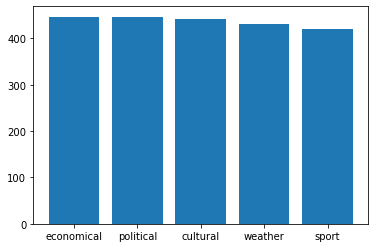

In [86]:
plt.bar(df["category"].unique(), df["category"].value_counts(), width=0.8)

In [27]:
y = pd.Series(df.category)
y.shape

(2189,)

In [75]:
y.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [29]:
df.isna().sum()

category    0
text        0
dtype: int64

In [30]:
y

0       economical
1       economical
2       economical
3       economical
4       economical
           ...    
2184         sport
2185         sport
2186         sport
2187         sport
2188         sport
Name: category, Length: 2189, dtype: object

In [31]:
X = pd.Series(df.text)
X.shape

(2189,)

In [32]:
X

0       курс рубл этот недел обнов годов минимум апрел...
1       жизн бизнесм возника период когд необходим под...
2       оборот грузов вагон железнодорожн сет замедл п...
3       москв апр ри новост миров экономическ кризис т...
4       близк год темп рост российск экономик моч закр...
                              ...                        
2184    бывш чемпион абсолютн бойцовск чемпионат легк ...
2185      феврал пройт церемон взвешиван участник турнир 
2186    россиянин стат чемпион побед октябр год бразил...
2187    крэйг джонс тренер австралийск боец александр ...
2188    москв фев ри новост российск боец абсолютн бой...
Name: text, Length: 2189, dtype: object

In [33]:
y

0       economical
1       economical
2       economical
3       economical
4       economical
           ...    
2184         sport
2185         sport
2186         sport
2187         sport
2188         sport
Name: category, Length: 2189, dtype: object

In [34]:
y.shape

(2189,)

In [35]:
vectorizer = CountVectorizer(min_df=0.001, max_df=0.8)

In [36]:
le = LabelEncoder()

In [37]:
y = le.fit_transform(y).reshape(y.shape[0], 1)

In [38]:
X = vectorizer.fit_transform(X)
X = X.toarray()

In [39]:
try:
    y = vectorizer.fit_transform(y)
    y = y.toarray()
except Exception as Ex:
        print(Ex)

'numpy.ndarray' object has no attribute 'lower'


In [40]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [41]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
X.shape

(2189, 2318)

In [43]:
y

array([[1],
       [1],
       [1],
       ...,
       [3],
       [3],
       [3]])

In [44]:
y.shape

(2189, 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [46]:
X_train.shape

(1751, 2318)

In [47]:
X_test.shape

(438, 2318)

In [48]:
class NewsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(list(X), dtype=torch.float32)
        self.y = torch.nn.functional.one_hot(torch.tensor(list(y)), num_classes = 5)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx): # idx??? откуда берется
        return self.X[idx], self.y[idx][0].float()

In [49]:
BATCH_SIZE = 20 # типо микро набор данных 64 строки 

train_dataset = NewsDataset(X_train, y_train) 
test_dataset = NewsDataset(X_test, y_test)


valid_ratio = 0.2 
num_valid =  int(valid_ratio * len(train_dataset)) 
num_train = len(train_dataset) - num_valid

train_dataset, valid_dataset = random_split(dataset=train_dataset, lengths=[num_train, num_valid])


train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True) 
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=1, drop_last=True)

<ipython-input-48-2e78cdd987ae>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  self.X = torch.tensor(list(X), dtype=torch.float32)


In [50]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes) 

        

    
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [51]:
def train(model, loader, loss_function, optimizer, scheduler=None):
    model.train() 
    epoch_loss = 0

    for inputs, labels in loader:
        inputs, labels = inputs, labels
        
        outputs = model(inputs)
        
        loss = loss_function(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
    if scheduler is not None:
        scheduler.step()
    return epoch_loss / len(loader)

In [52]:
def test(model, loader, loss_function):
    with torch.no_grad():
        model.eval() #calculating metrics
        N = 0
        total_loss = 0.0
        
        for i, (inputs, labels) in enumerate(loader):
            inputs = inputs
            outputs = model(inputs)
            N += inputs.shape[0]
            loss = loss_function(outputs, labels)
            total_loss += inputs.shape[0] * loss.item()
        return total_loss / N

In [53]:
def test_labels(model, loader):
    with torch.no_grad():
        model.eval() #calculating metrics
        predicts = []
        for i, (inputs, labels) in enumerate(loader):
            inputs = inputs
            outputs = model(inputs)
            predicts.append(outputs.argmax())
        return predicts

In [54]:
input_size = X.shape[1]
hidden_size = 32
num_classes = len(le.classes_)
model = NeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=.001)

In [55]:
num_epochs = 13
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    train_loss = train(model, loader=train_loader, loss_function=criterion, optimizer=optimizer, scheduler=None)
    val_loss = test(model=model, loader=valid_loader, loss_function=criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    if epoch % 1 == 0:
        print(f'Epoch {epoch}')
        print(f'Train loss {train_loss:.6f} | Val loss {val_loss:.6f}')
        print('---')

test_loss = test(model=model, loader=test_loader, loss_function=criterion)
print(f'Test Loss {test_loss:.6f}')

Epoch 0
Train loss 1.464399 | Val loss 1.226768
---
Epoch 1
Train loss 0.884120 | Val loss 0.734987
---
Epoch 2
Train loss 0.468070 | Val loss 0.510113
---
Epoch 3
Train loss 0.279666 | Val loss 0.417023
---
Epoch 4
Train loss 0.186673 | Val loss 0.367806
---
Epoch 5
Train loss 0.135158 | Val loss 0.336921
---
Epoch 6
Train loss 0.102787 | Val loss 0.321117
---
Epoch 7
Train loss 0.080639 | Val loss 0.310181
---
Epoch 8
Train loss 0.065921 | Val loss 0.303250
---
Epoch 9
Train loss 0.055004 | Val loss 0.297759
---
Epoch 10
Train loss 0.046606 | Val loss 0.295804
---
Epoch 11
Train loss 0.040086 | Val loss 0.293373
---
Epoch 12
Train loss 0.035031 | Val loss 0.293446
---
Test Loss 0.291250


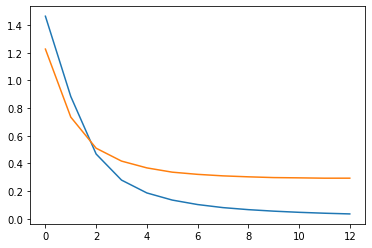

In [73]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(train_losses)
    plt.plot(val_losses)

In [71]:
from sklearn.metrics import classification_report
with torch.no_grad():
    print(classification_report(test_labels(model=model, loader=test_loader), y_test, zero_division=True))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        71
           1       0.85      0.90      0.87        91
           2       0.89      0.86      0.88        86
           3       0.96      0.85      0.90       100
           4       0.93      0.93      0.93        90

    accuracy                           0.90       438
   macro avg       0.90      0.90      0.90       438
weighted avg       0.90      0.90      0.90       438



Text(0.5, 15.0, 'Предсказанные значения')

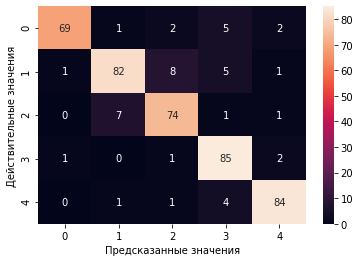

In [79]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, test_labels(model=model, loader=test_loader))),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [57]:
inp_ind = 0
with torch.no_grad():
    print(model.forward(torch.tensor([X[inp_ind]], dtype=torch.float32)))
    print(model.forward(torch.tensor([X[inp_ind]], dtype=torch.float32)).argmax())
    print(torch.tensor(y[inp_ind]))

tensor([[-3.5228,  8.9469, -4.1463, -3.8161, -3.4537]])
tensor(1)
tensor([1])


In [68]:
torch.save(model, "model2.pth")

In [59]:
# model_loaded = torch.load("model.pth")

In [60]:
# model_loaded(torch.tensor([X[inp_ind]], dtype=torch.float32))

In [61]:
# testing_text = 'курс рубл этот недел обнов годов минимум апрел перешагнут отметк за доллар нача год американск валют отношен российск подорожа бол на экономист склоня мнен постепен ослаблен рубл быт продолжа защит сво сбережен этот услов '


In [62]:
# testing_text = vectorizer.fit_transform(testing_text)


In [63]:
# string = 'путин король мира'

In [64]:
# def testing_input(string):

#     tmp_str = ""
#     for sentence in list(sentenize(string)):
#         tok = list(tokenize(sentence.text))
#         ru_letters = re.compile('^[а-яА-ЯёЁ]*$')
#         pt = [morph.parse(t.text) for t in tok if ru_letters.search(t.text)] 
#         lemmed_text = [ru_letters[0].normalized.word for ru_letters in pt]

#         stemmed_text = [snb_stemmer_ru.stem(t) for t in lemmed_text if ru_letters.search(t)] 

#         for i in stemmed_text:
#             if i in ru_stop_words:
#                 stemmed_text.remove(i)
#         ans = " ".join(stemmed_text)
#     return ans

In [70]:
# input_text = testing_input(string)
# input_text

In [66]:
# vocab = vectorizer.vocabulary_

In [69]:
# vectorizer.fit_transform([input_text])